# Exploratory Data Analysis (EDA):

This exploratory data analysis (EDA) aimed to understand the factors influencing house sale prices. The steps included loading and initially exploring the dataset, followed by data cleaning, which addressed duplicate records, missing values, and data type conversions, particularly for date columns. Univariate analysis provided insights into single variables, while bivariate analysis explored relationships with the target variable, SalePrice. These analyses revealed key patterns and trends, enhancing understanding of the housing market dynamics and guiding predictive modeling efforts.

# Project Name: House Prices: Advanced Regression Techniques
The primary objective of this phase is to explore the various features of the dataset and assess their impact on house prices. Through EDA, I will clean the data, handle missing values, analyze individual variables (univariate analysis), and explore relationships between variables (bivariate analysis).

# Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## EDA steps followed:

### 1. Data Loading and Initial Exploration
### 2. Data Cleaning
    - Handling Duplicate Records
    - Addressing Missing Values 
        - Checking the impact of missing values of the target variable for every columns
        - Dropping columns with more then 80% of the missing values
        - Imputing rest of the columns with relevant statistical parameter
    - Converting Data Types 
        - Converting `Date` columns from 'int' to 'datatime'
### 3. Univariate Analysis (Single Variable Analysis) & Observations
### 4. Bivariate Analysis (Analysis of Variables w.r.t. Target Variable `SalesPrice`) & Observations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# Step 1 - Data Loading & Initial Inspection

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
dataset.shape

(1460, 81)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Step 2 - Data Cleaning

## 1. Handling Duplicates

In [8]:
# Check for duplicate rows
print(f'Number of duplicate rows: {dataset.duplicated().sum()}')

Number of duplicate rows: 0


## 2. Handling Missing Values

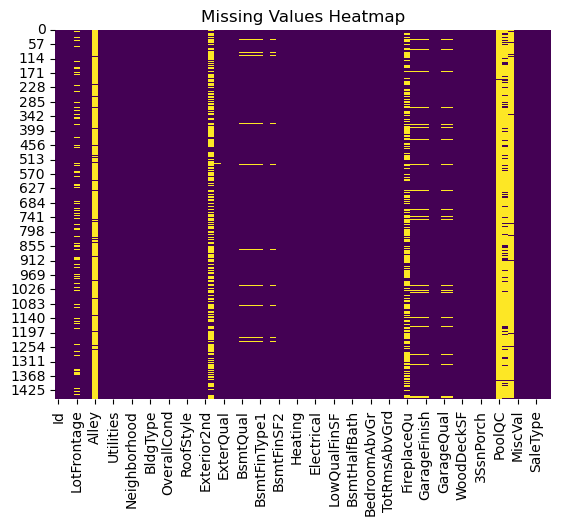

In [9]:
sns.heatmap(dataset.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# Total number of rows
total_rows = dataset.shape[0]

# Calculate percentage of missing values using list comprehension
missing_percentage = [
    (col, dataset[col].isnull().sum(), round((dataset[col].isnull().sum() / total_rows) * 100, 3)) 
     for col in dataset.columns if dataset[col].isnull().sum() > 0]

# Create a DataFrame to display the results
missing_info = pd.DataFrame(missing_percentage, columns=['Column', 'Missing Values', '% of Missing Values'])

print(missing_info)

          Column  Missing Values  % of Missing Values
0    LotFrontage             259               17.740
1          Alley            1369               93.767
2     MasVnrType             872               59.726
3     MasVnrArea               8                0.548
4       BsmtQual              37                2.534
5       BsmtCond              37                2.534
6   BsmtExposure              38                2.603
7   BsmtFinType1              37                2.534
8   BsmtFinType2              38                2.603
9     Electrical               1                0.068
10   FireplaceQu             690               47.260
11    GarageType              81                5.548
12   GarageYrBlt              81                5.548
13  GarageFinish              81                5.548
14    GarageQual              81                5.548
15    GarageCond              81                5.548
16        PoolQC            1453               99.521
17         Fence            

 `Alley`, `PoolQC`, `Fence`, `MiscFeature` has missing values above 80%. So, I will straight away drop these columns. `MasVnrType` and `FireplaceQu` has about 60% and 47% of the missing value, so I will check the if there is any impact/pattern of the missing value on the target variable, `SalesPrice` and impute accordingly. Rest of the column has about 2-5% missing value and I will impute these columns just with the mean (symmetrical data) or median (skewed data) accordingly.

In [11]:
# Identify columns with 80% or more missing values
columns_to_drop = missing_info[missing_info['% of Missing Values'] >= 80]['Column'].tolist()

# Drop the identified columns from the dataset
dataset.drop(columns=columns_to_drop, inplace=True)

# Display the remaining columns and their count
print(f'Dropped columns: {columns_to_drop}')
print(f'Number of columns after dropping: {dataset.shape[1]}')

Dropped columns: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Number of columns after dropping: 77


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


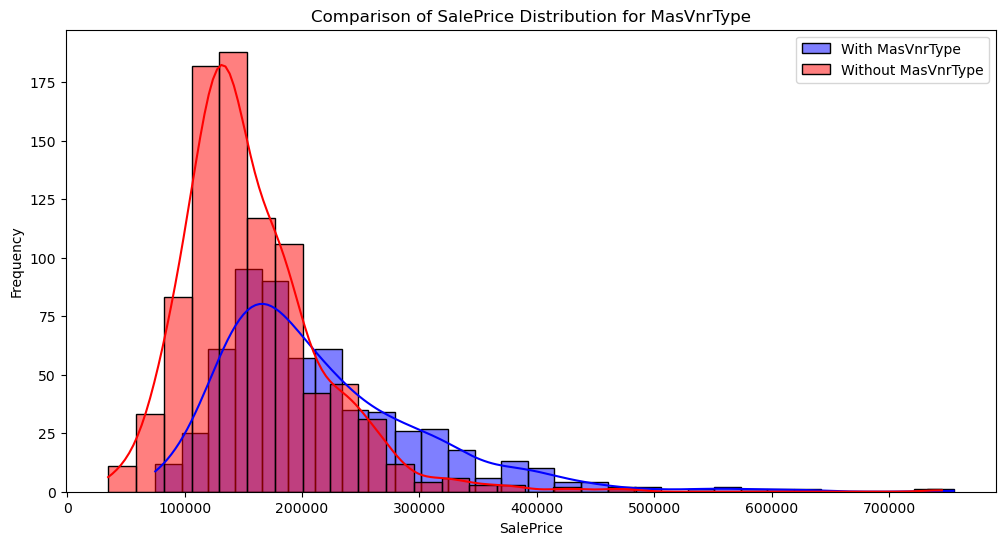

T-statistic for MasVnrType: 14.075255489896366, P-value: 4.919605879606793e-41
Average Sale Price with MasVnrType: 216458.0918367347
Average Sale Price with Missing MasVnrType: 156958.24311926606
Difference in Average Sale Prices for MasVnrType: 59499.848717468645



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


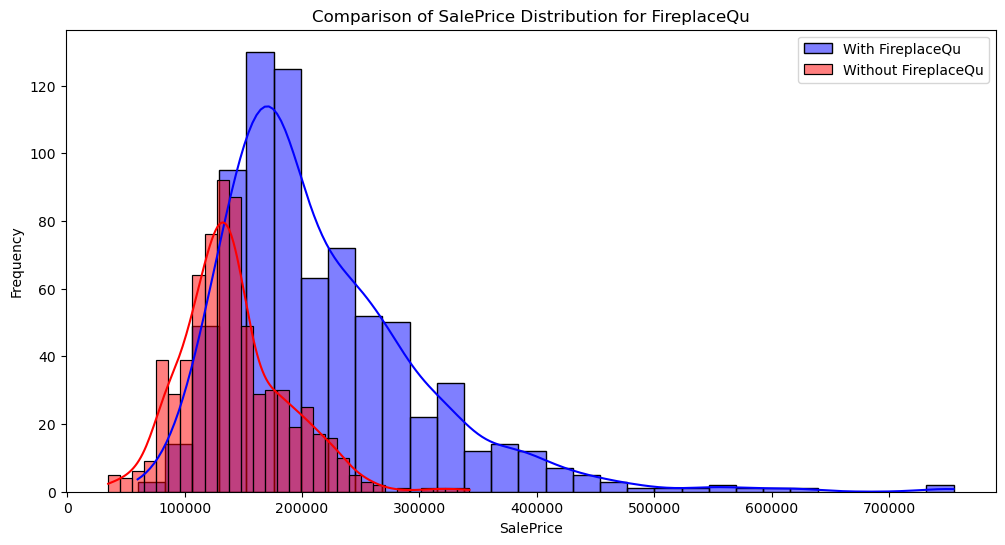

T-statistic for FireplaceQu: 21.105376324953664, P-value: 4.666259945494159e-84
Average Sale Price with FireplaceQu: 216397.69220779222
Average Sale Price with Missing FireplaceQu: 141331.48260869566
Difference in Average Sale Prices for FireplaceQu: 75066.20959909656



In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Function to analyze SalePrice distribution and perform T-test for a given feature
def analyze_feature(feature):
    # Separate the data based on whether the feature is null or not
    with_feature = dataset[dataset[feature].notnull()]
    without_feature = dataset[dataset[feature].isnull()]

    # Plotting the distribution of SalePrice
    plt.figure(figsize=(12, 6))
    
    # Distribution for houses with the feature
    sns.histplot(with_feature['SalePrice'], color='blue', label=f'With {feature}', kde=True, bins=30)
    
    # Distribution for houses without the feature
    sns.histplot(without_feature['SalePrice'], color='red', label=f'Without {feature}', kde=True, bins=30)

    plt.title(f'Comparison of SalePrice Distribution for {feature}')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Perform T-test
    t_stat, p_val = ttest_ind(with_feature['SalePrice'], without_feature['SalePrice'], equal_var=False)
    print(f'T-statistic for {feature}: {t_stat}, P-value: {p_val}')

    # Calculate Average Sale Prices
    avg_with_feature = with_feature['SalePrice'].mean()
    avg_missing_feature = without_feature['SalePrice'].mean()

    # Calculate the difference
    price_difference = avg_with_feature - avg_missing_feature

    print(f'Average Sale Price with {feature}: {avg_with_feature}')
    print(f'Average Sale Price with Missing {feature}: {avg_missing_feature}')
    print(f'Difference in Average Sale Prices for {feature}: {price_difference}\n')

# Analyze MasVnrType
analyze_feature('MasVnrType')

# Analyze FireplaceQu
analyze_feature('FireplaceQu')


In [13]:
#Create a new category 'Missing' for entries with missing MasVnrType
dataset['MasVnrType'].fillna('Missing MasVnrType', inplace=True)
dataset['FireplaceQu'].fillna('Missing FireplaceQu', inplace=True)

### Understanding the Results of Missing Values of `MasVnrType` field
**`T-Statistic: 14.075`**

**Interpretation:** A T-statistic of 14.075 is considered very high, indicating that there is a substantial difference in the average sale prices of houses based on whether they have a specified MasVnrType (e.g., BrkFace, BrkCmn) or if this information is marked as "Missing."
In Simple Terms: This means that houses with a masonry veneer type have sale prices that are significantly different from those without this information.

**`P-Value: 4.919605879606793e-41`**

**Interpretation:** The P-value is extremely small (almost zero), which means the observed difference in sale prices between houses with and without a masonry veneer type is not due to random chance.
In Simple Terms: Since the P-value is so small, we can confidently conclude that the presence or absence of a masonry veneer type (MasVnrType) significantly affects the house's sale price. The likelihood of this result happening by chance is nearly impossible.

**Conclusion:** The results show a statistically significant difference in the sale prices of houses with a specific masonry veneer type compared to those without one. This suggests that having a specific MasVnrType is important and influences the value of the house.


### Understanding the Results of Missing Values of `FireplaceQu` field
**`T-Statistic: 21.105**`**

**Interpretation:** A T-statistic of 21.105 is exceptionally high, indicating a large difference in the average sale prices of houses based on whether they have a specified Fireplace Quality (e.g., Ex, Gd, etc.) or if this information is marked as "Missing."
In Simple Terms: The sale prices of houses with a specified fireplace quality are substantially different from those without this information.

**`P-Value: 4.666259945494159e-84**`**

**Interpretation:** The P-value is extremely close to zero, meaning the observed difference in sale prices is not due to random variation. This provides strong evidence that the presence or absence of a fireplace quality significantly affects sale prices.
In Simple Terms: Since the P-value is so small, we can confidently say that Fireplace Quality plays a crucial role in determining a house's sale price, and it’s highly unlikely this result occurred by chance.

**Conclusion:** The results suggest that the presence or absence of a Fireplace Quality rating significantly impacts the sale price of houses. This means that having a specific fireplace quality category adds measurable value to the house.





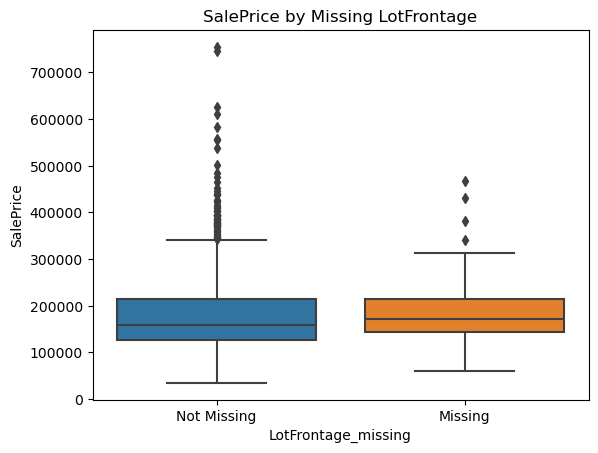

In [14]:
# Create a new column that indicates whether LotFrontage is missing
dataset['LotFrontage_missing'] = dataset['LotFrontage'].isnull().astype(int)

# Boxplot to compare SalePrice for houses with and without missing LotFrontage
sns.boxplot(x='LotFrontage_missing', y='SalePrice', data=dataset)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.title('SalePrice by Missing LotFrontage')
plt.show()

In [15]:
# Find the most frequent value (mode) in LotFrontage
most_frequent_value = dataset['LotFrontage'].mode()[0]

# Impute missing values with the most frequent value
dataset['LotFrontage'].fillna(most_frequent_value, inplace=True)

# Optional: Verify the missing values are filled
print(f'Most frequent LotFrontage value: {most_frequent_value}')
print(f'Number of missing values after imputation: {dataset["LotFrontage"].isnull().sum()}')


Most frequent LotFrontage value: 60.0
Number of missing values after imputation: 0


In [16]:
# Impute numerical columns with the median
numerical_cols = ['MasVnrArea', 'GarageYrBlt']
for col in numerical_cols:
    median_value = dataset[col].median()  # Use median to handle skewness in the data
    dataset[col].fillna(median_value, inplace=True)

# Impute categorical columns with the most frequent value (mode)
categorical_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                    'BsmtFinType2', 'Electrical', 'GarageType', 
                    'GarageFinish', 'GarageQual', 'GarageCond']

for col in categorical_cols:
    mode_value = dataset[col].mode()[0]  # Use mode for categorical columns
    dataset[col].fillna(mode_value, inplace=True)

# Optional: Verify the missing values are filled
print(dataset[categorical_cols + numerical_cols].isnull().sum())

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
MasVnrArea      0
GarageYrBlt     0
dtype: int64


In [17]:
# Find columns where there is little or no variance
low_variance_cols = dataset.columns[dataset.nunique() <= 1]  # Columns with only one unique value
print(low_variance_cols)

Index([], dtype='object')


In [18]:
# Drop the 'Id' and 'LotFrontage_missing' columns
dataset.drop(columns=['Id', 'LotFrontage_missing'], inplace=True)

## 3. Converting Data Type

In [19]:
# Create a list of year-related columns
year_columns = [col for col in dataset.columns if 'Year' in col or 'Yr' in col]

# Convert these columns to datetime format
for col in year_columns:
    dataset[col] = pd.to_datetime(dataset[col], format='%Y', errors='coerce')

# Verify the changes
print(dataset[year_columns].dtypes)
dataset[year_columns].head()

YearBuilt       datetime64[ns]
YearRemodAdd    datetime64[ns]
GarageYrBlt     datetime64[ns]
YrSold          datetime64[ns]
dtype: object


YearBuilt YearRemodAdd GarageYrBlt     YrSold
0 2003-01-01   2003-01-01  2003-01-01 2008-01-01
1 1976-01-01   1976-01-01  1976-01-01 2007-01-01
2 2001-01-01   2002-01-01  2001-01-01 2008-01-01
3 1915-01-01   1970-01-01  1998-01-01 2006-01-01
4 2000-01-01   2000-01-01  2000-01-01 2008-01-01

# Step 4 - Univariate Analysis

## Numerical Variable

In [20]:
# List of numerical variables excluding object and datetime types
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype in ['int64', 'float64']]

# Print the number of numerical variables
print('Number of numerical variables: ', len(numerical_features))

# Visualize the first 5 rows of the numerical variables
dataset[numerical_features].head()


Number of numerical variables:  33


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  
0         0        0       2     208500  
1         0        0       5     181500  
2         0        0       9     223500  
3         0        0       2     140000  
4         0        0      12     250000

### Theare are 33 Numerical Variables which could be of 2 types - Discrete Variables and Continous Variables
## 1. Discrete Variables

In [21]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [22]:
dataset[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   
3          70            7            5             1             0         1   
4          60            8            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   PoolArea  MoSold  
0         0       2  
1         0       5  
2         0       9  
3         0       2  
4         0      12

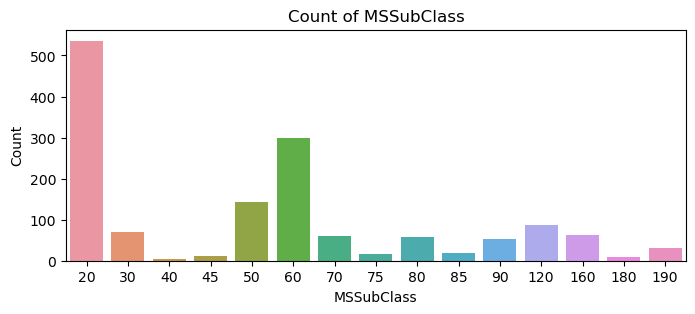

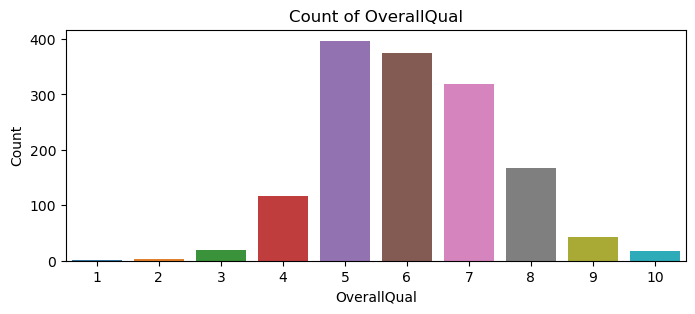

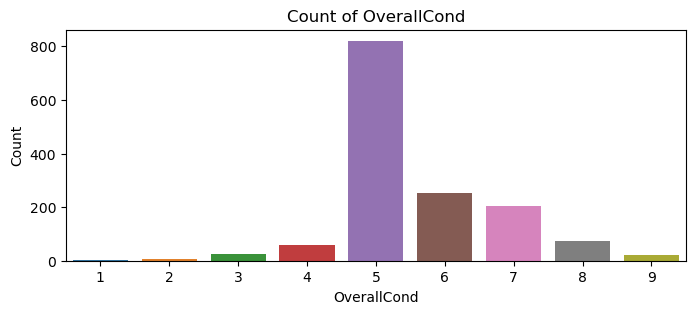

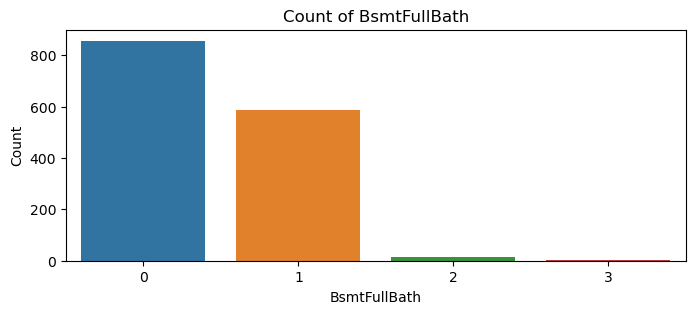

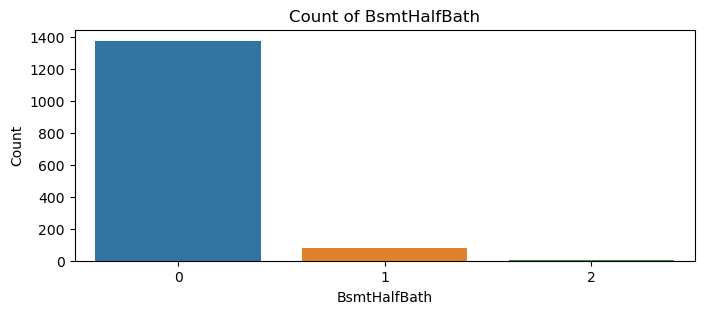

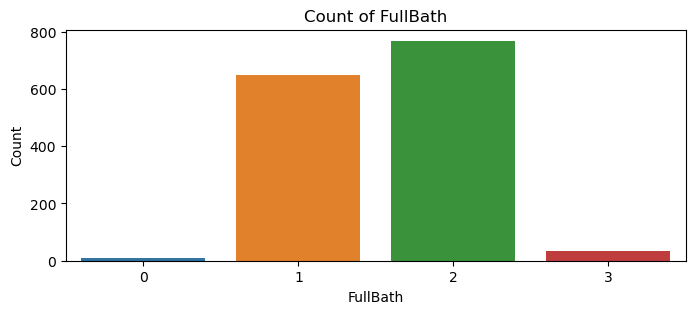

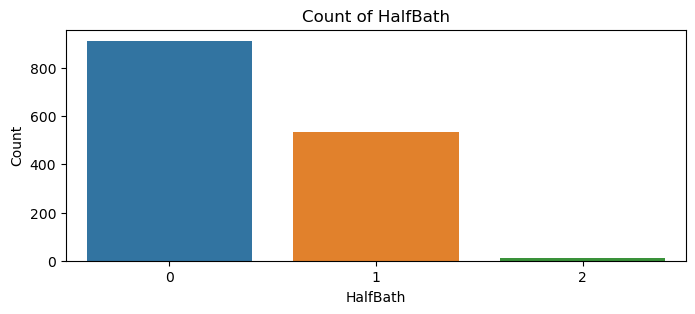

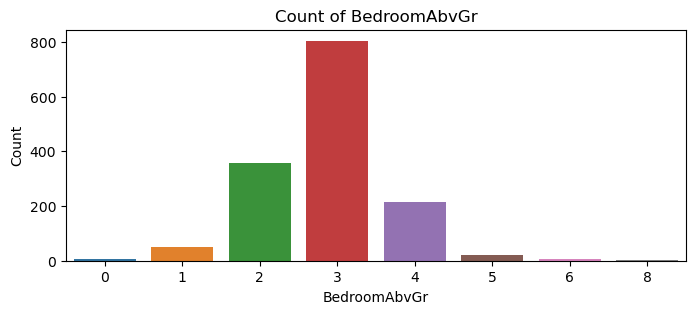

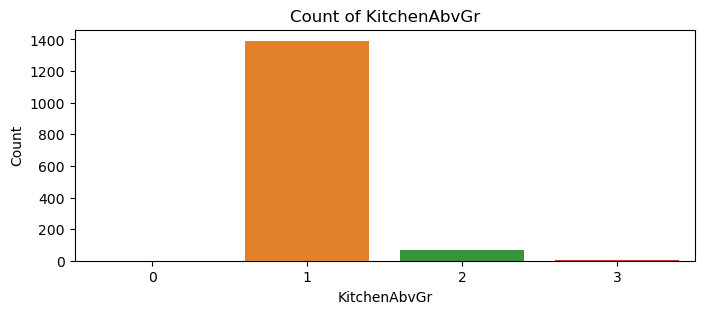

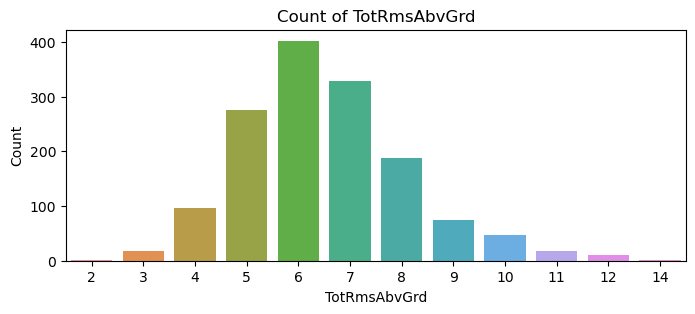

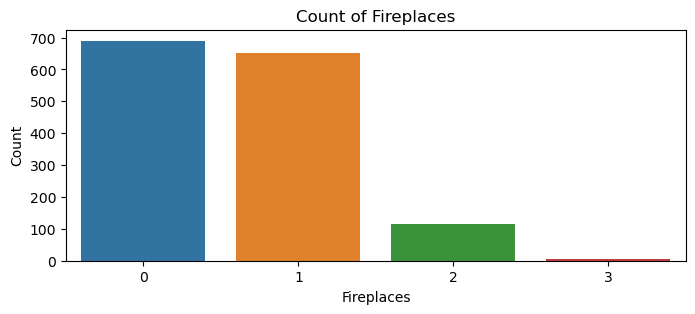

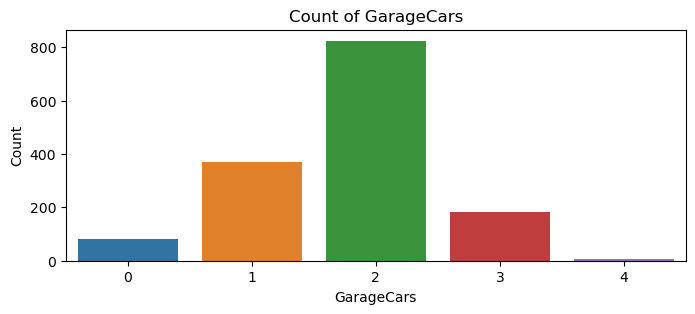

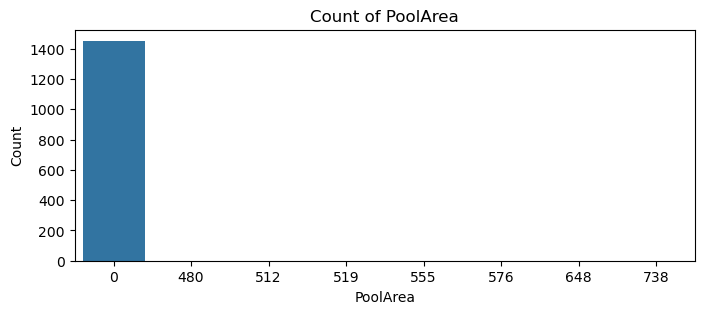

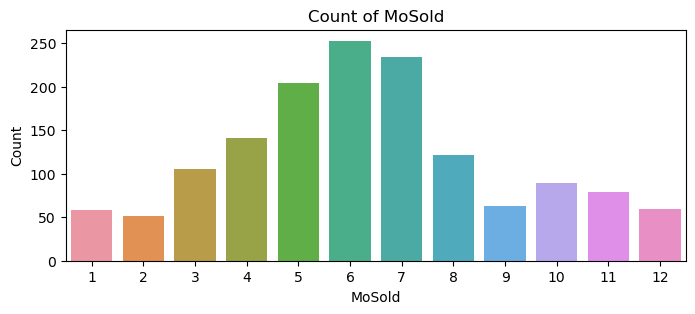

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each discrete feature and plot a bar chart
for feature in discrete_feature:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=feature, data=dataset)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### **Observations for each discrete feature:**

1. MSSubClass: Most houses (536) are in the 20 class, indicating a dominance of 1-story homes. Classes like 85, 75, and 40 are rare.
2. OverallQual: Quality 5 and 6 homes dominate, with a sharp drop in higher qualities (9 and 10).
3. OverallCond: Condition 5 is most common, with fewer homes rated 1 or 2.
4. BsmtFullBath & BsmtHalfBath: Most homes have 0 or 1 basement bathrooms, with 2 or 3 being rare.
5. FullBath & HalfBath: The majority have 1 or 2 full baths and 0 or 1 half baths.
6. BedroomAbvGr: Most homes have 2-3 bedrooms, with very few having more than 5.
7. KitchenAbvGr: Nearly all homes have 1 kitchen.
8. TotRmsAbvGrd: Homes with 6-7 rooms are the most frequent.
9. Fireplaces: 0-1 fireplaces are typical.
10. GarageCars: 2-car garages are common, with very few homes having 0 or 4.
11. PoolArea: Only 7 homes have pools, making them rare.
12. MoSold: Most homes are sold in the warmer months (May to July).

**The analysis reveals that the housing market is dominated by 1-story homes, with moderate quality (OverallQual) being most common. Most properties have fewer bathrooms and bedrooms, with the majority having only one kitchen. Fireplaces and garage spaces are generally limited. Pools are rare, and sales peak in warmer months, suggesting seasonality. Overall, these patterns can inform pricing and marketing strategies, highlighting areas for potential renovations or improvements to increase property appeal.**

## 2. Continuous Variables

In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


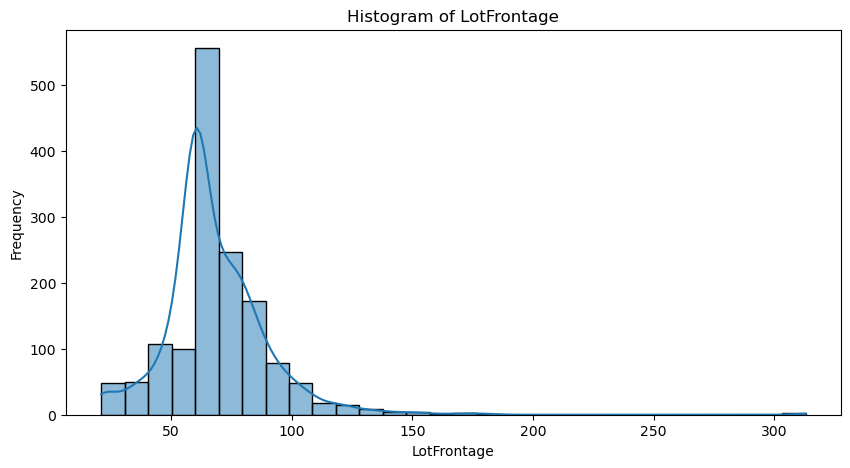

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


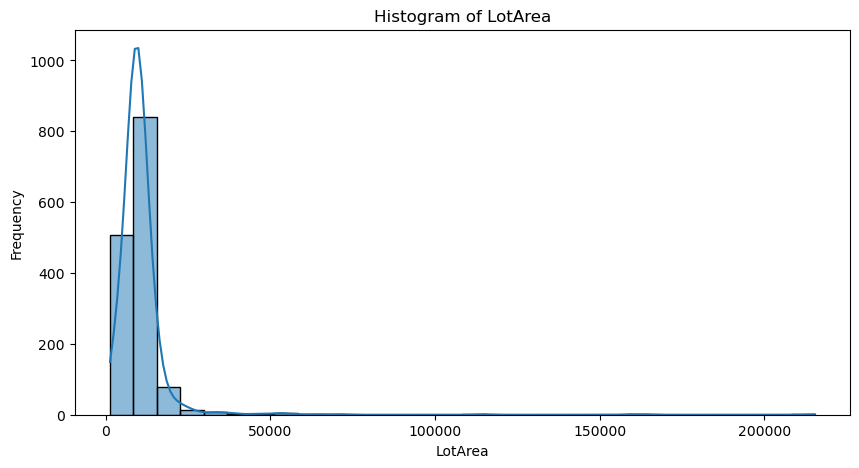

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


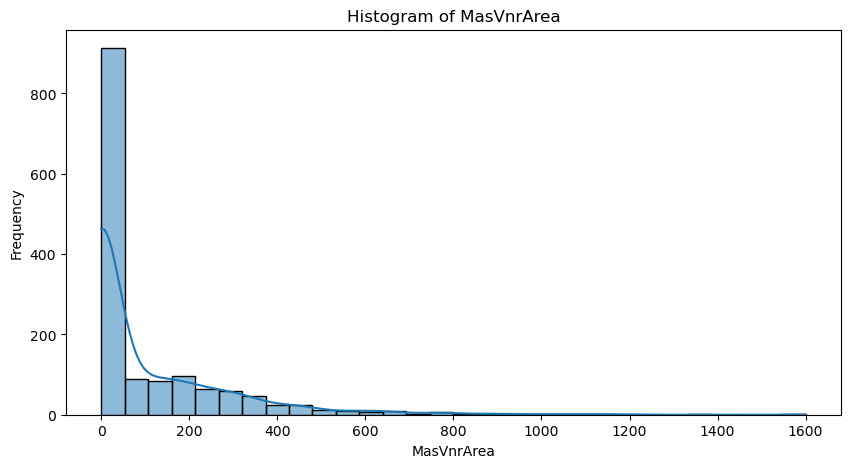

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


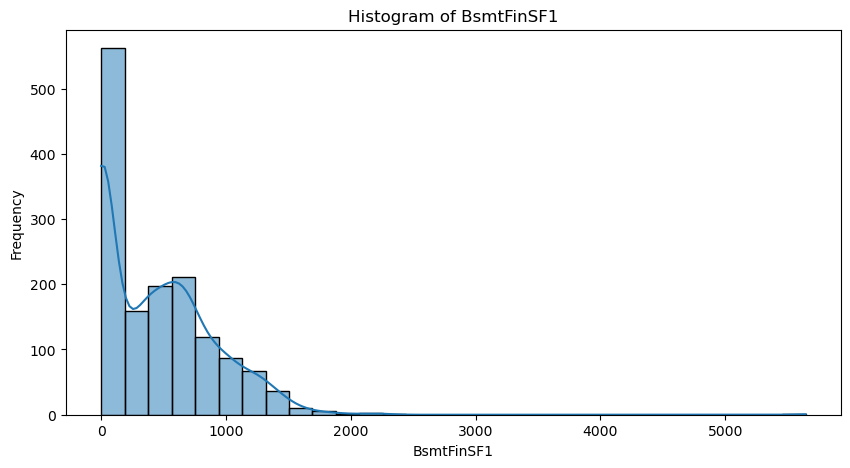

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


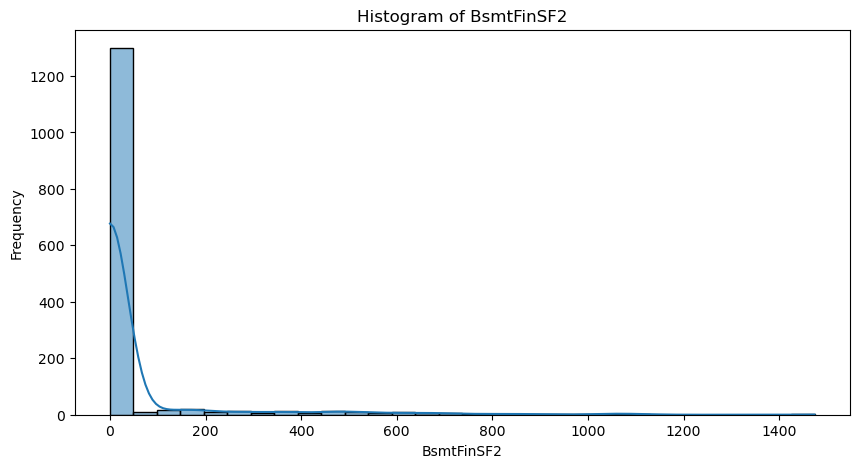

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


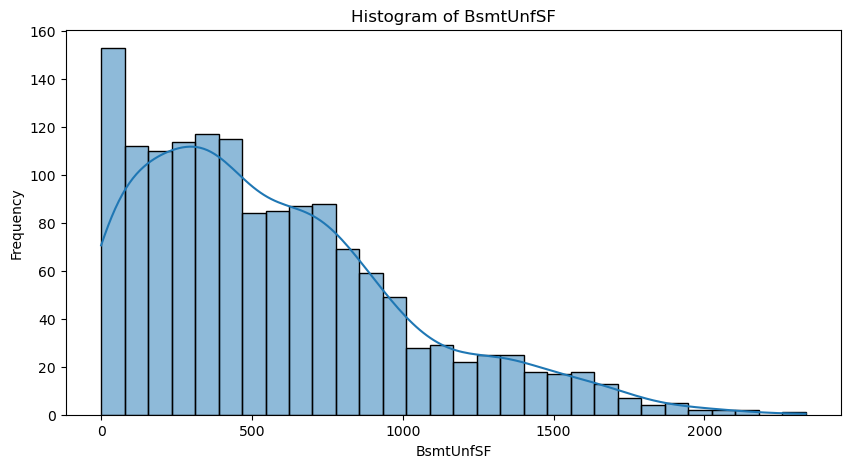

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


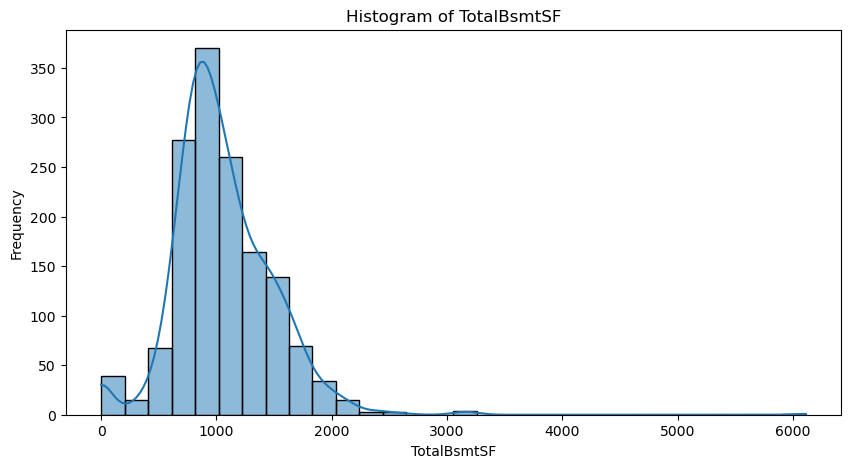

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


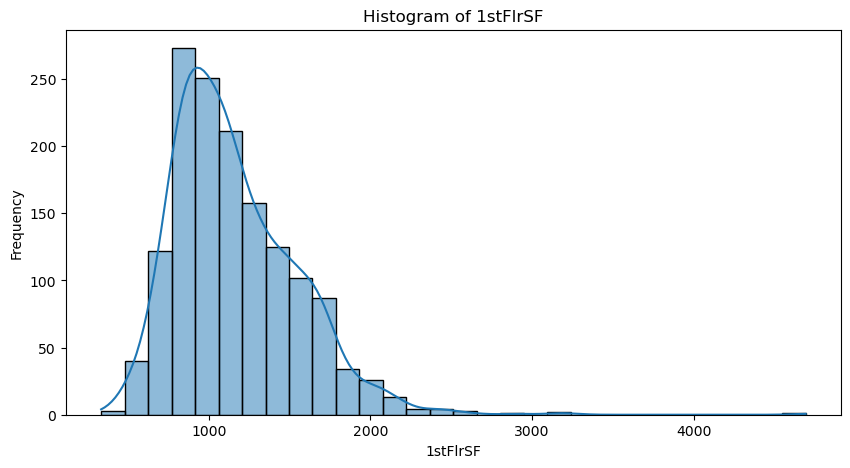

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


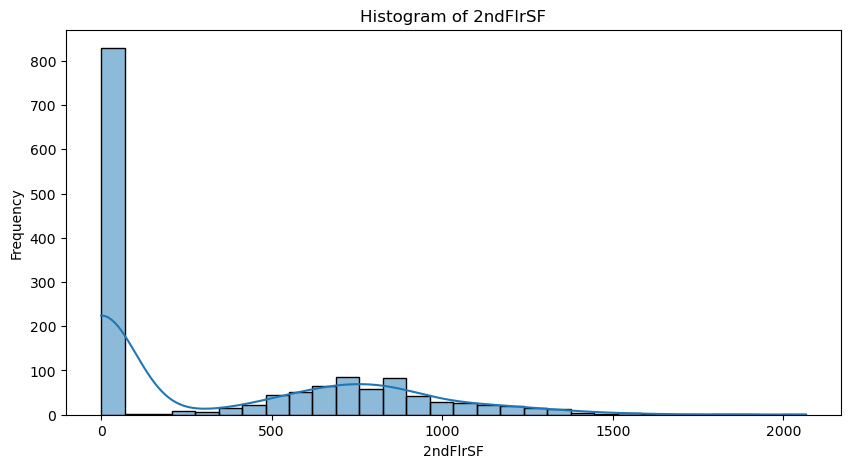

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


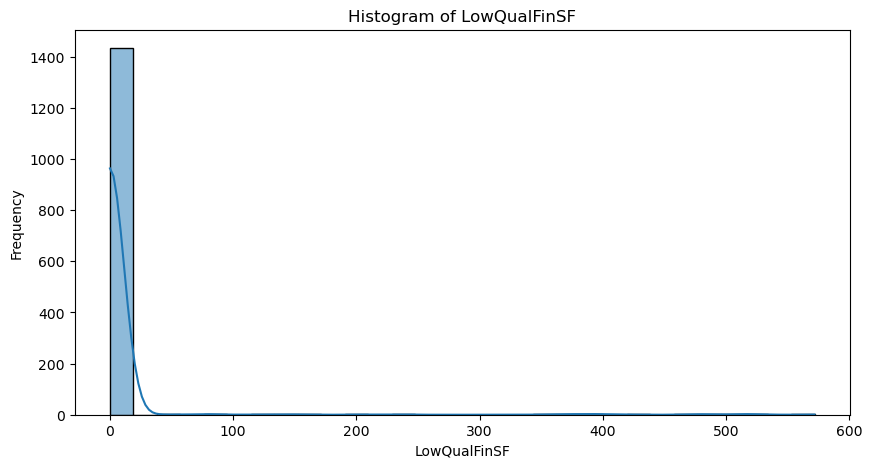

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


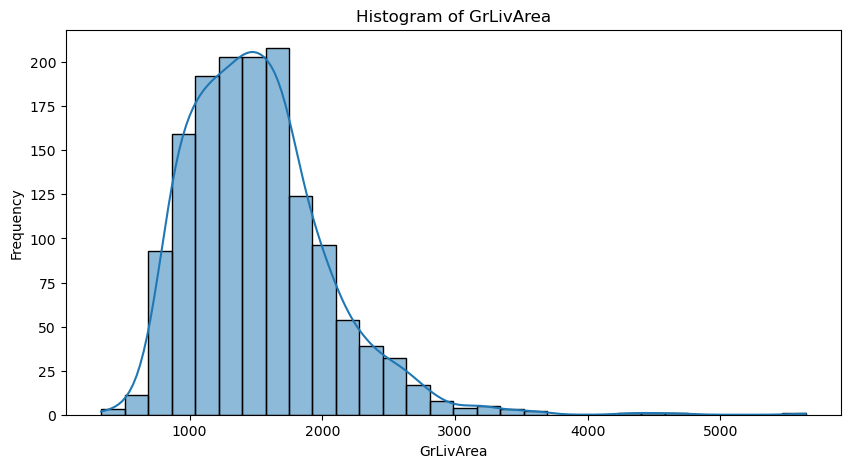

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


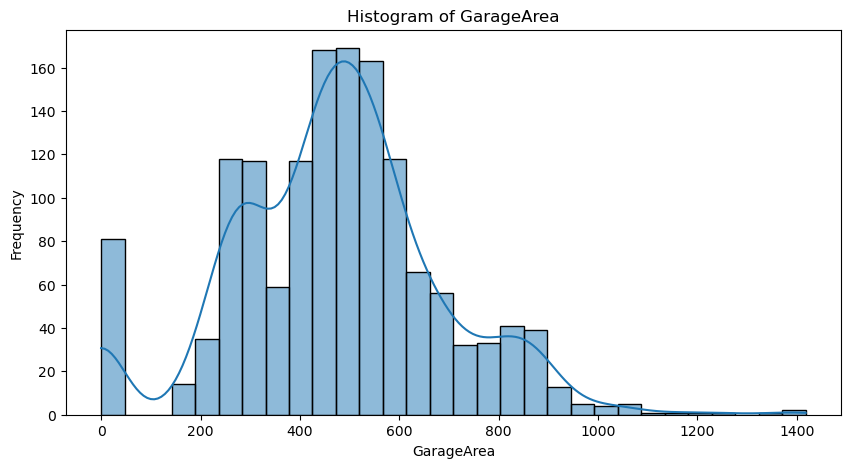

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


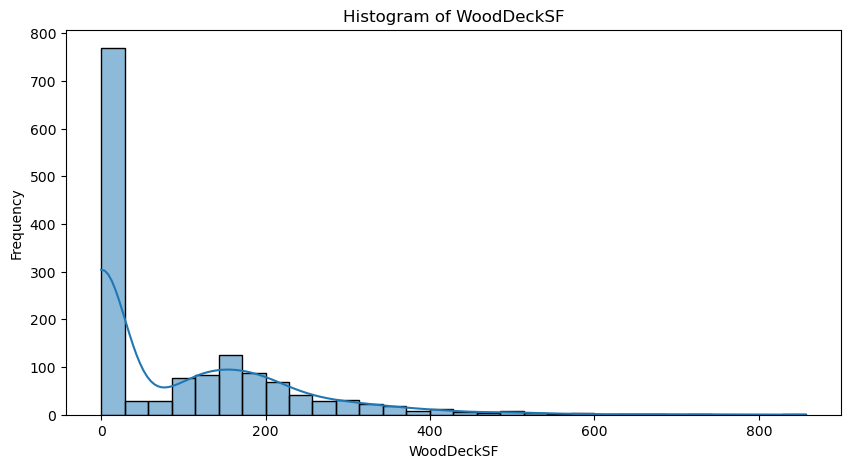

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


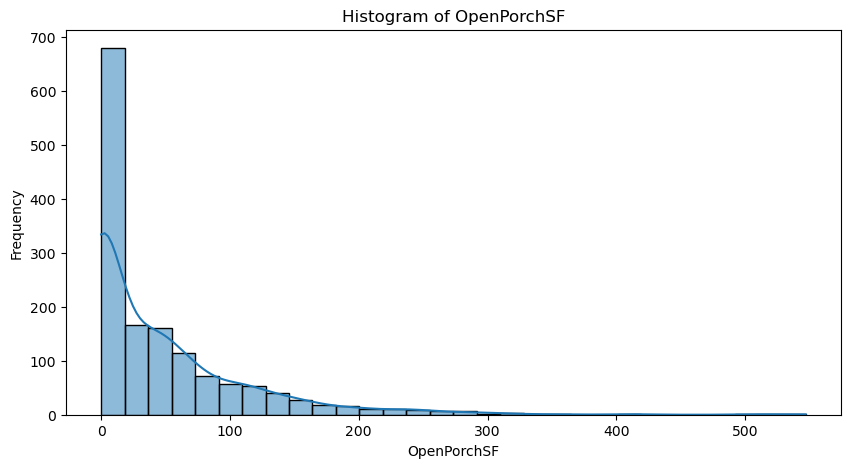

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


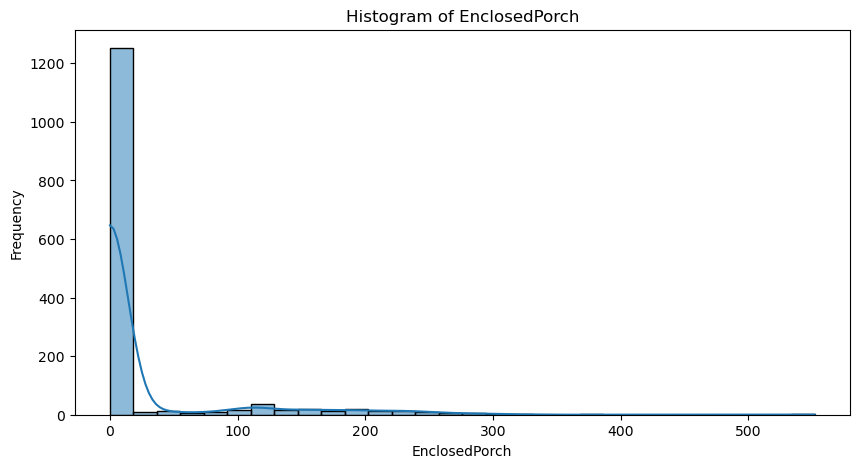

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


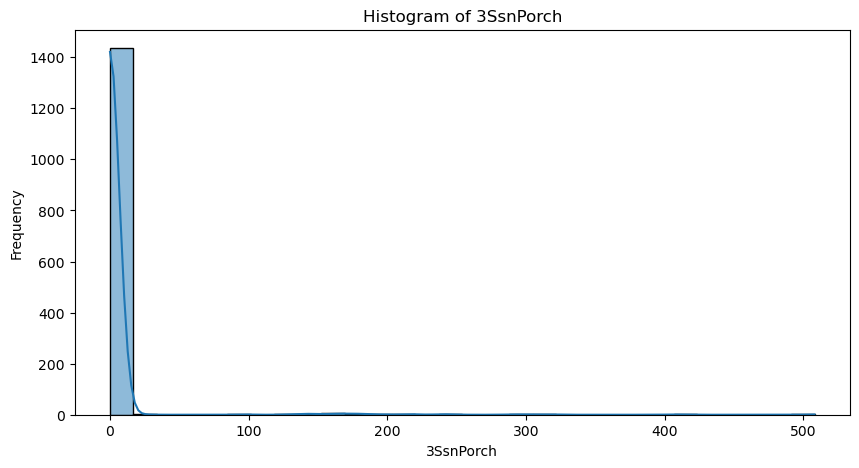

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


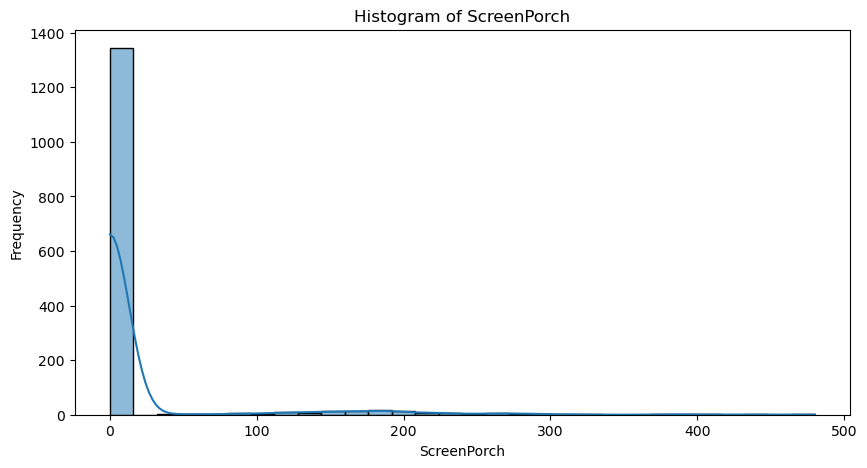

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


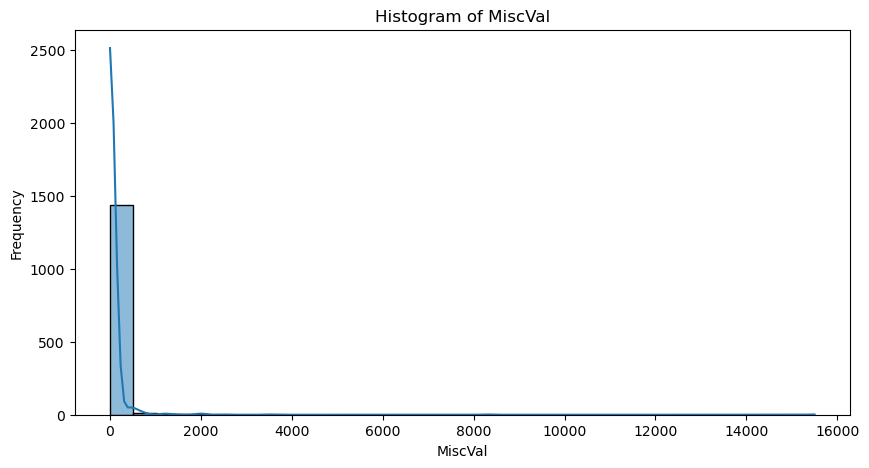

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


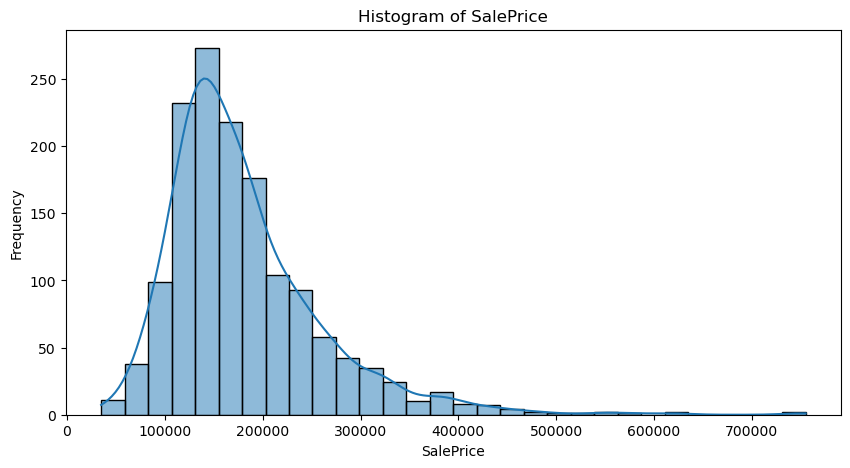

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for all continuous features
for feature in continuous_feature:
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### **Observations for Continuous Features:**
1. LotFrontage: Average lot frontage is about 68.3 feet, with some lots reaching up to 313 feet, indicating a wide variety in lot sizes.
2. LotArea: The mean lot area is 10,516.83 square feet, suggesting spacious properties, but the minimum area is quite small (1,300 sq ft).
3. MasVnrArea: Most homes have no masonry veneer, as indicated by the mean of 103.12 sq ft, which shows significant variation.
4. Basement Area Features (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF): Generally, homes have large basements, with TotalBsmtSF averaging over 1,057 sq ft.
5. First and Second Floor Areas (1stFlrSF, 2ndFlrSF): Average first-floor area is 1,162.63 sq ft, with the second floor being much smaller (346.99 sq ft), reflecting typical home designs.
6. Garage Area: The mean garage area is about 473 sq ft, suggesting most homes have substantial garage space.
7. SalePrice: The average sale price is $180,921.20, with a max of 755,000 dollars, indicating a significant range of home values.

**The dataset showcases a diverse range of property sizes and features, indicating a vibrant housing market. The substantial variation in lot areas, basement sizes, and sale prices suggests opportunities for buyers at different price points. Most homes tend to have ample living and garage space but less emphasis on features like masonry veneer and additional floors. This information can guide potential buyers and sellers in understanding the market dynamics and property valuations.**

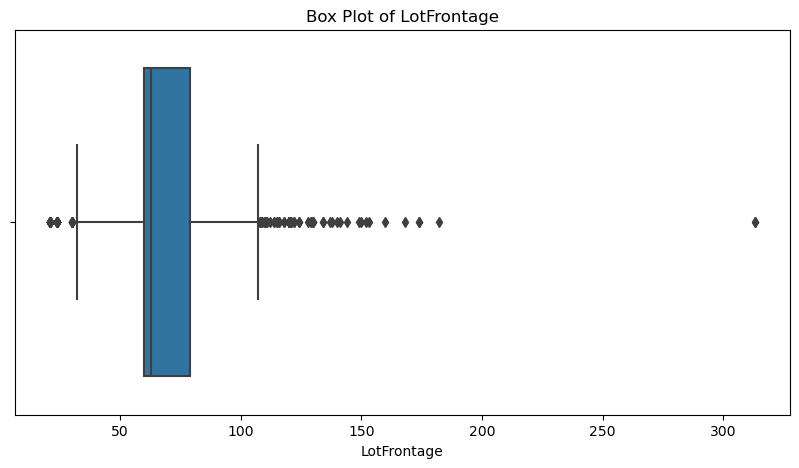

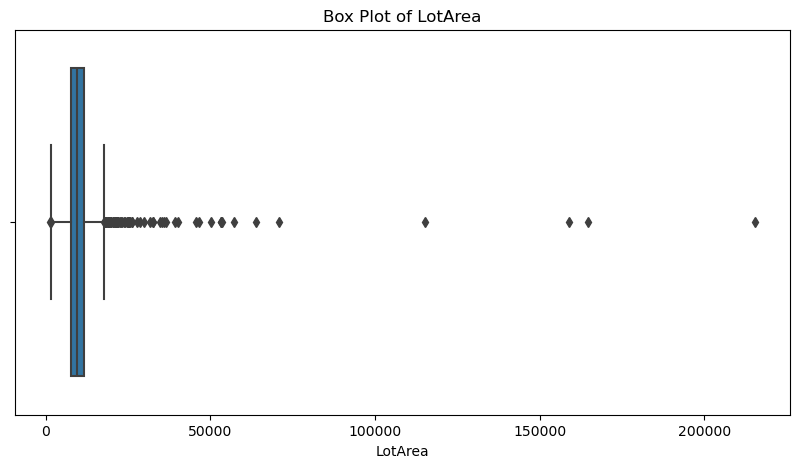

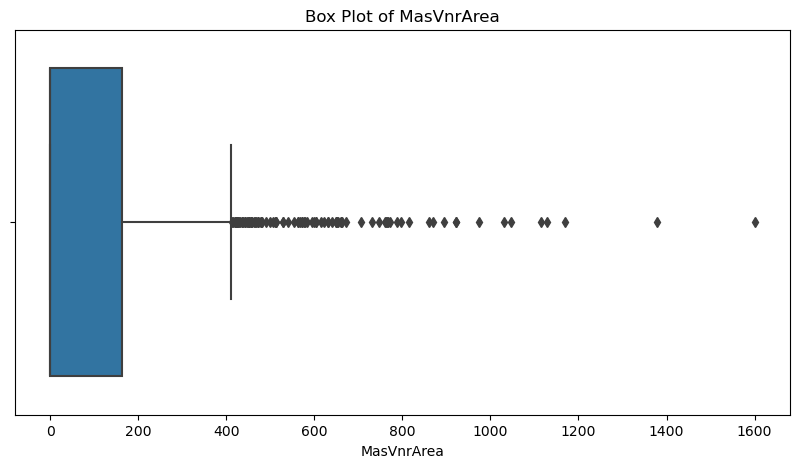

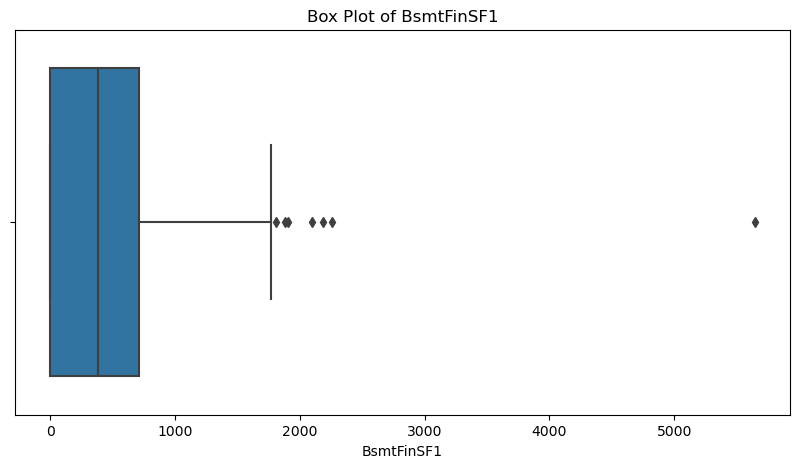

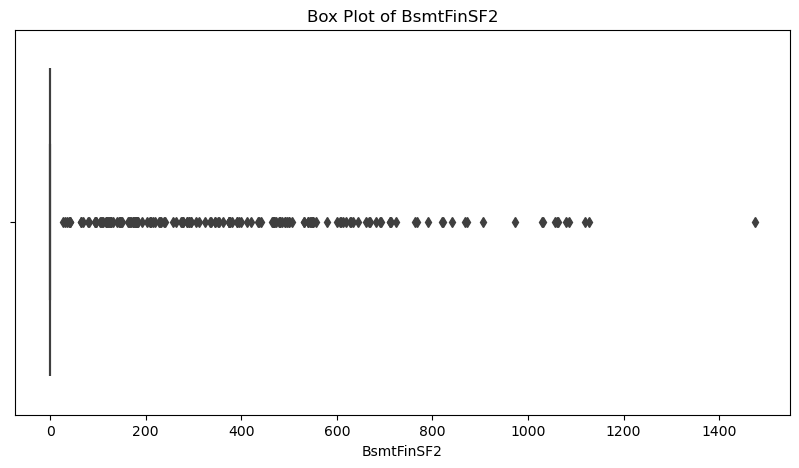

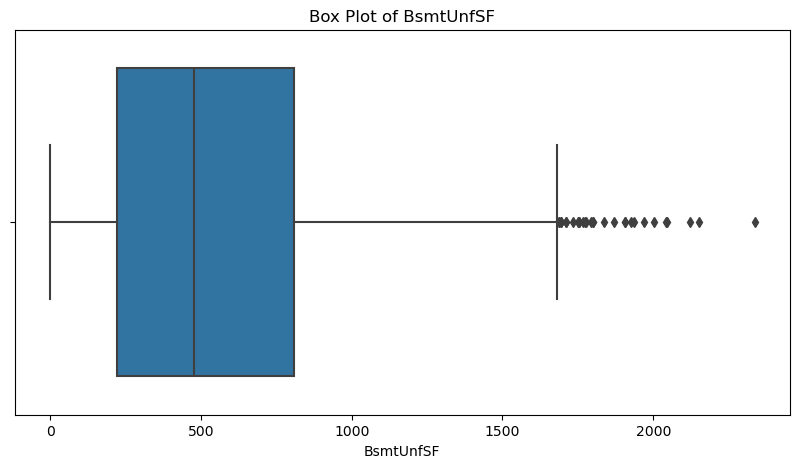

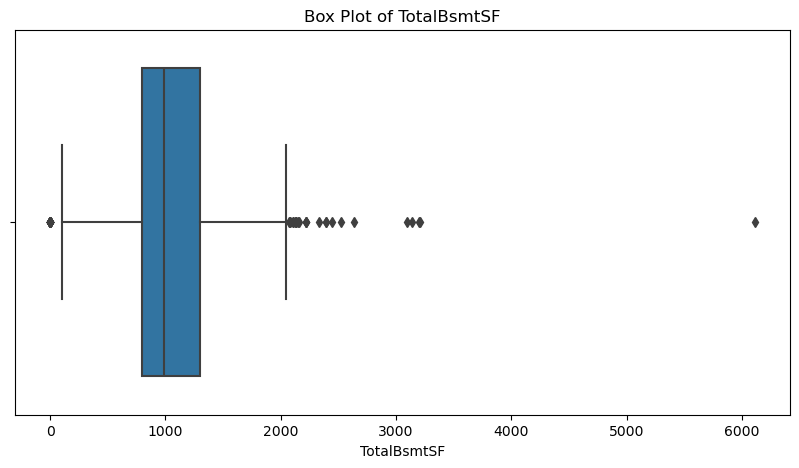

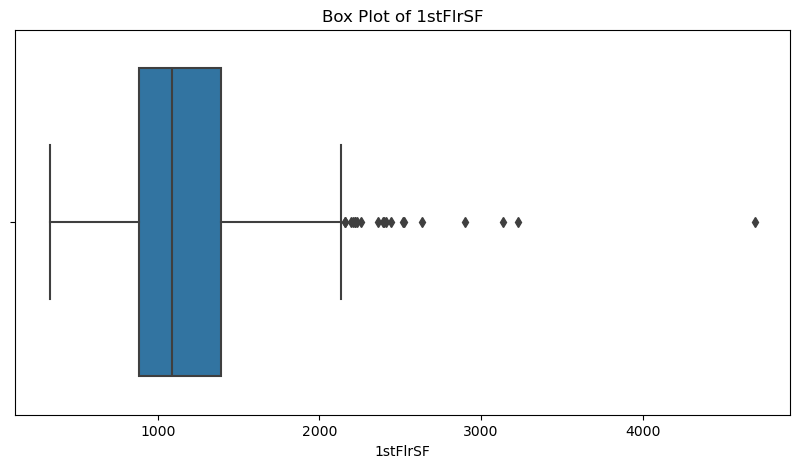

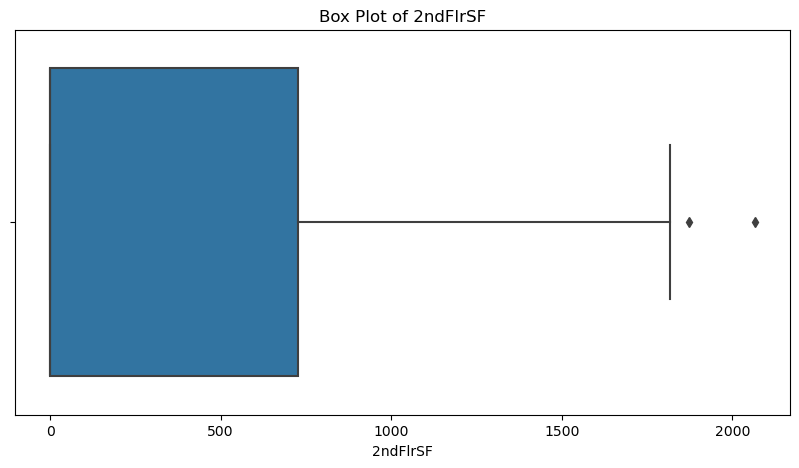

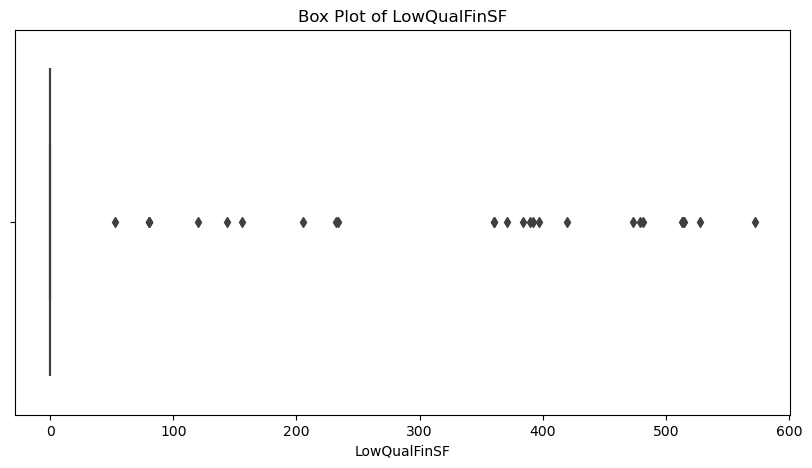

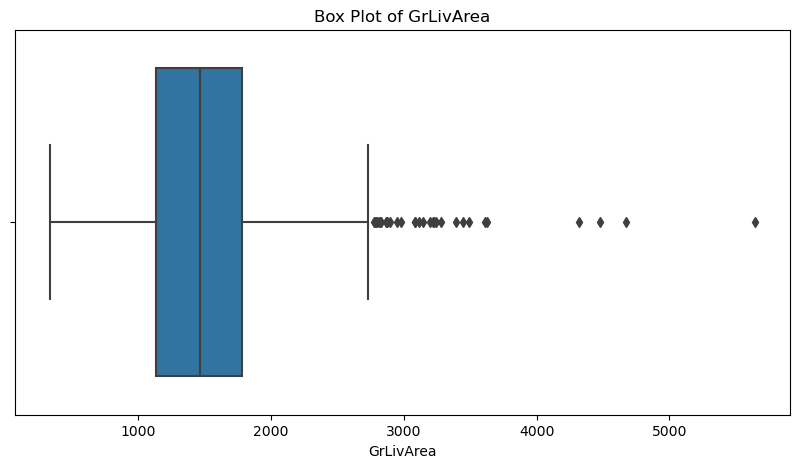

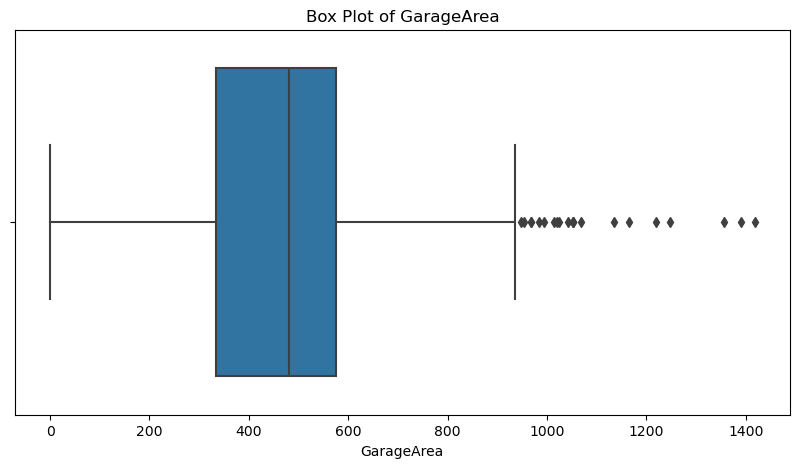

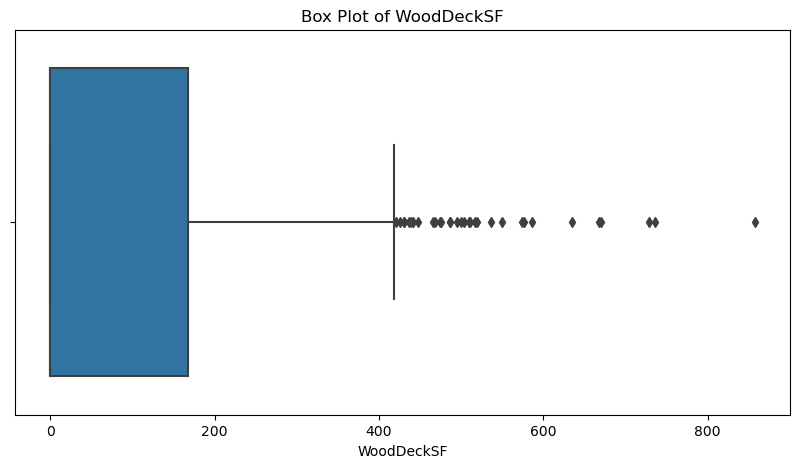

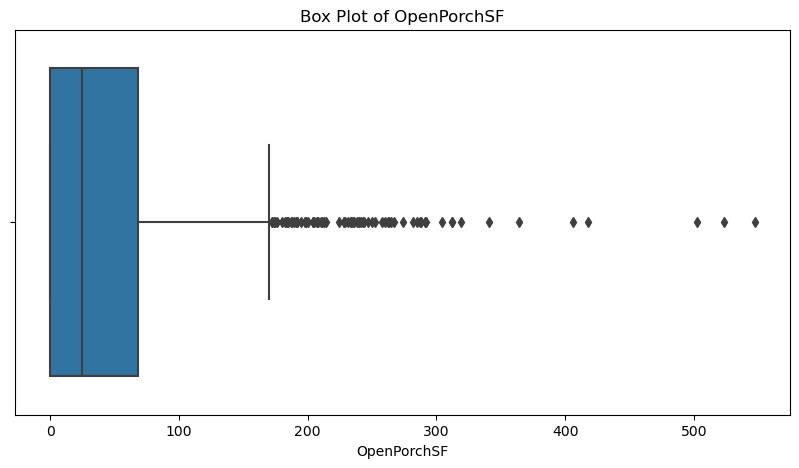

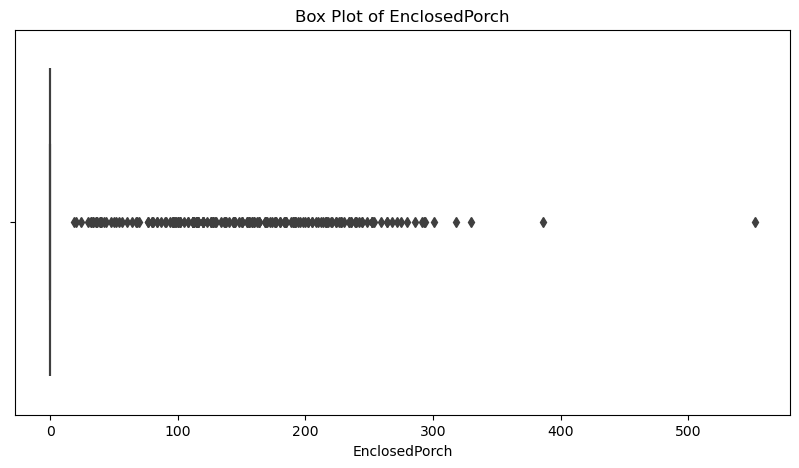

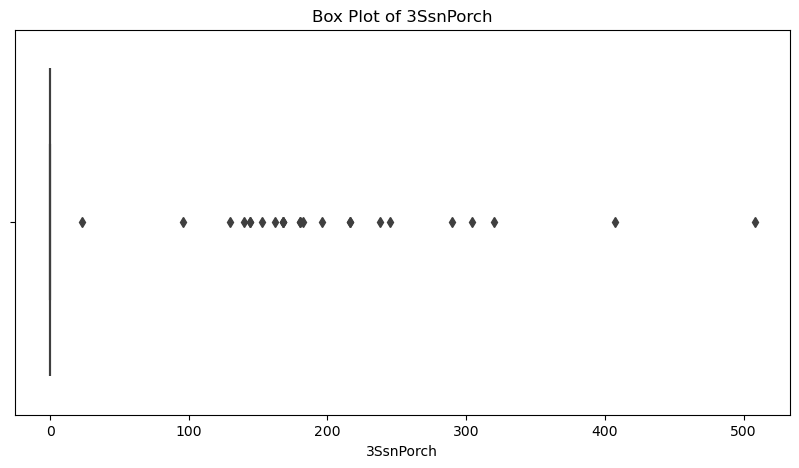

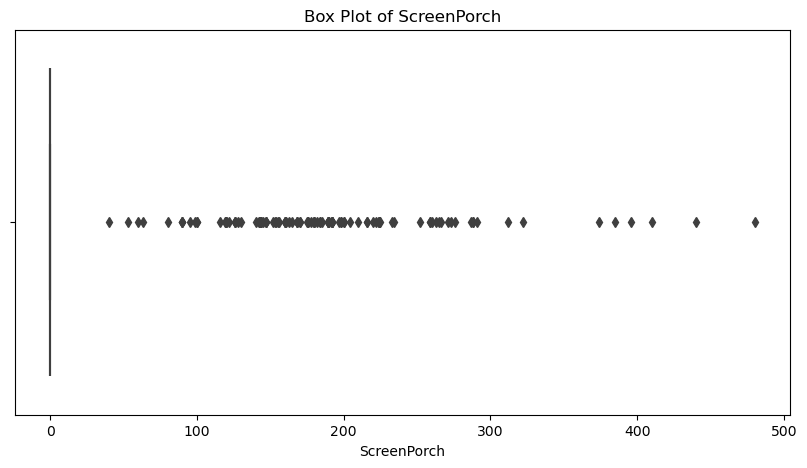

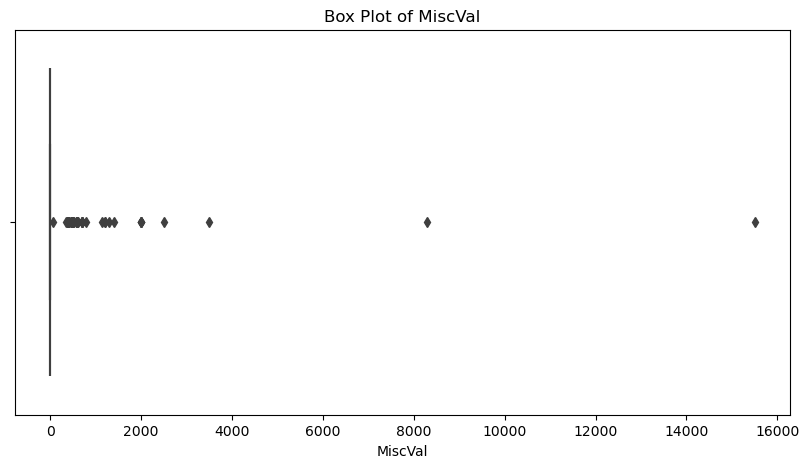

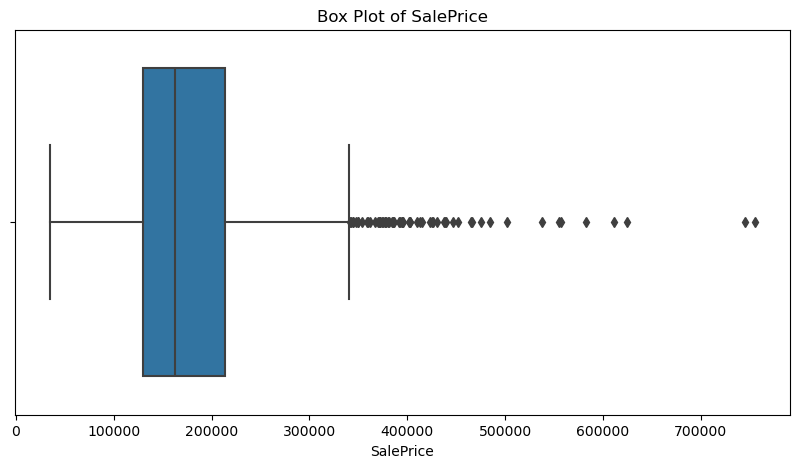

In [26]:
for feature in continuous_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

### **Observations:**
1. LotFrontage: The lower bound indicates some properties have very little street exposure, which could affect value.
2. LotArea: Significant variability (IQR of 4048) suggests a wide range of property sizes.
3. MasVnrArea & BsmtFinSF1: Many properties show zero values, indicating not all homes have masonry veneer or finished basements.
4. GrLivArea: A substantial IQR shows considerable differences in living area size.
5. SalePrice: The IQR is high, indicating diverse property values; the lower bound suggests a few outliers may exist.

**The summary statistics reveal significant variability and potential outliers across many continuous features. Properties exhibit a range of conditions and sizes, influencing their market value. Understanding these variations is crucial for modeling and predicting property prices effectively. The presence of zero values in certain features suggests the need for careful consideration in analysis to address missing or non-applicable data.**

# Step 5 - Bivariate Analysis

## 1. Discrete Variables

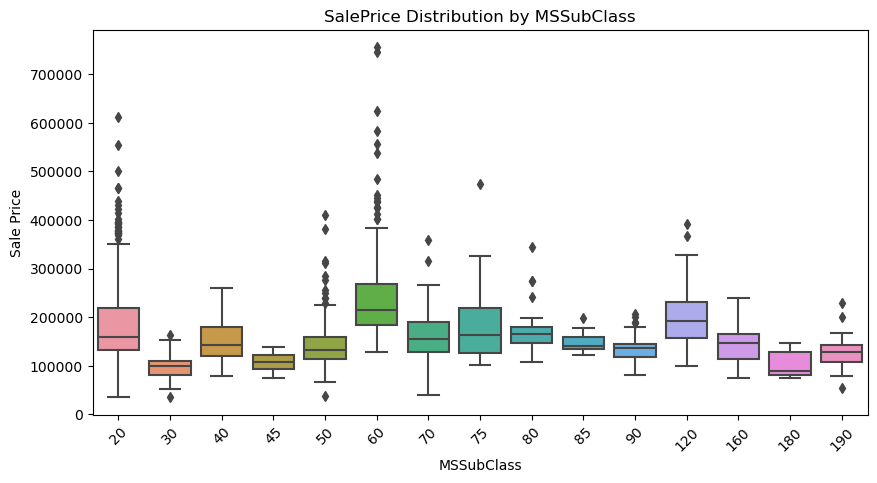

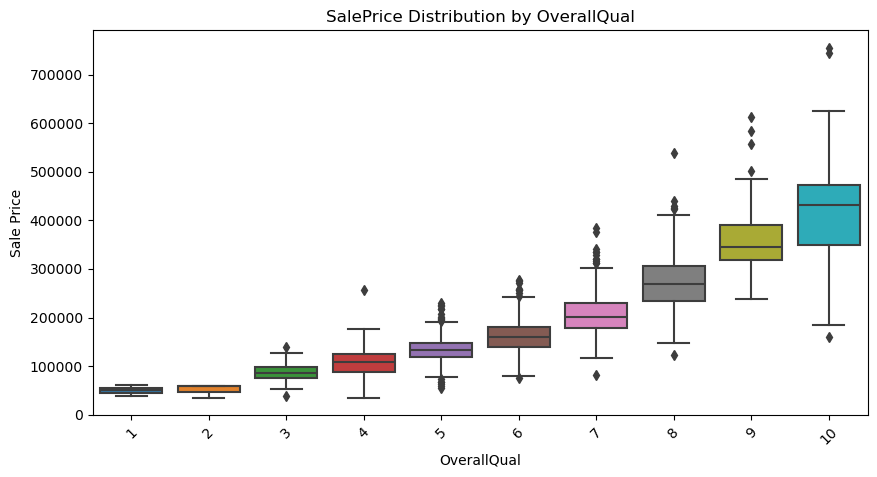

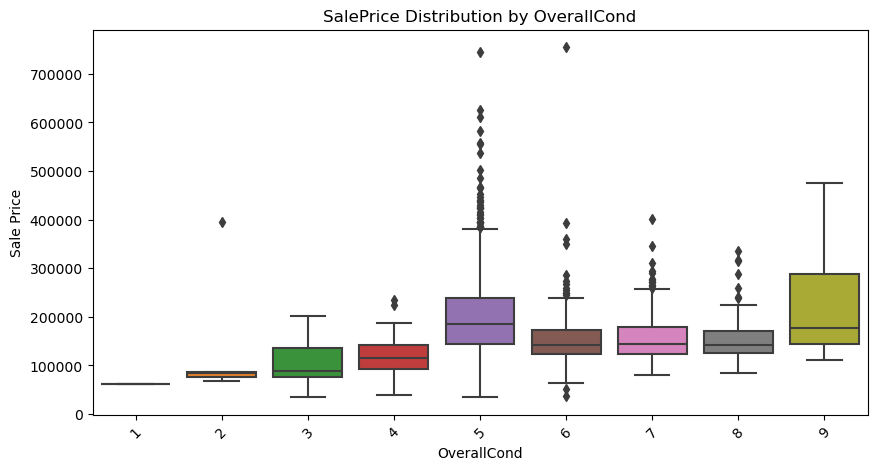

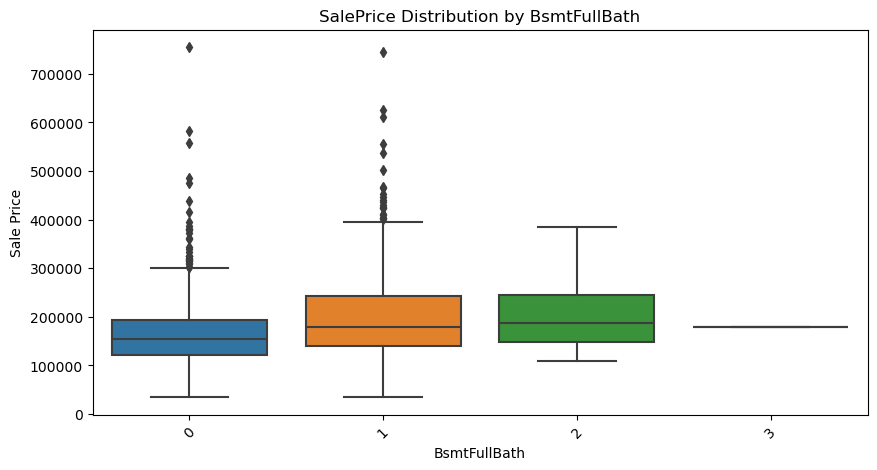

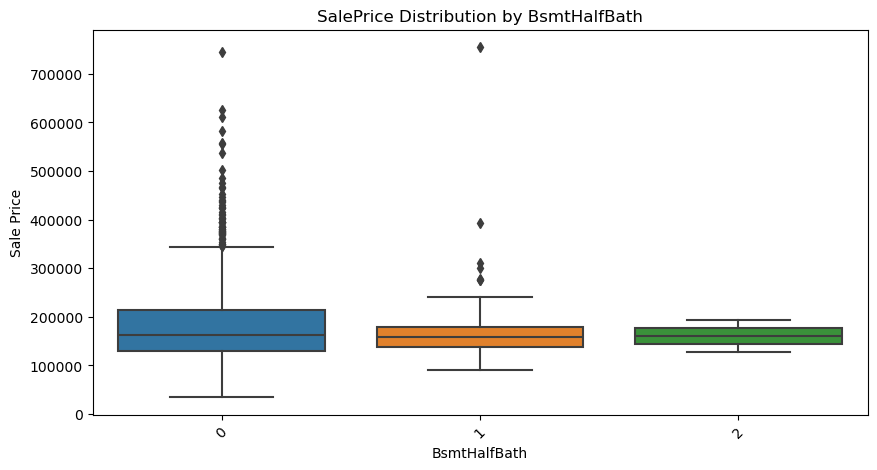

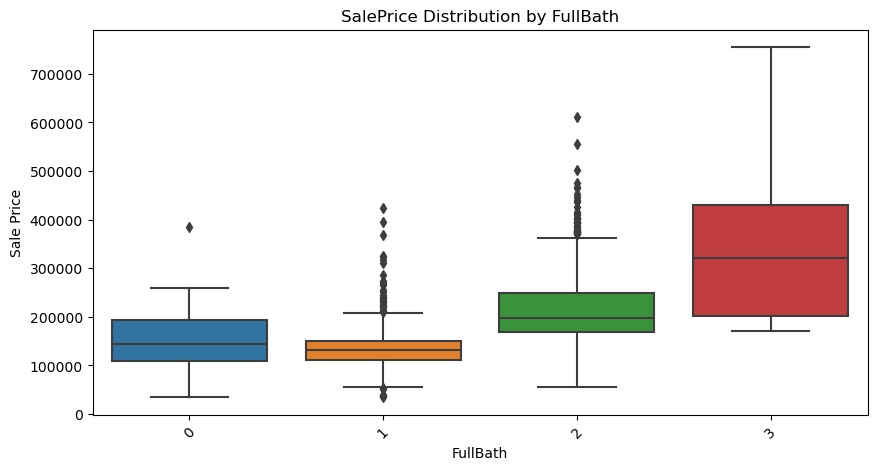

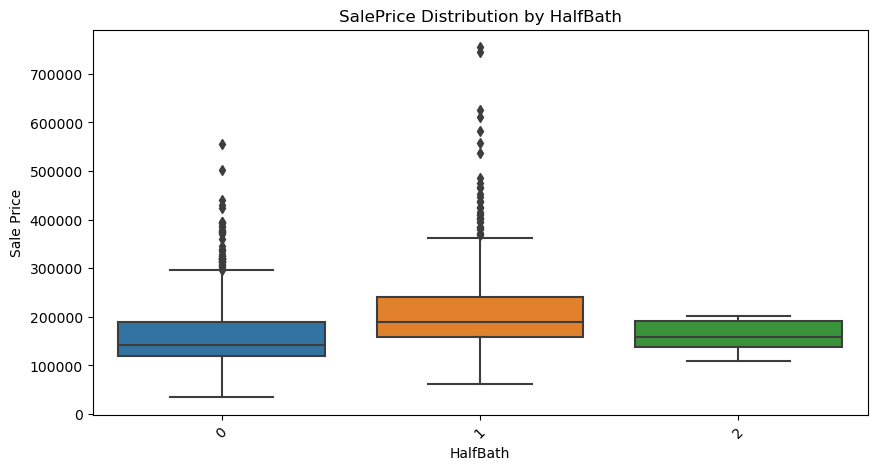

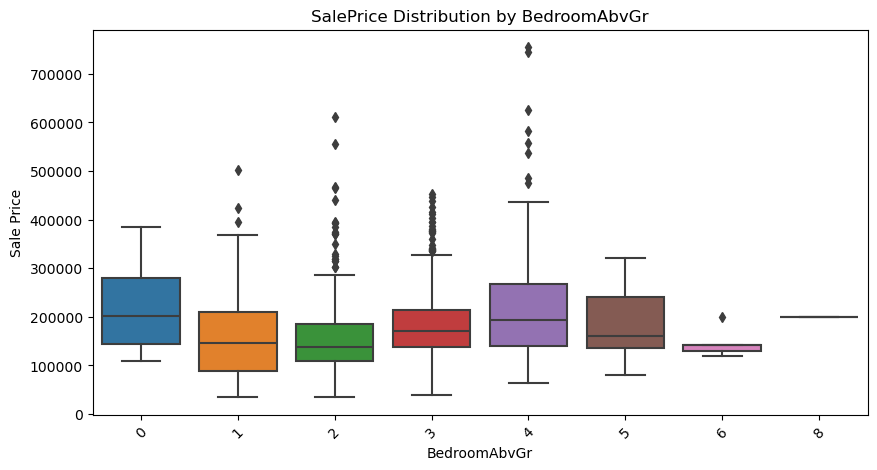

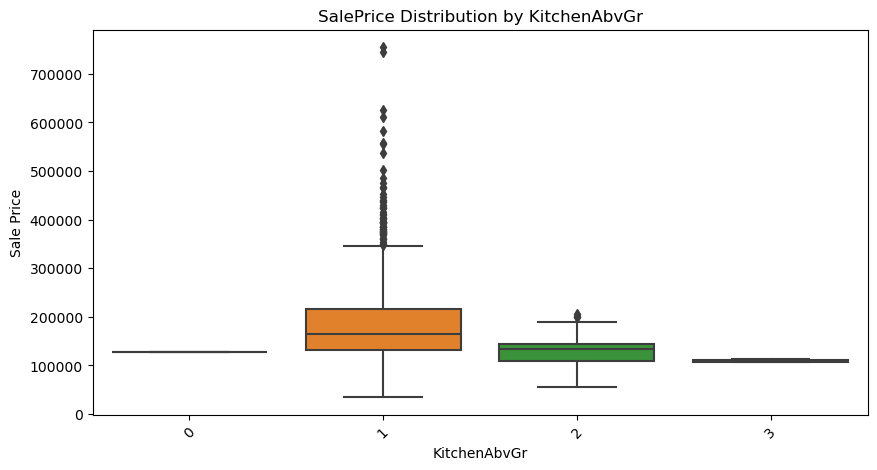

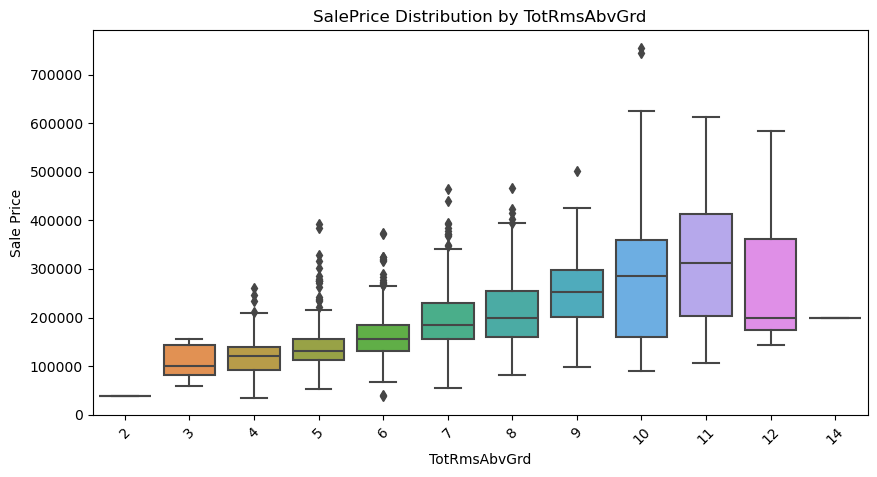

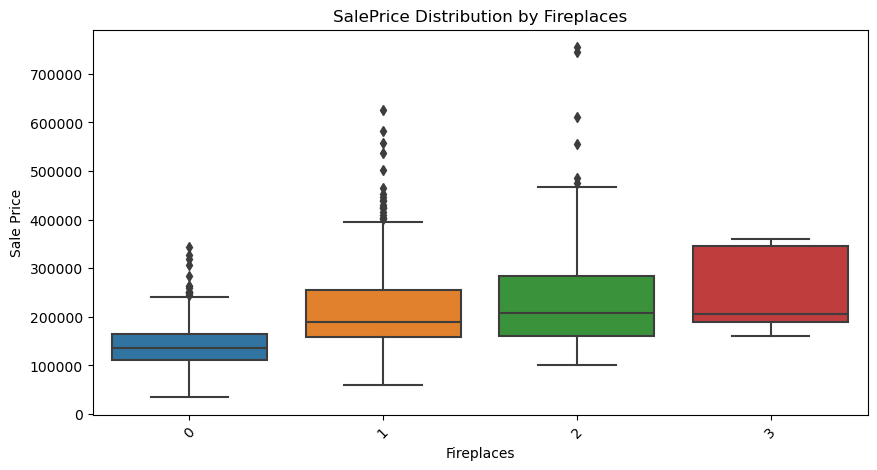

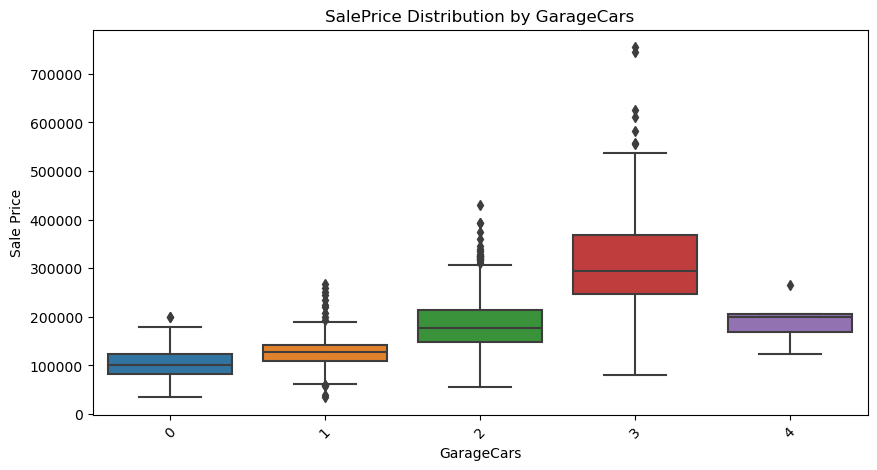

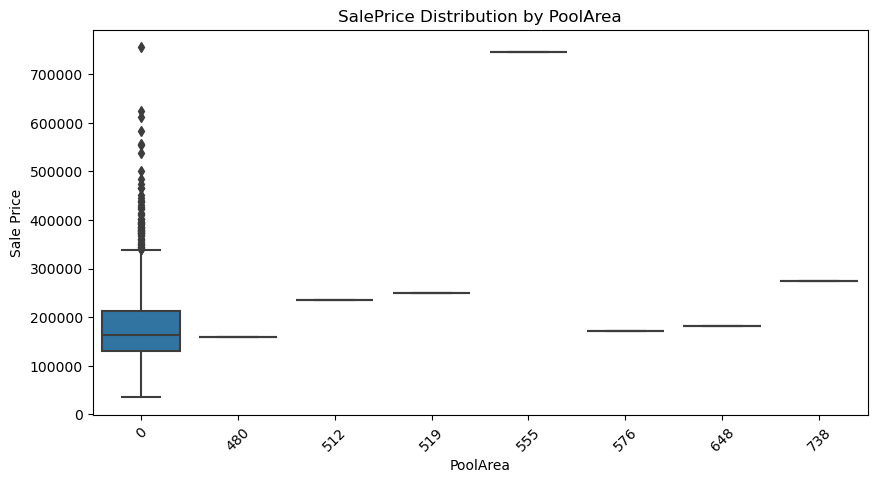

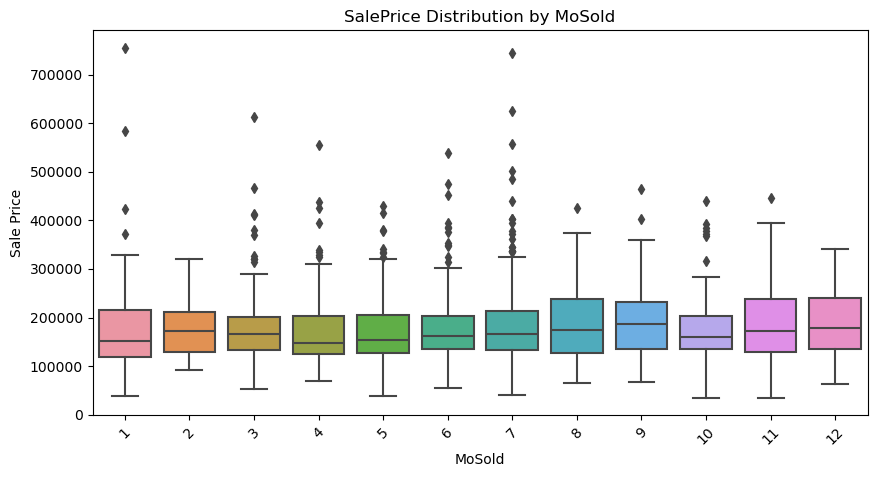

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each discrete feature and create a box plot against SalePrice
for feature in discrete_feature:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=feature, y='SalePrice', data=dataset)
    plt.title(f'SalePrice Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.show()


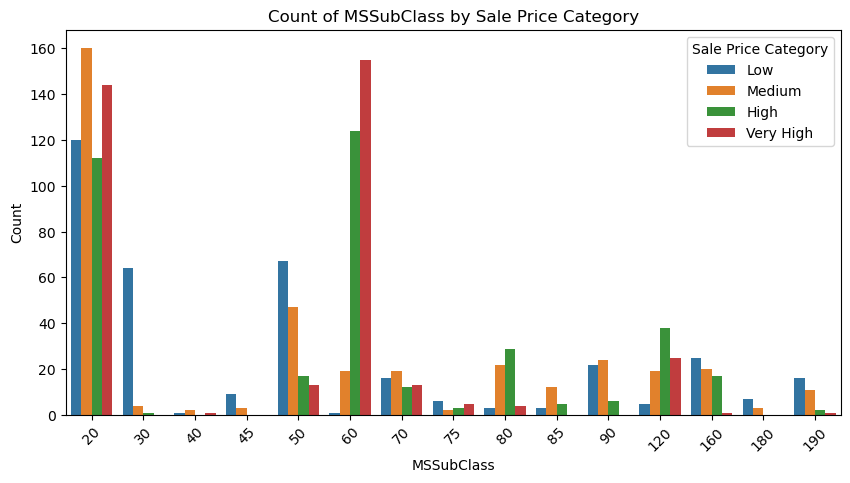

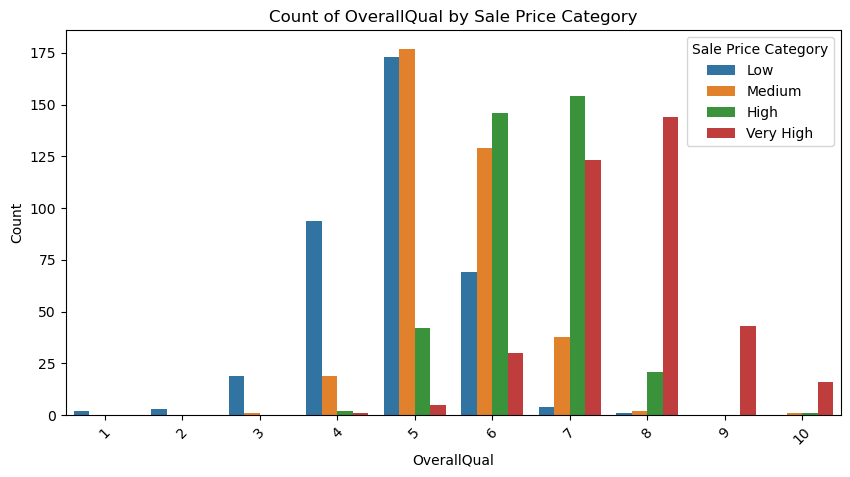

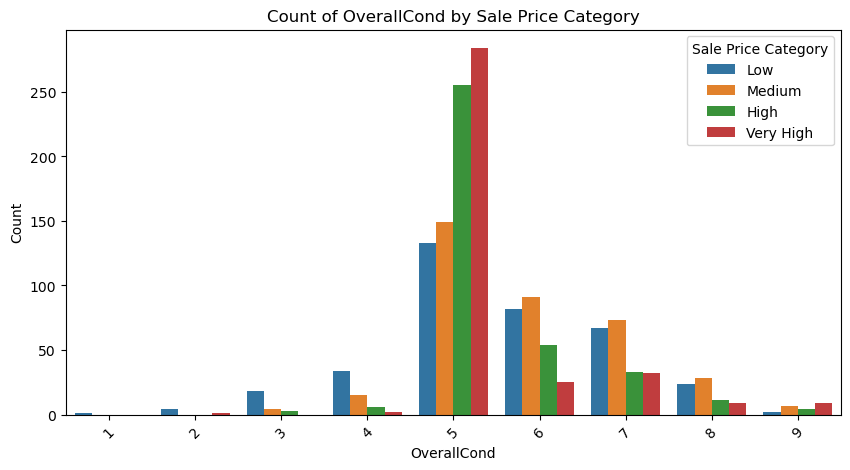

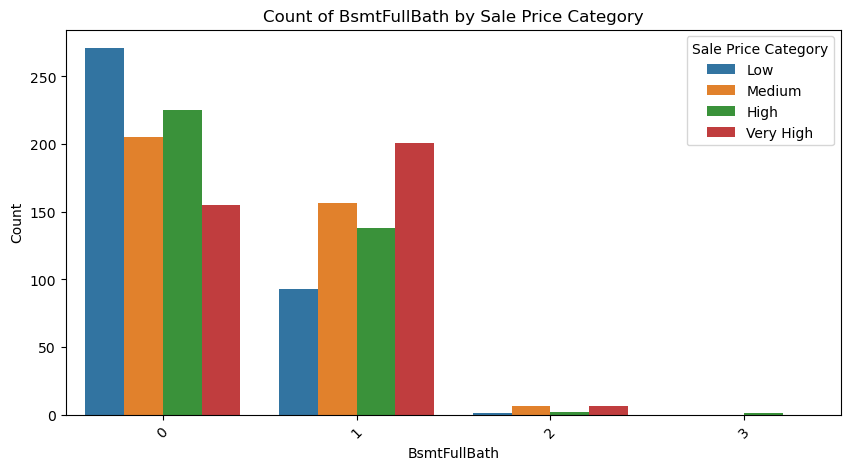

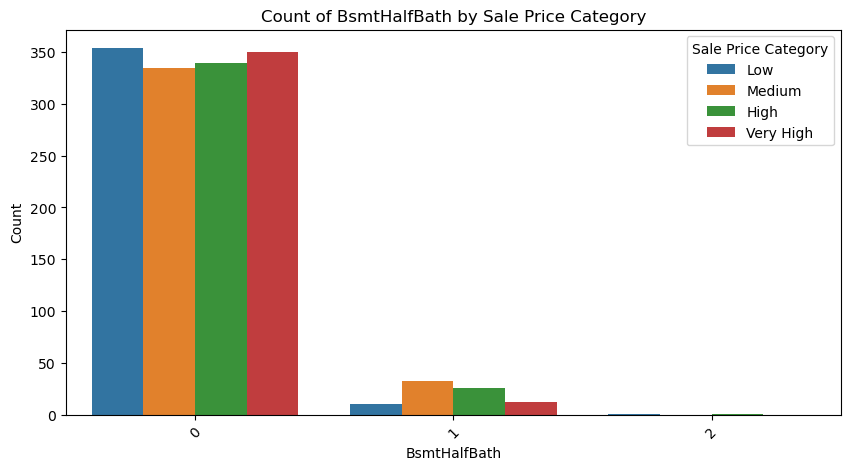

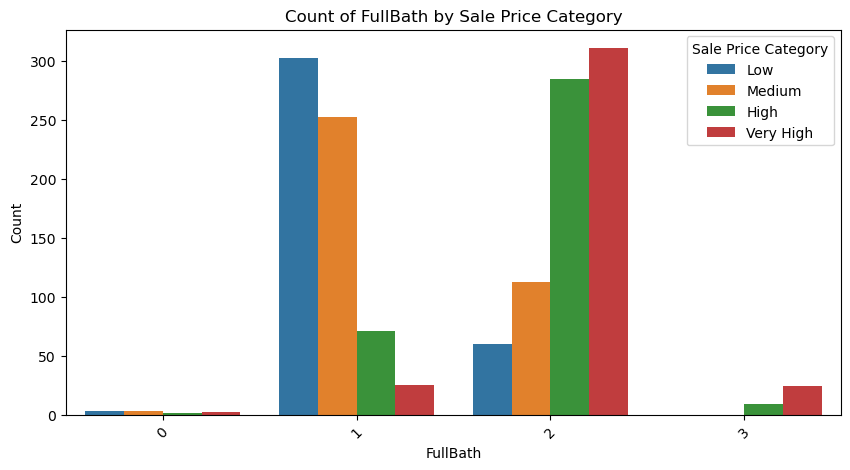

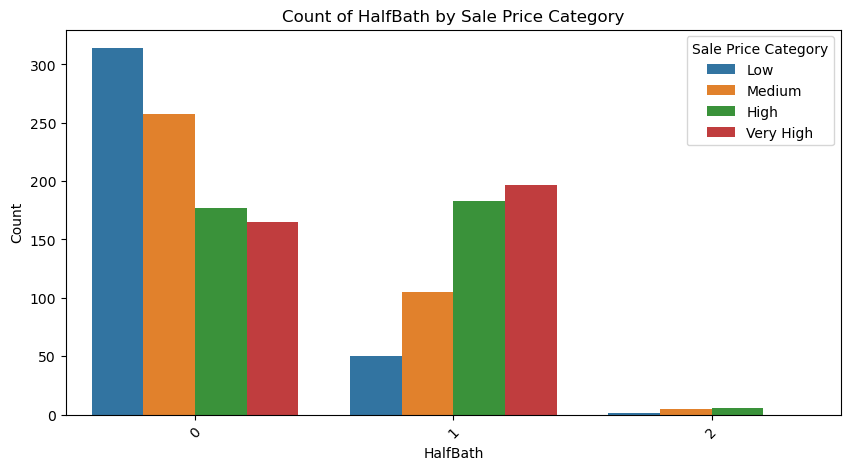

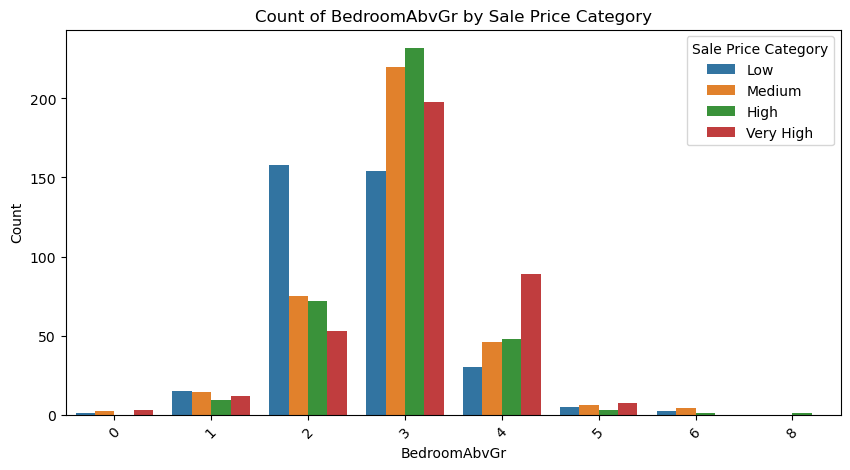

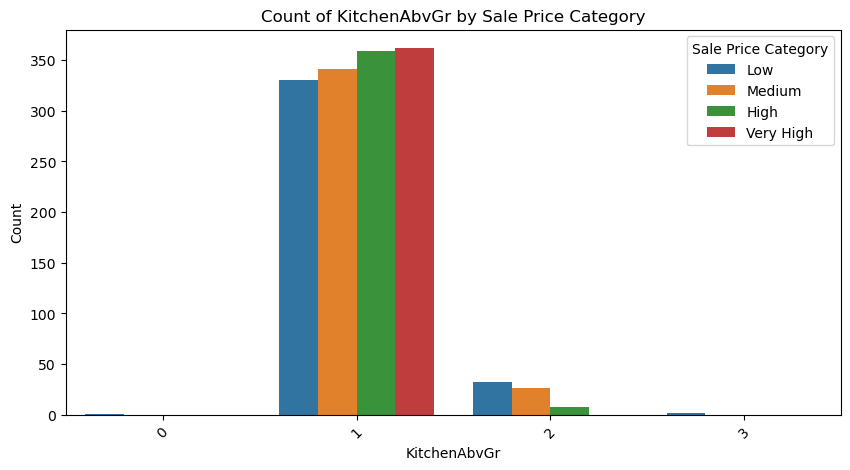

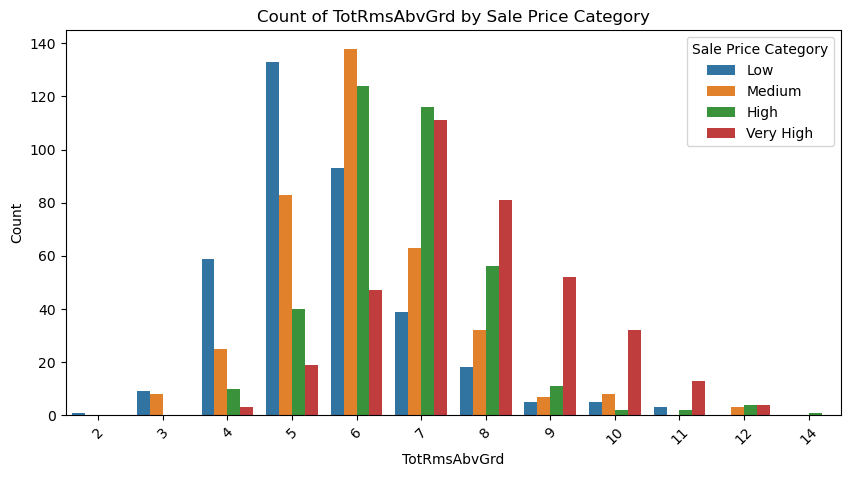

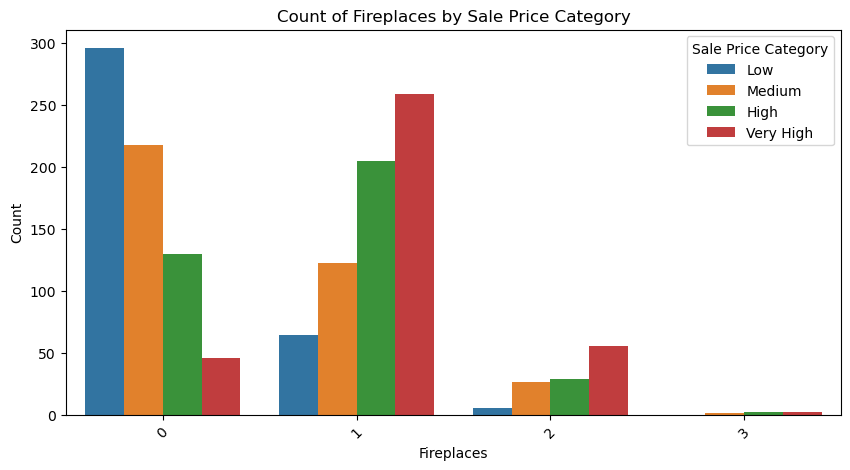

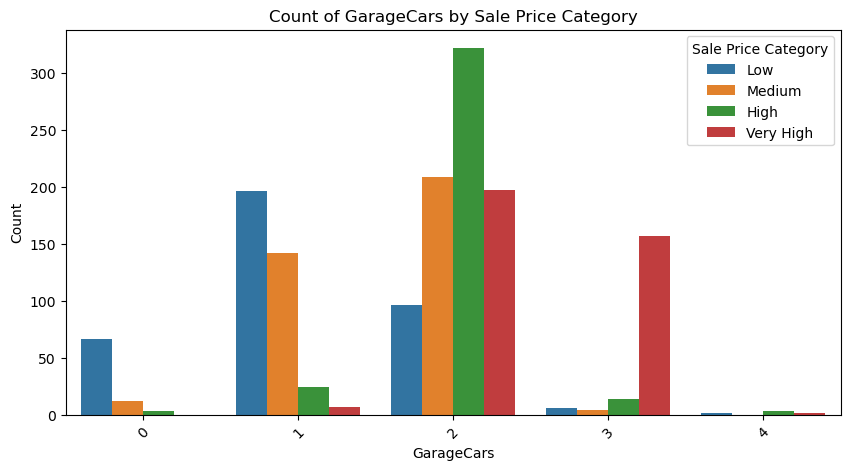

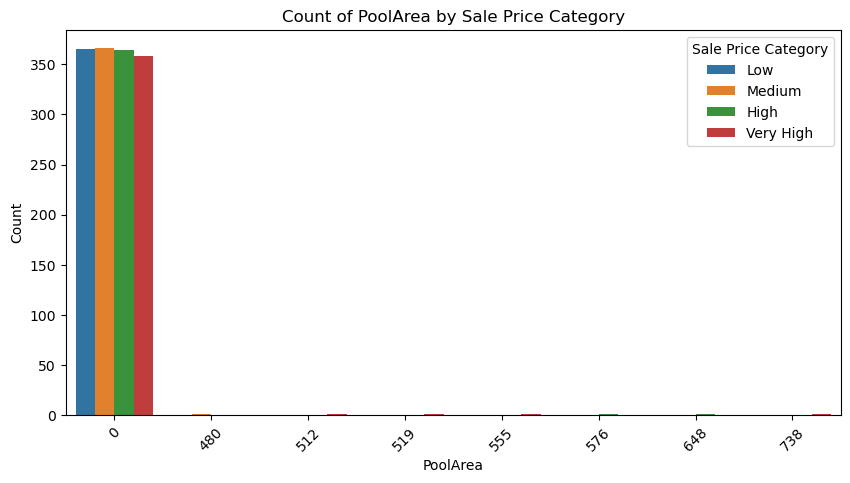

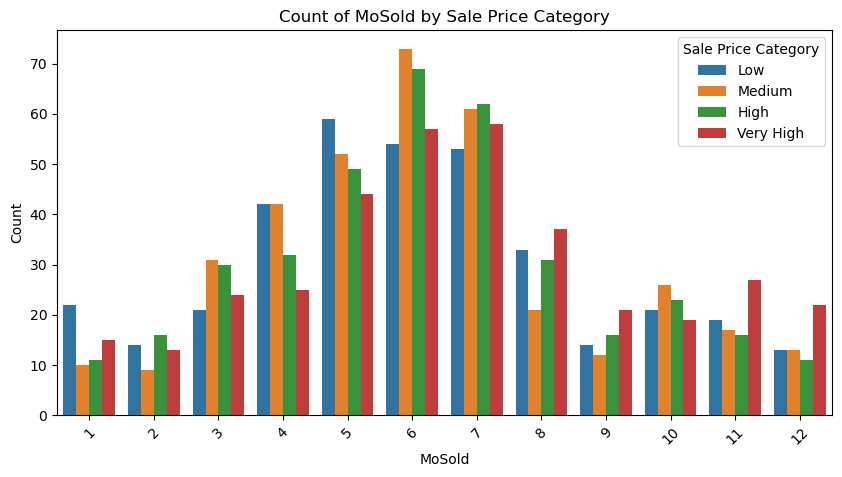

In [28]:
# Optional: Using bins for SalePrice if it's continuous
# Create a new categorical column for SalePrice
price_bins = pd.qcut(dataset['SalePrice'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
dataset['SalePriceCategory'] = price_bins

for feature in discrete_feature:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='SalePriceCategory', data=dataset)
    plt.title(f'Count of {feature} by Sale Price Category')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Sale Price Category')
    plt.show()


## 2. Continuous Variables

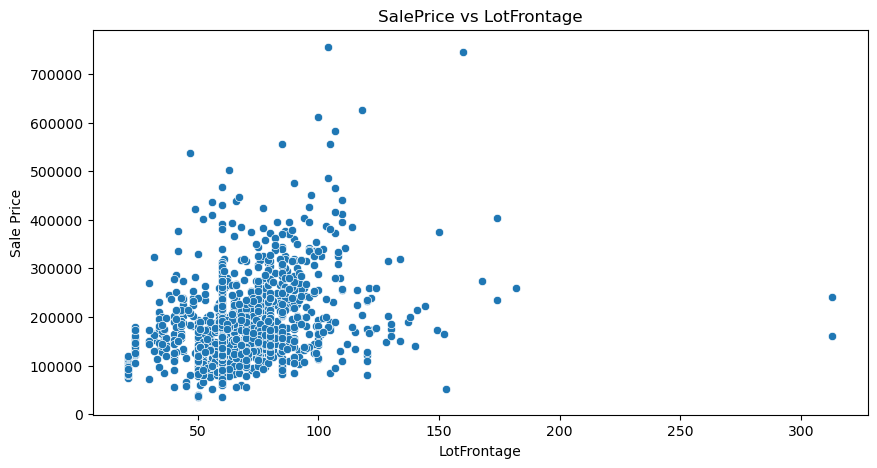

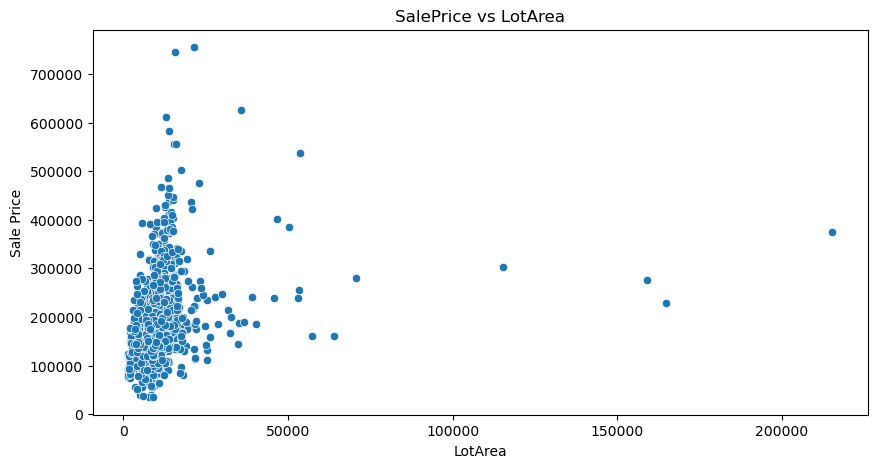

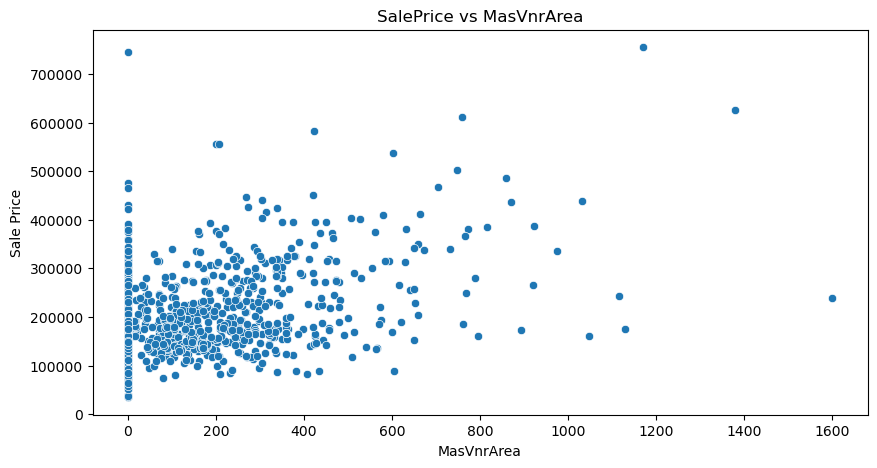

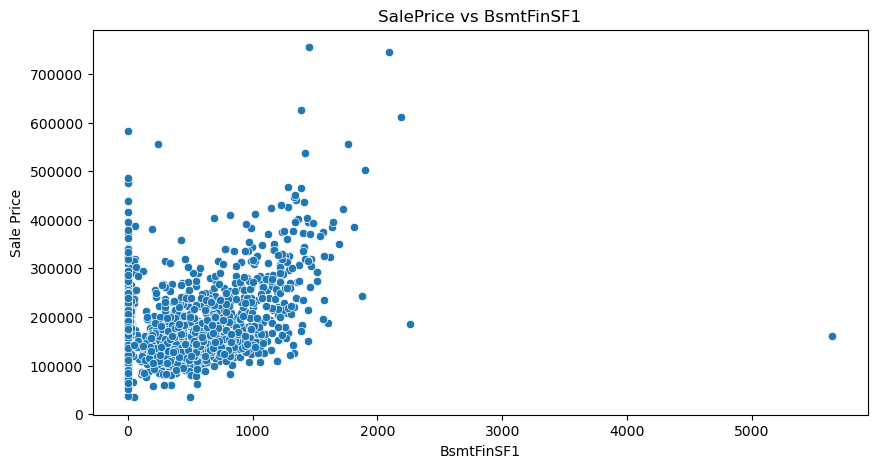

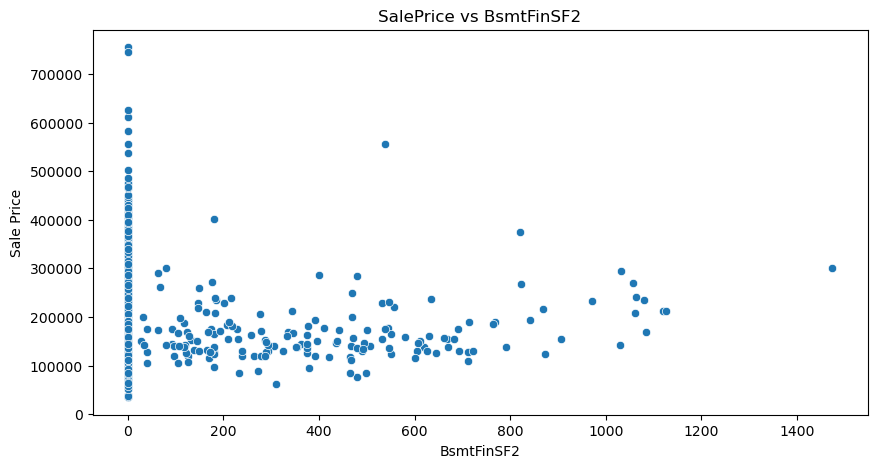

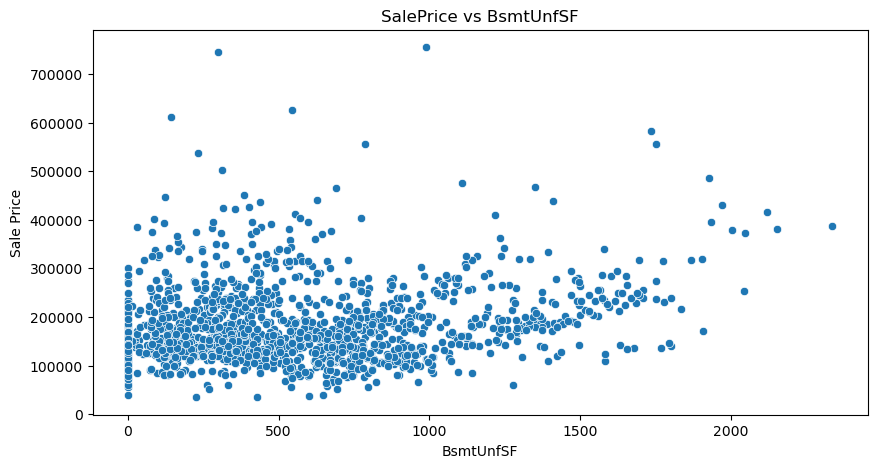

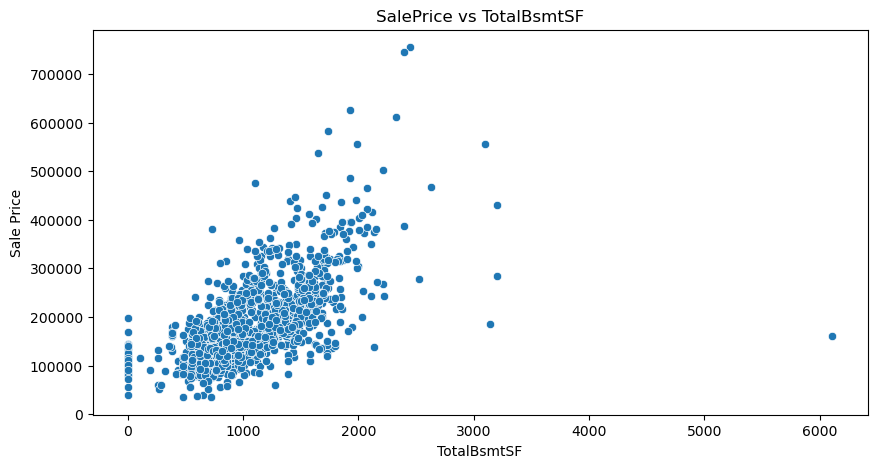

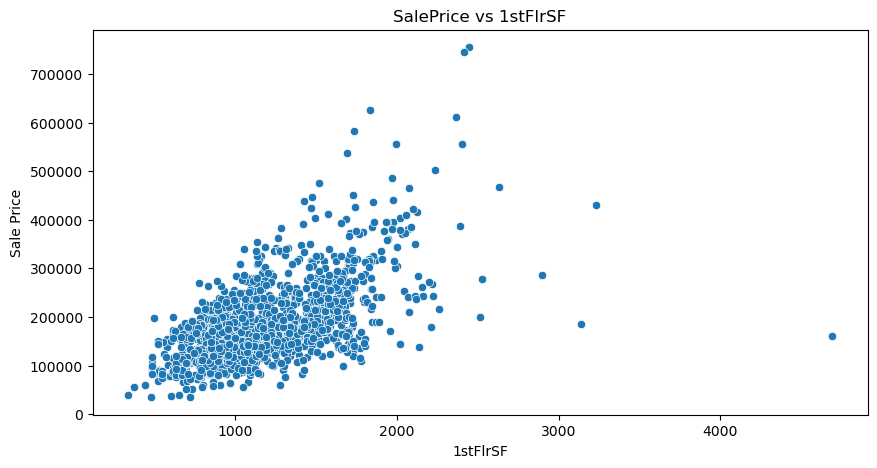

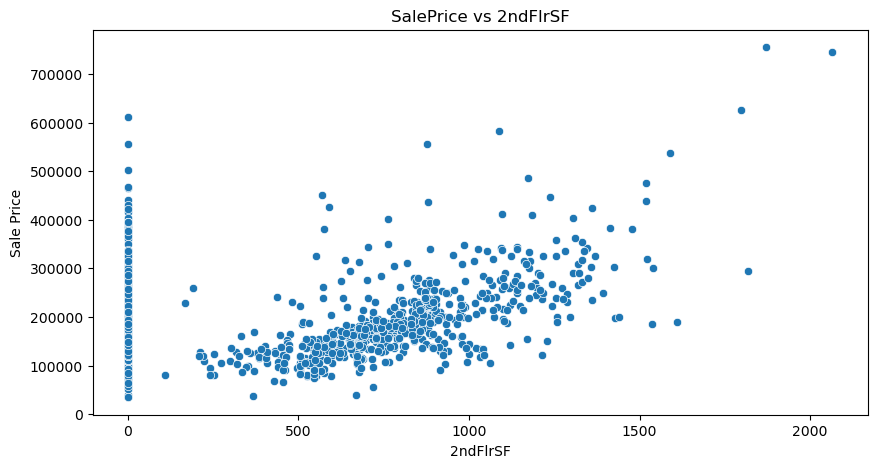

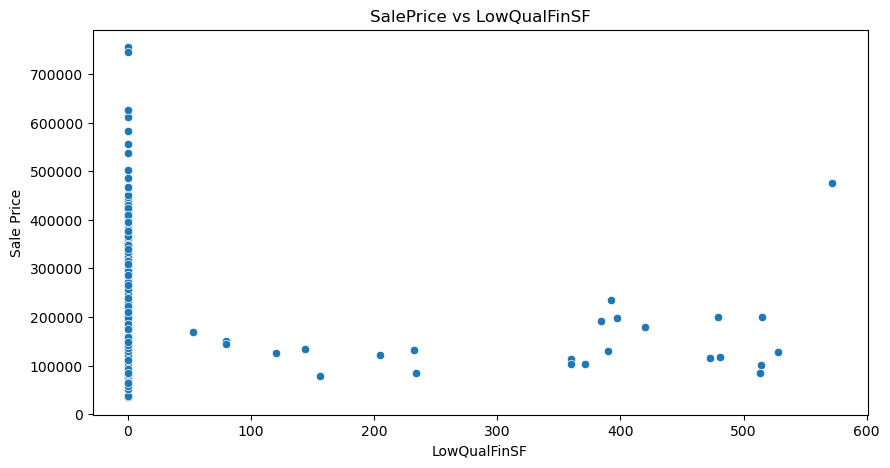

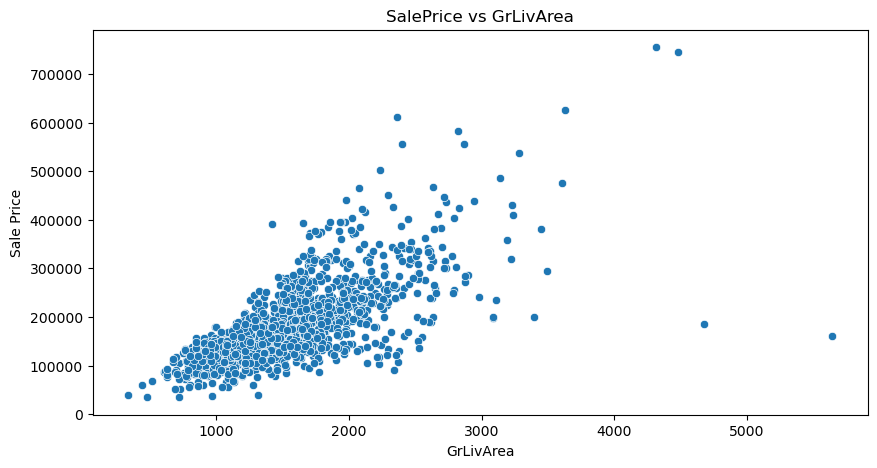

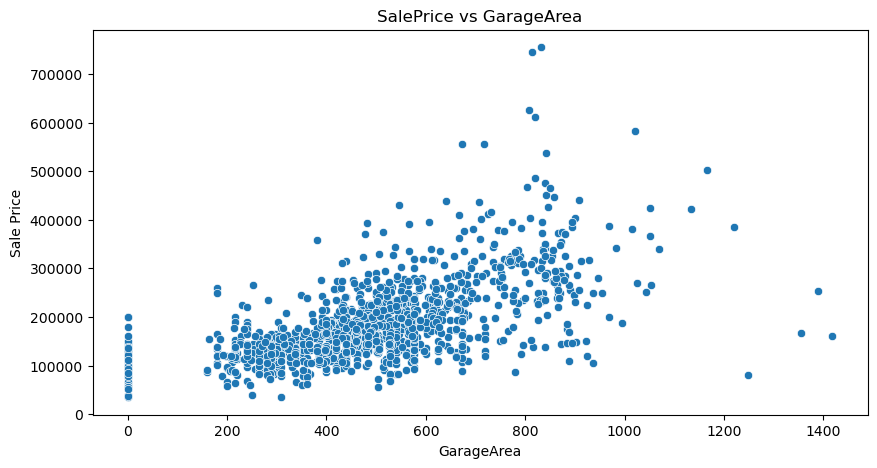

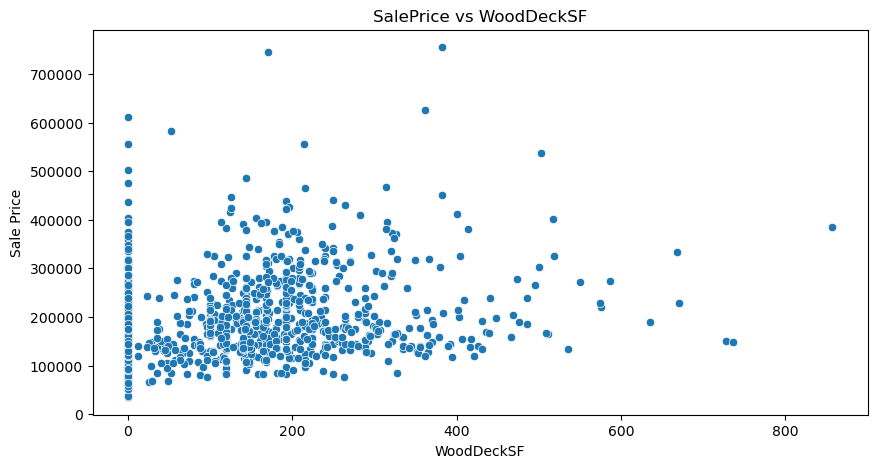

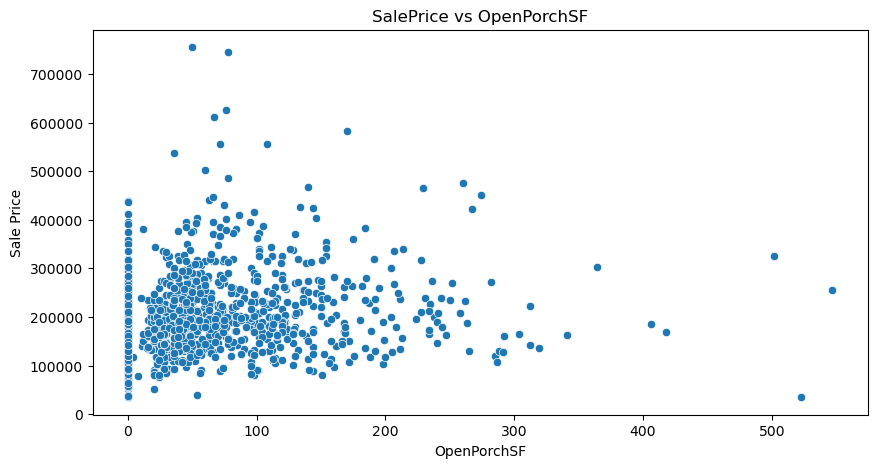

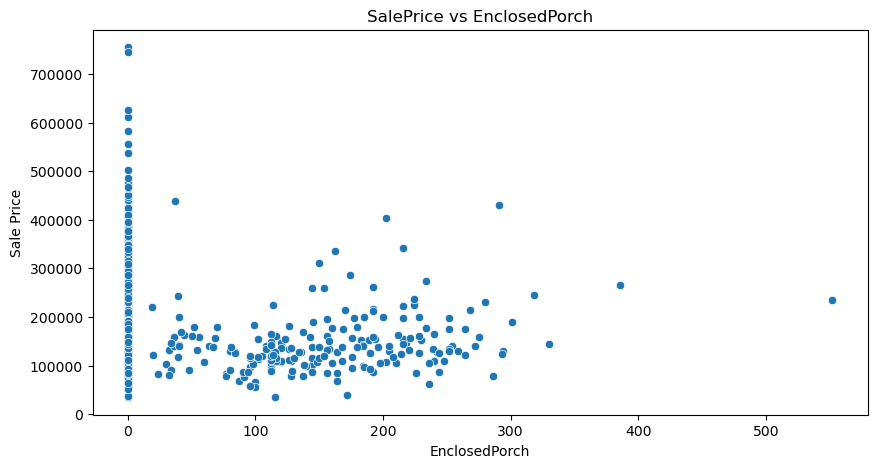

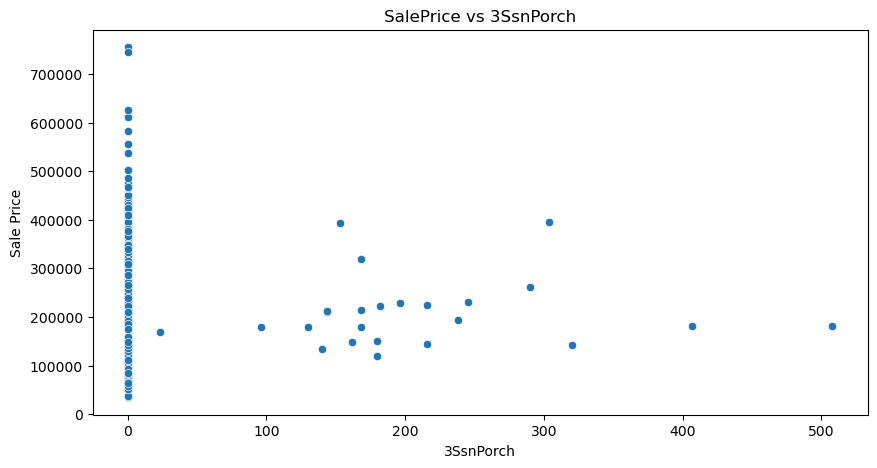

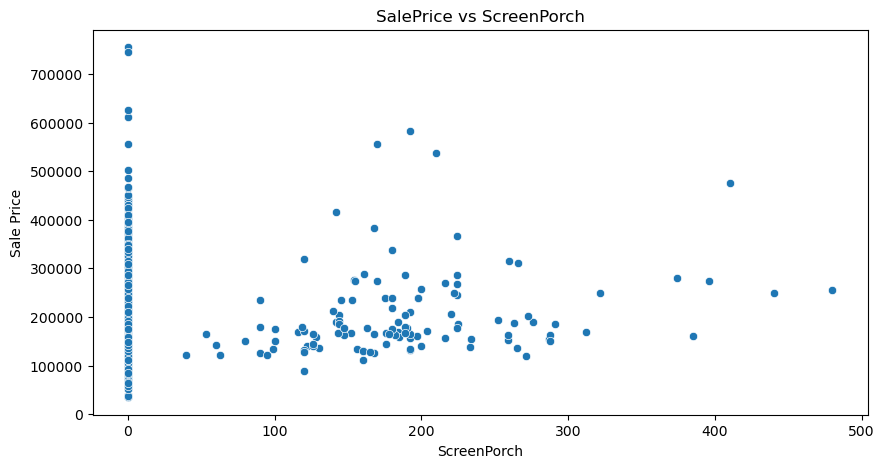

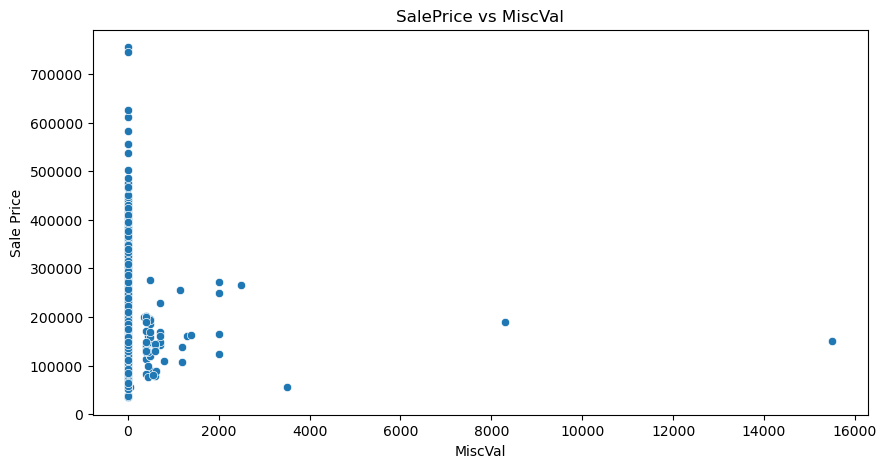

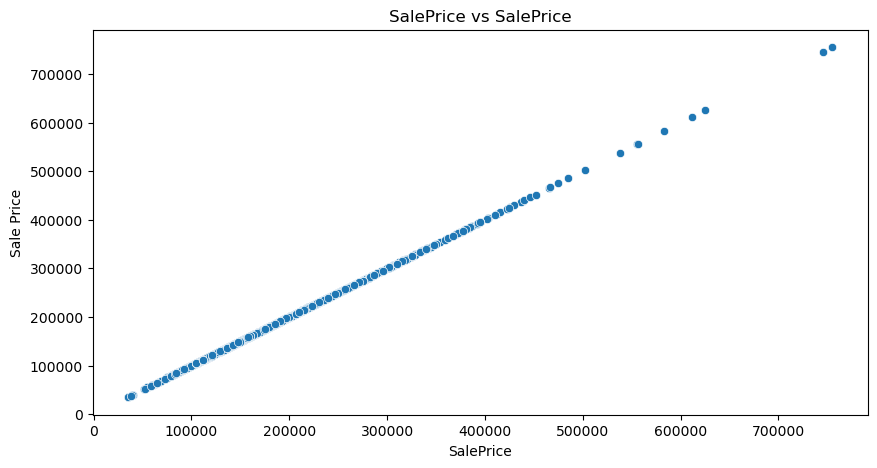

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each continuous feature and create a scatter plot against SalePrice
for feature in continuous_feature:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=dataset[feature], y=dataset['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

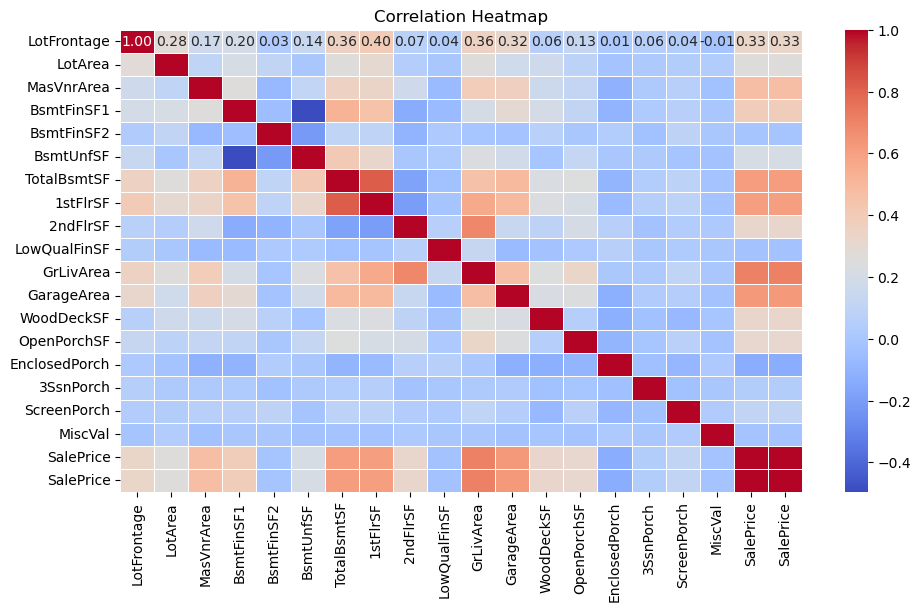

In [30]:
# Calculate the correlation matrix
correlation_matrix = dataset[continuous_feature + ['SalePrice']].corr()

# Generate a heatmap
plt.figure(figsize=(11, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### **Observations from the Correlation Summary:**

1. **Strong Positive Correlations**:
   - **GrLivArea (0.71)** and **TotalBsmtSF (0.61)** show the highest positive correlation with SalePrice, indicating that larger living areas and total basement square footage tend to increase house prices.
   - **GarageArea (0.62)** also has a strong positive relationship, suggesting more garage space contributes to higher prices.

2. **Moderate Positive Correlations**:
   - **MasVnrArea (0.47)** and **1stFlrSF (0.61)** reflect moderate positive correlations, implying these features add value.

3. **Weak to Negative Correlations**:
   - Features like **BsmtFinSF2 (-0.01)** and **MiscVal (-0.02)** show very weak or negative correlations, indicating they do not significantly impact SalePrice.

4. **Features with No Strong Impact**:
   - **LowQualFinSF (-0.03)** and **EnclosedPorch (-0.13)** also indicate little to no impact on sale prices, highlighting the need for focus on key features in pricing strategies.

The correlation data suggest focusing on enhancing **GrLivArea**, **TotalBsmtSF**, and **GarageArea** could be vital for increasing sale prices. Features with low or negative correlations may need reevaluation for their value in pricing models.

## 3. Categorical Variables

In [31]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

In [32]:
dataset[categorical_features].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd          MasVnrType ExterQual ExterCond Foundation  \
0     VinylSd     VinylSd             BrkFace        Gd        TA      PConc   
1     MetalSd     MetalSd  Missing MasVnrType        TA        TA     CBlock   
2     VinylSd     VinylSd             BrkFace        Gd        TA      PConc   
3     Wd Sdng     Wd Shng  Missing MasVnrType        TA        TA     BrkTil   
4     VinylSd     VinylSd             BrkFace        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       Gd       TA           No          GLQ          Unf    GasA        Ex   
1       Gd       TA           Gd          ALQ          Unf    GasA        Ex   
2       Gd       TA           Mn          GLQ          Unf    GasA        Ex   
3       TA       Gd           No          ALQ          Unf    GasA        Gd   
4       Gd       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional          FireplaceQu  \
0          Y      SBrkr          Gd        Typ  Missing FireplaceQu   
1          Y      SBrkr          TA        Typ                   TA   
2          Y      SBrkr          Gd        Typ                   TA   
3          Y      SBrkr          Gd        Typ                   Gd   
4          Y      SBrkr          Gd        Typ                   TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [33]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of categories are 4
The feature is ExterQual and number of 

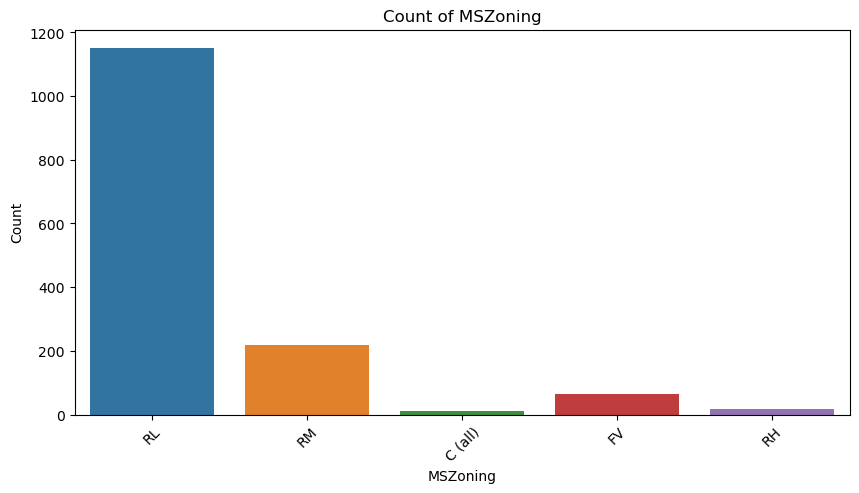

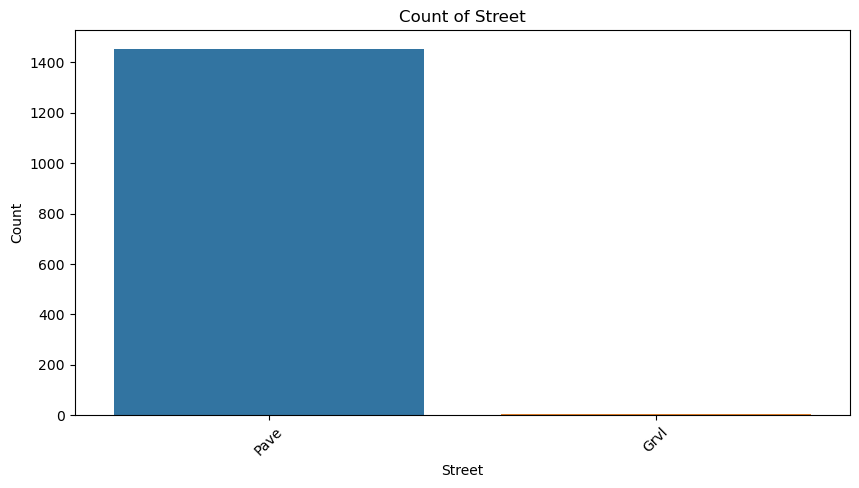

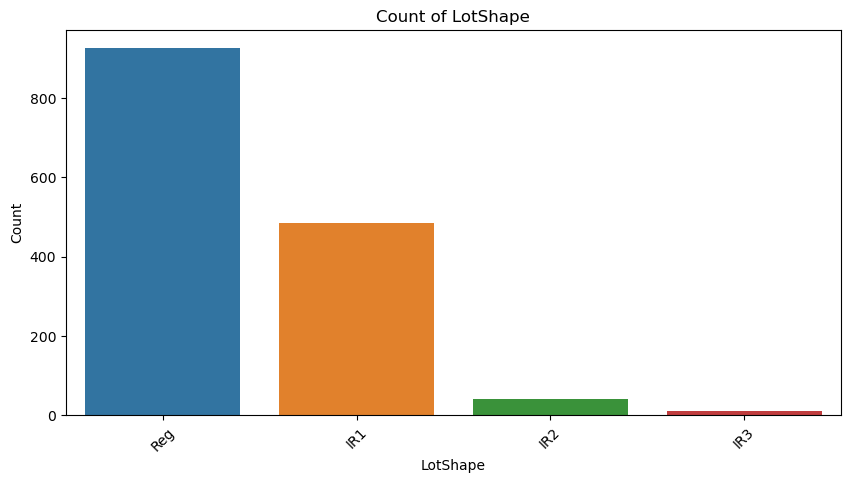

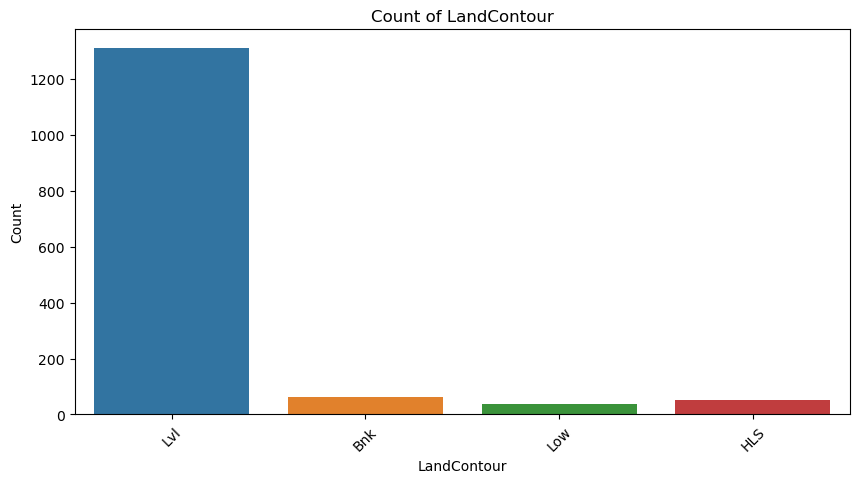

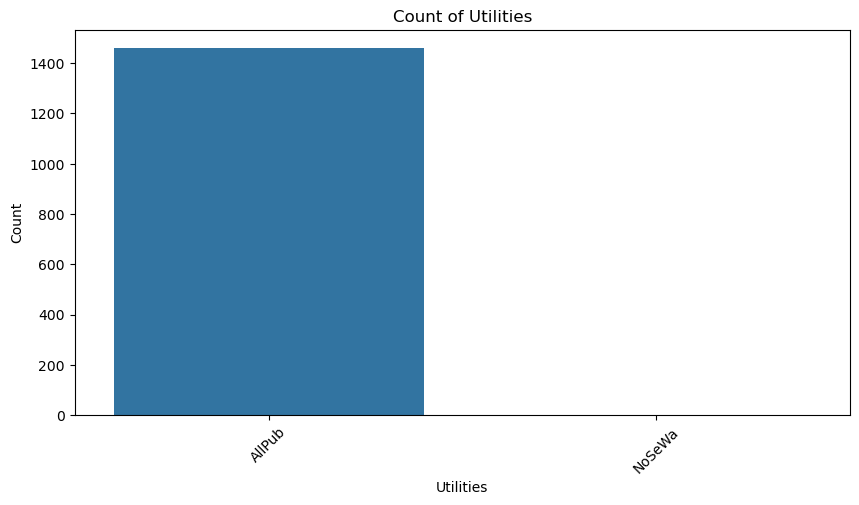

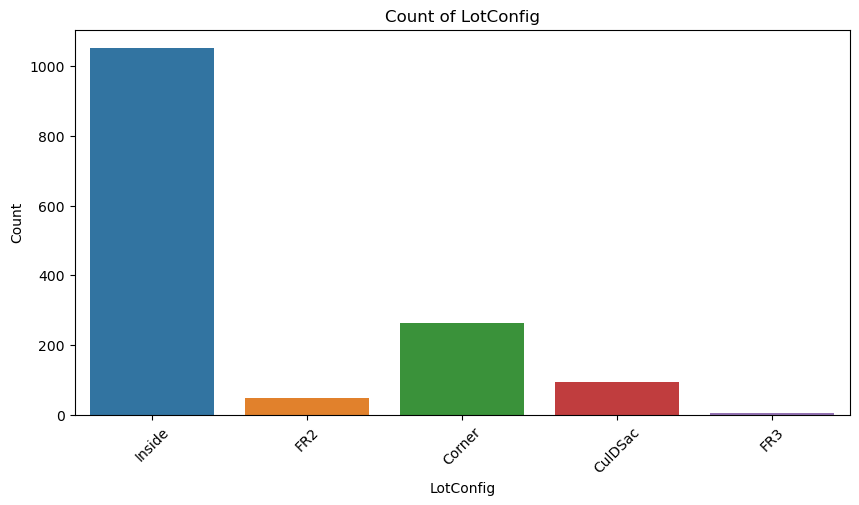

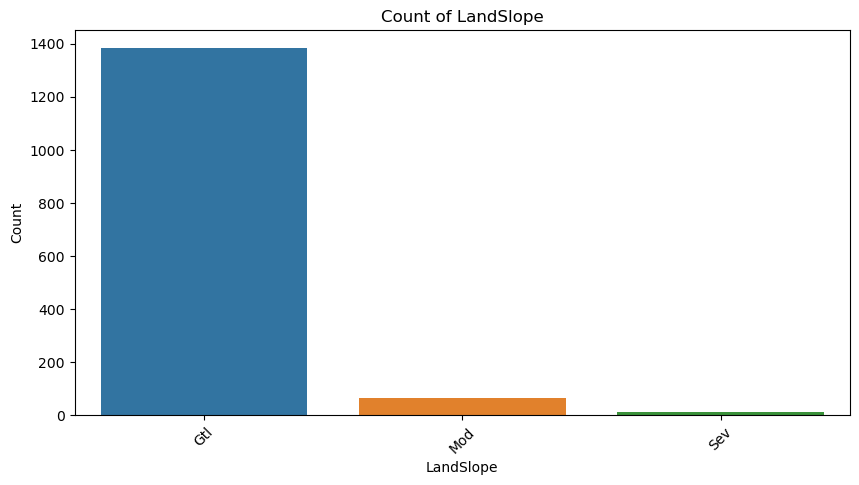

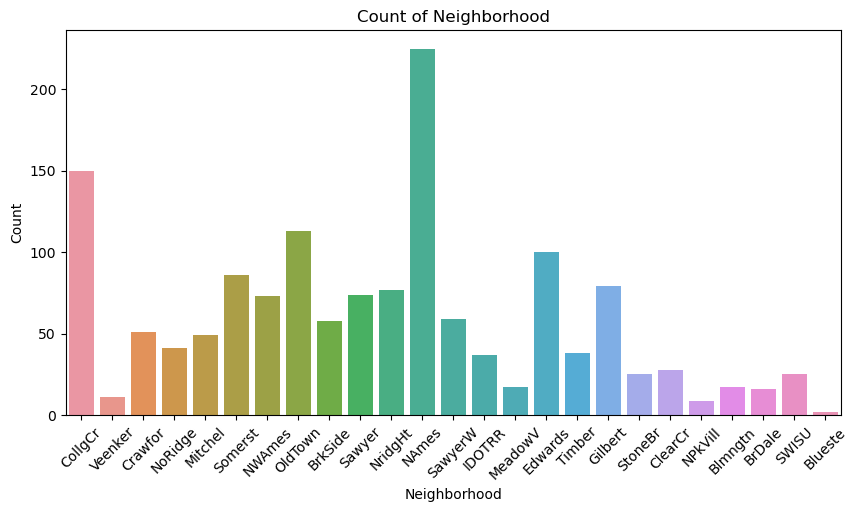

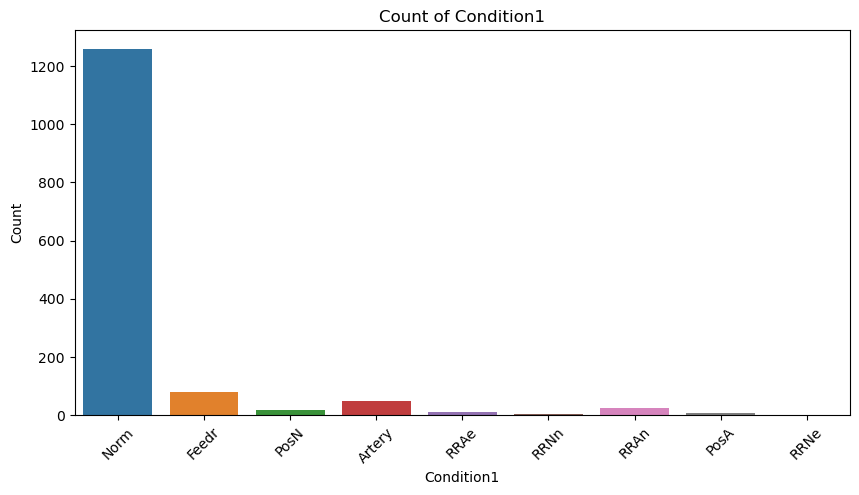

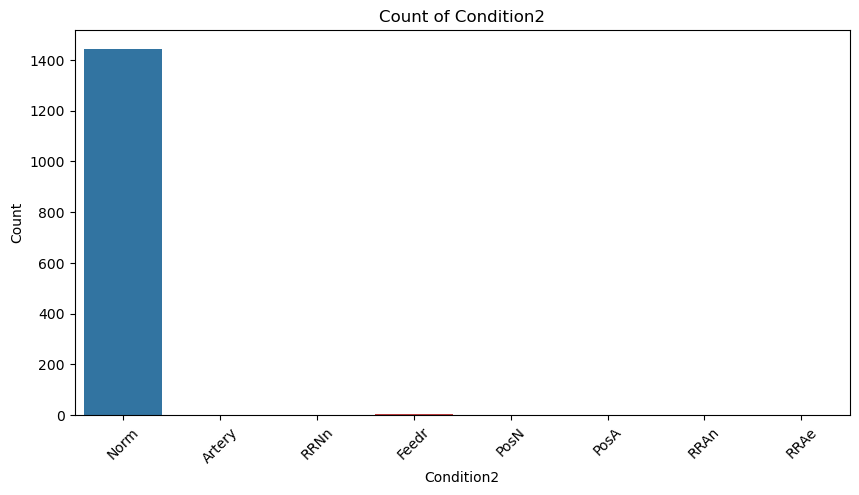

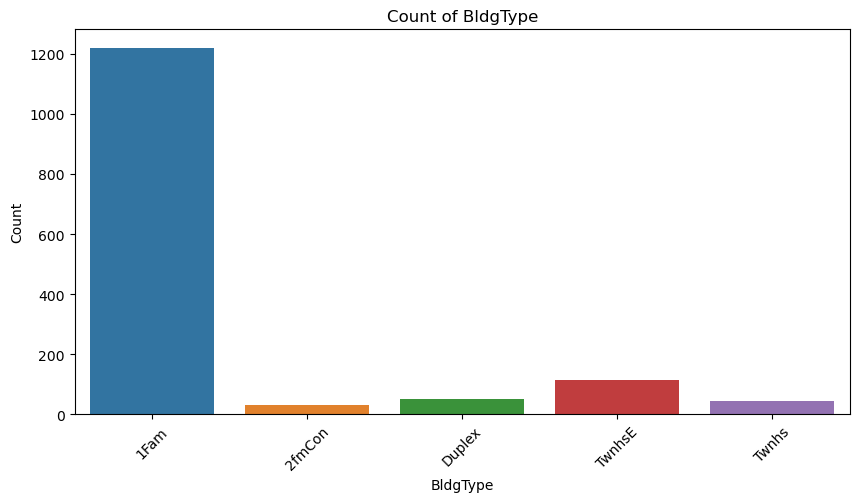

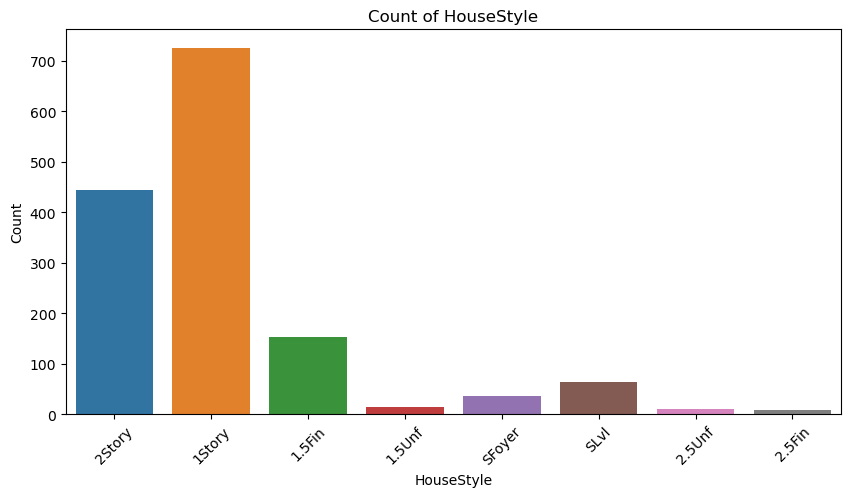

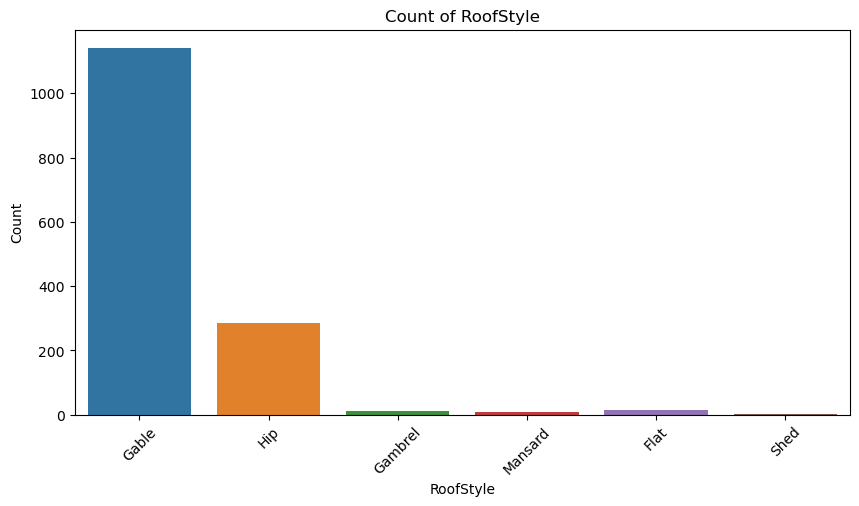

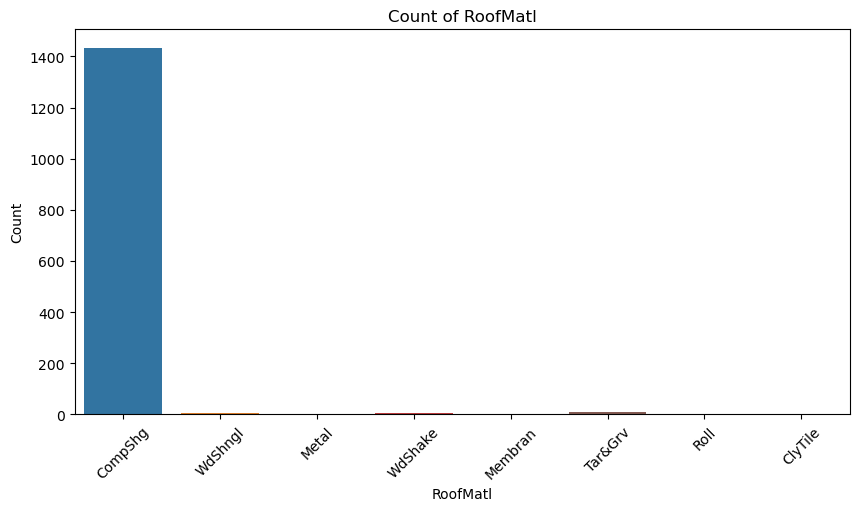

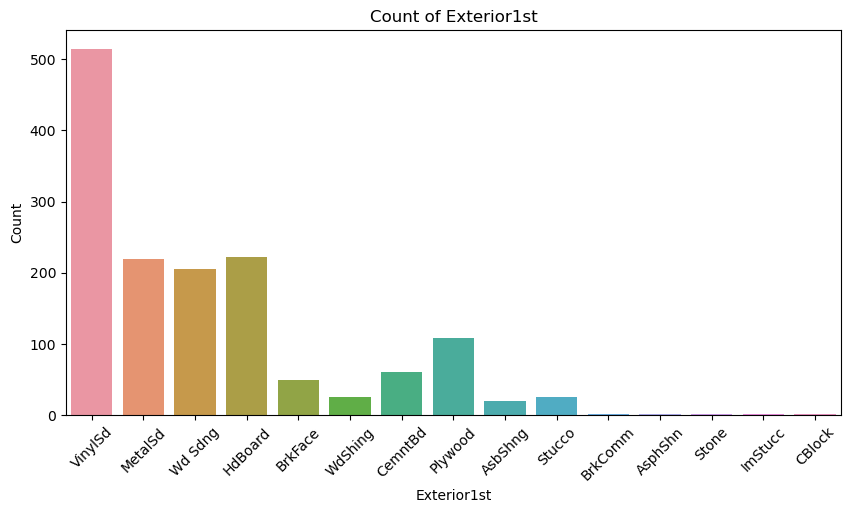

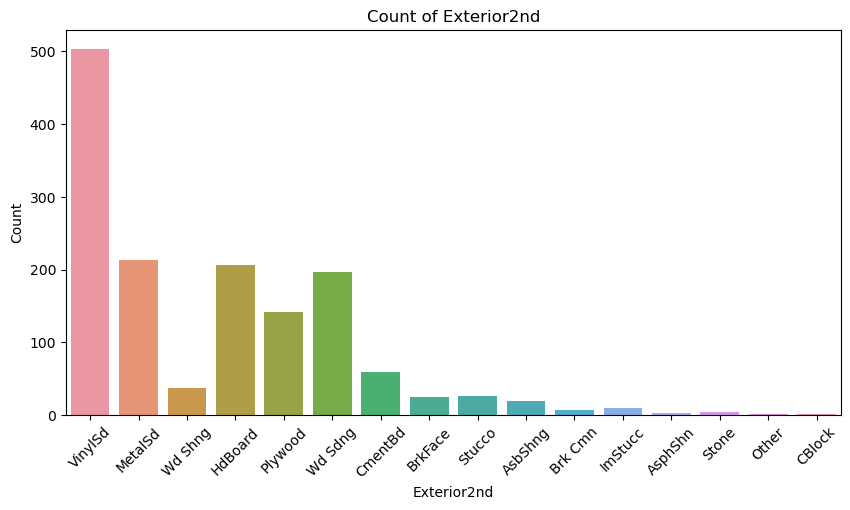

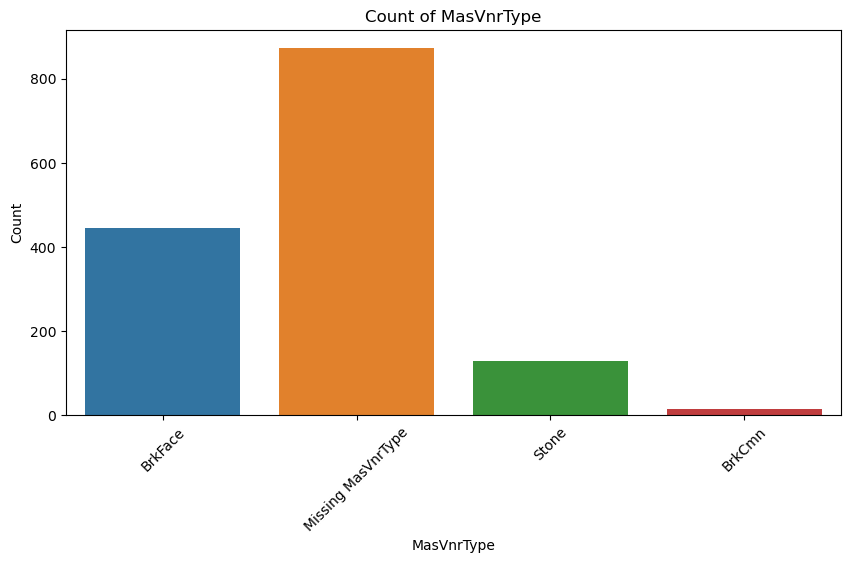

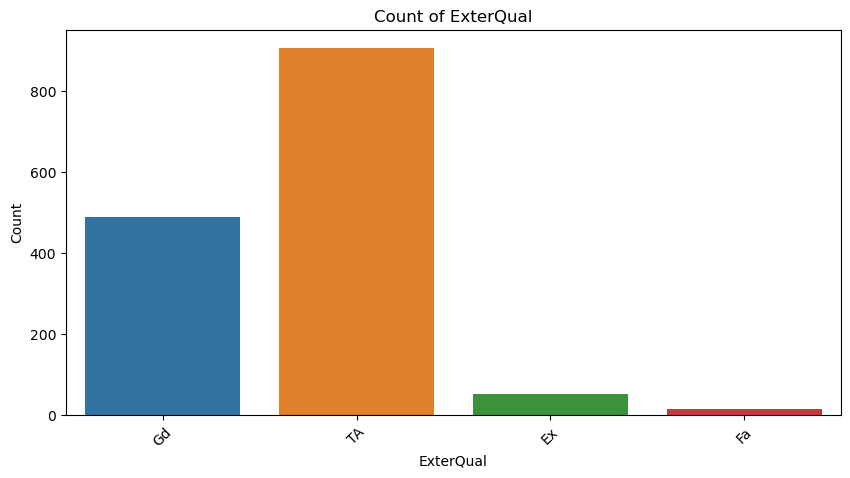

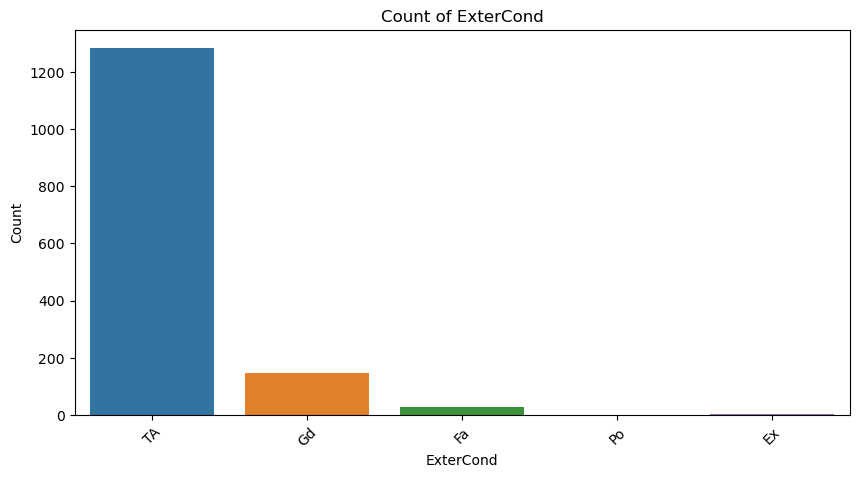

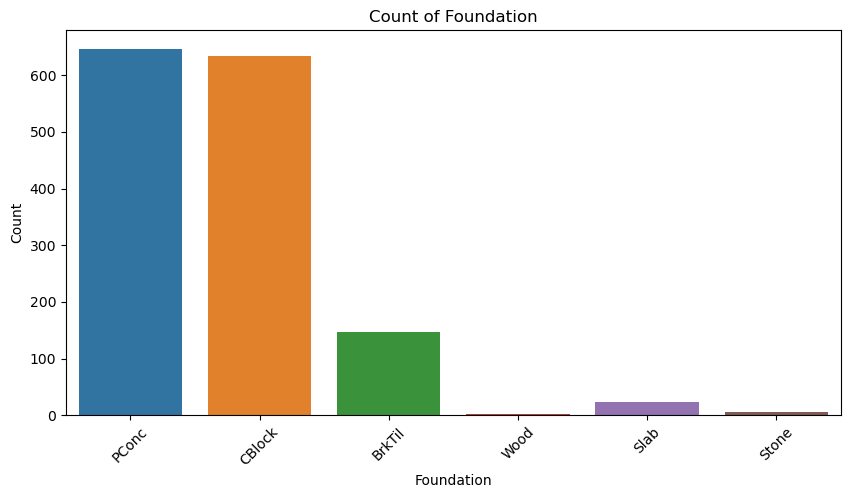

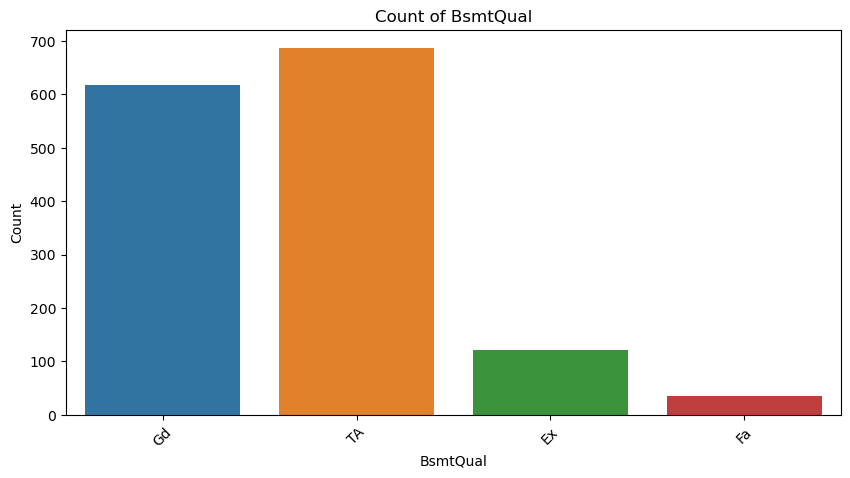

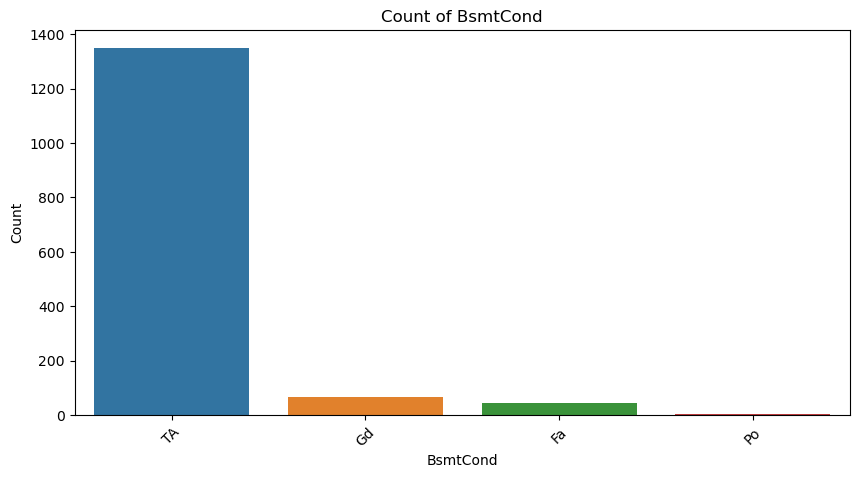

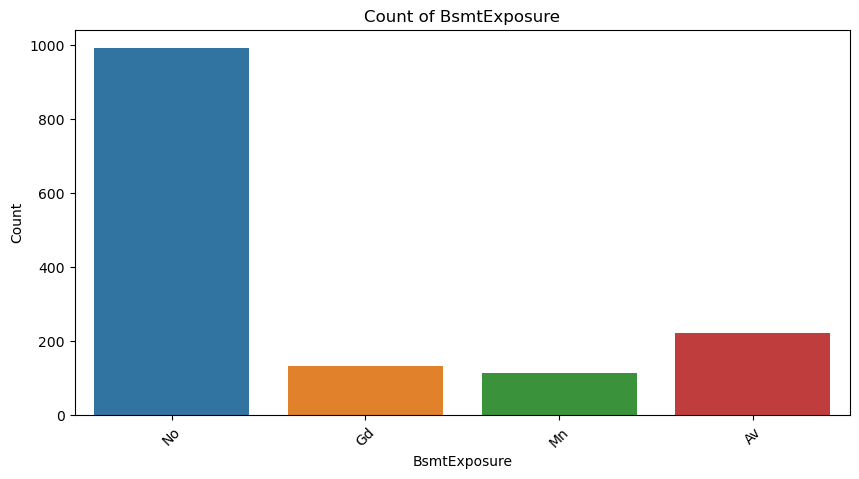

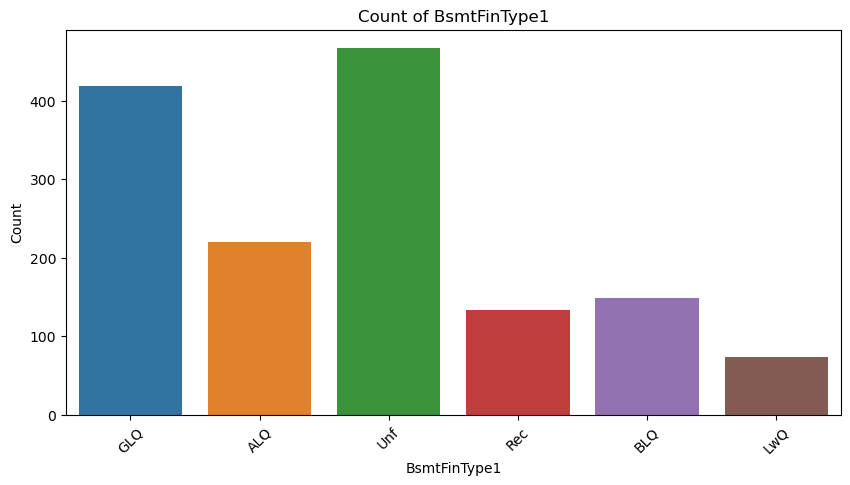

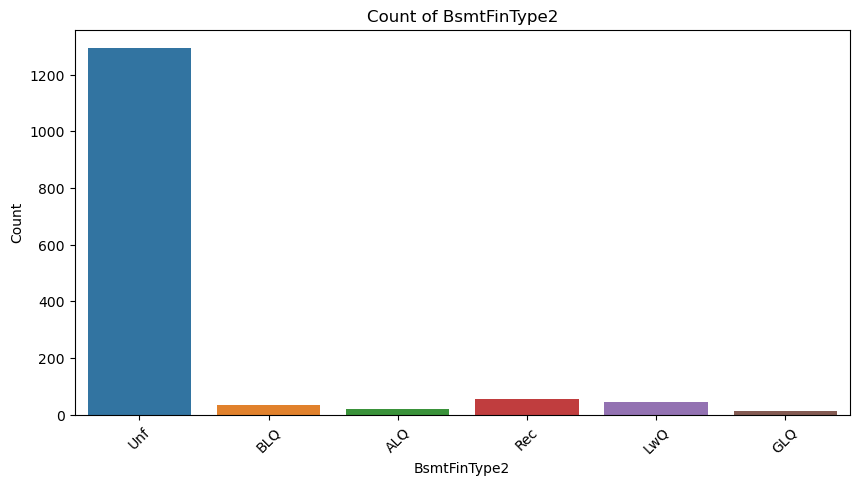

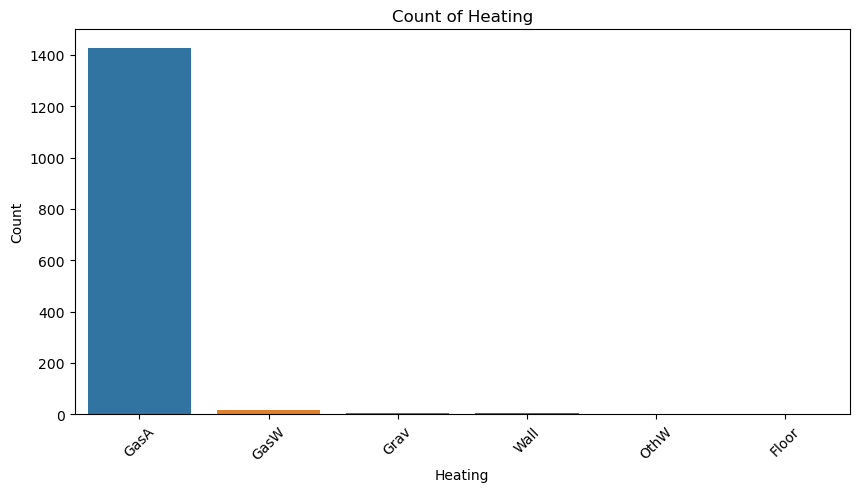

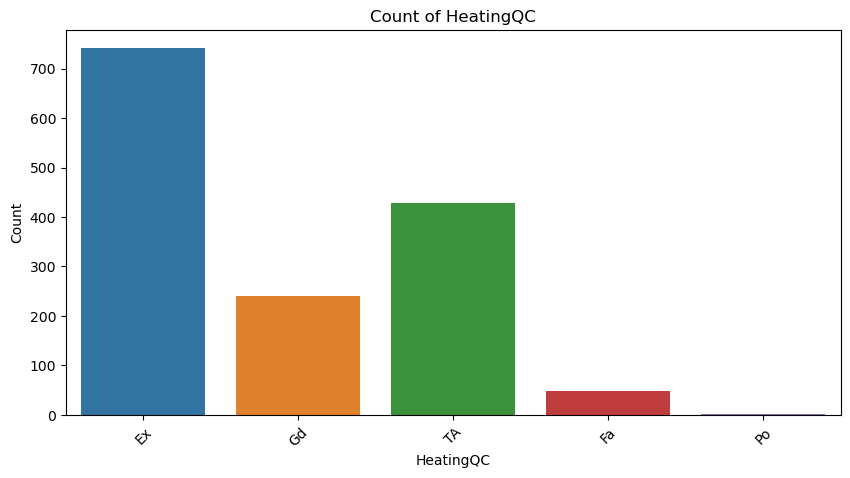

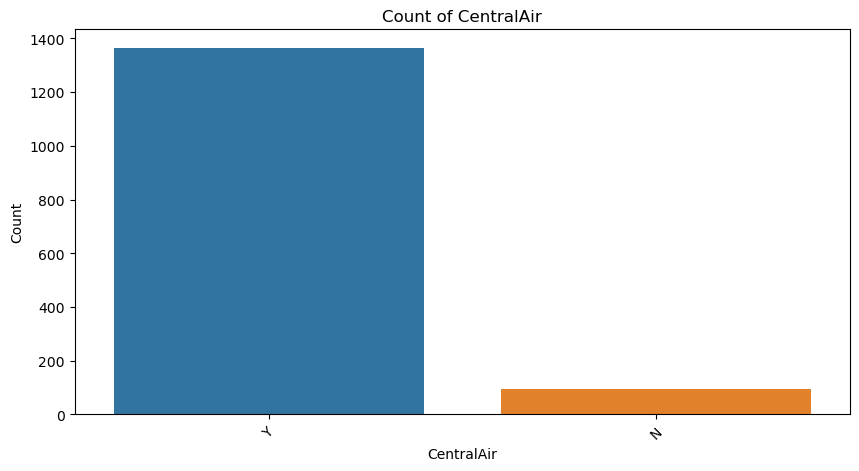

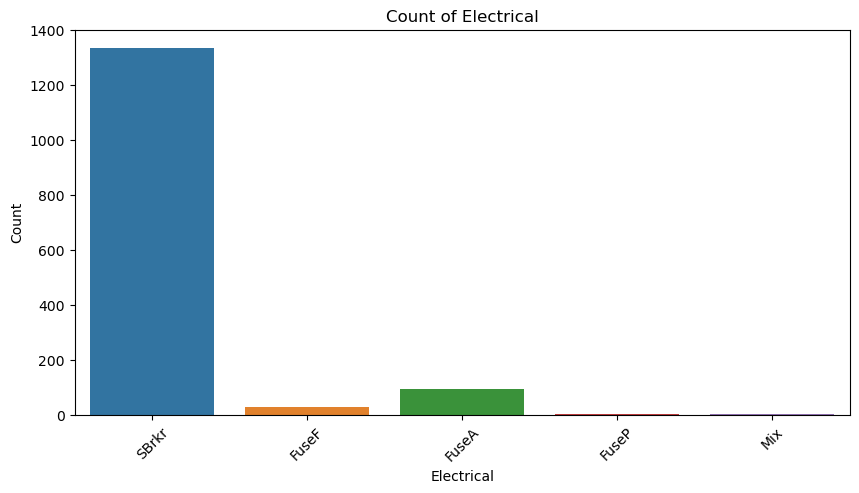

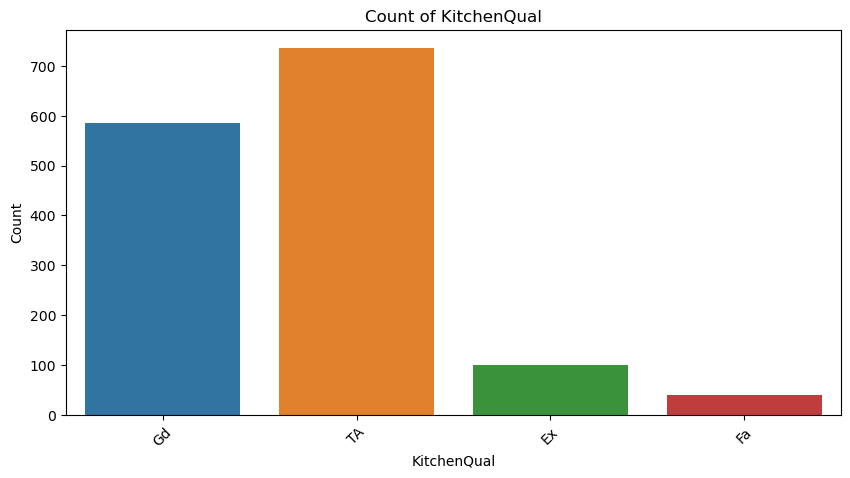

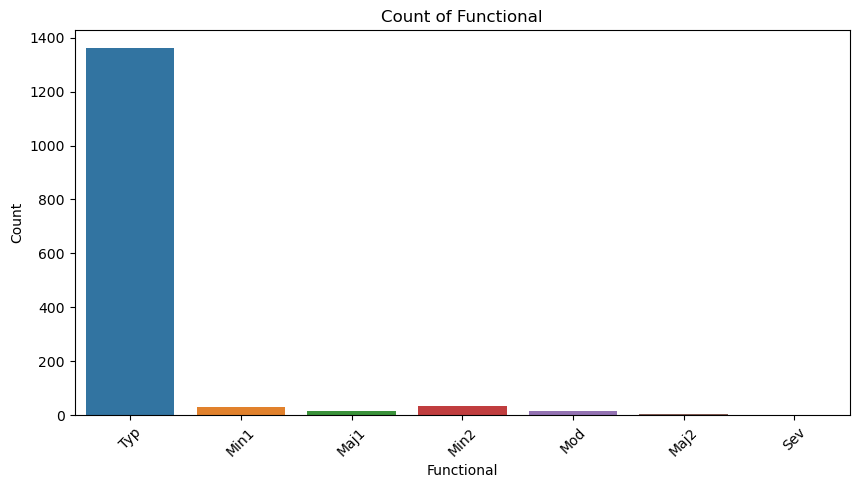

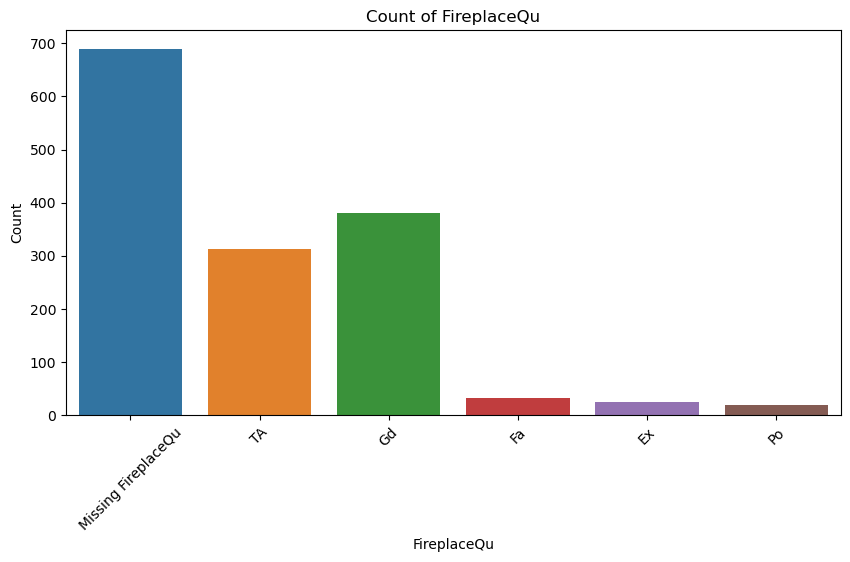

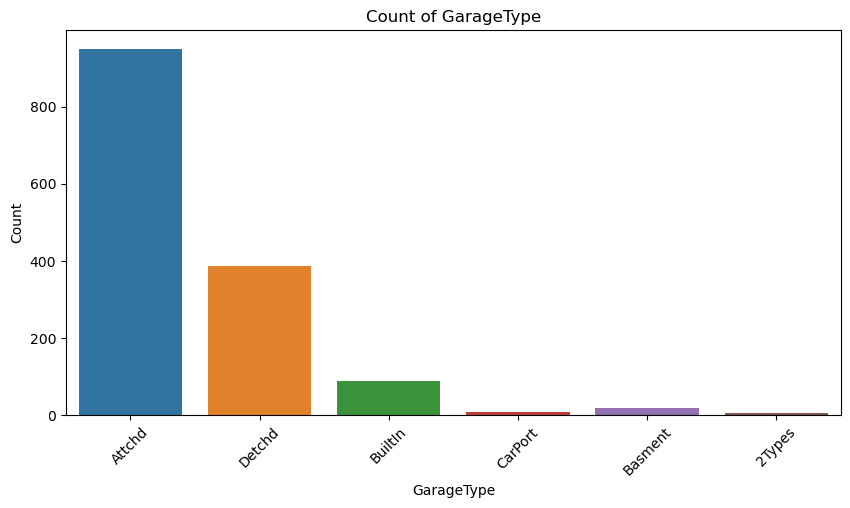

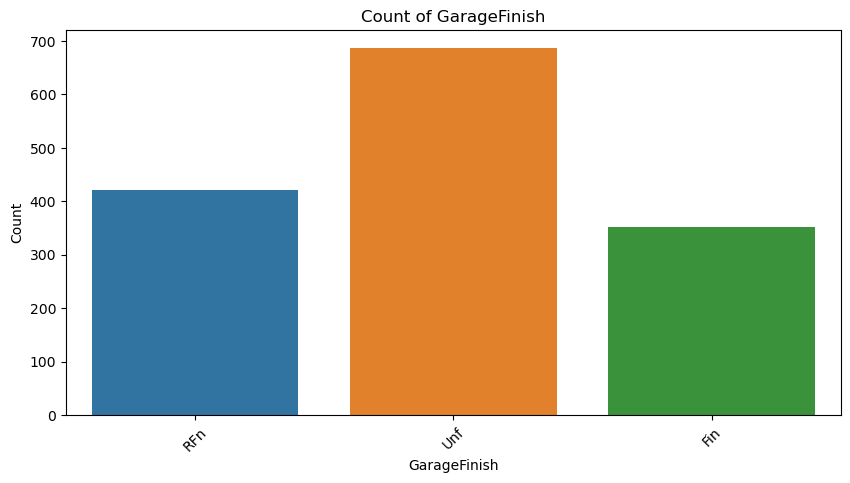

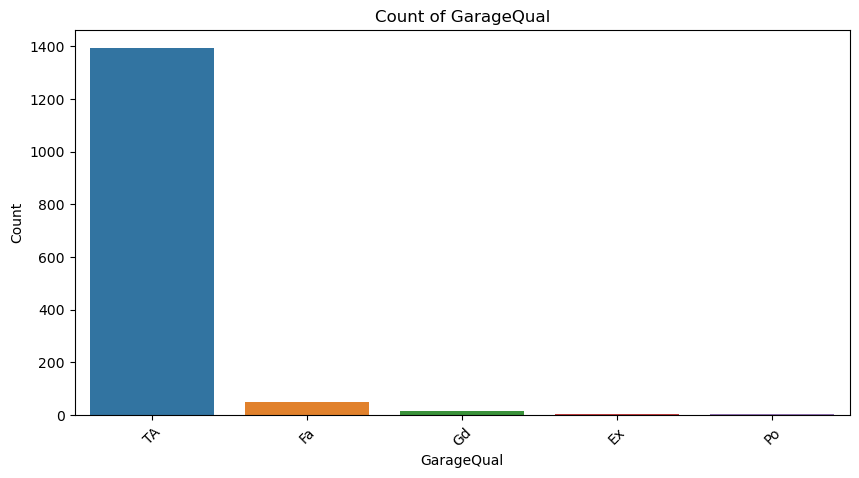

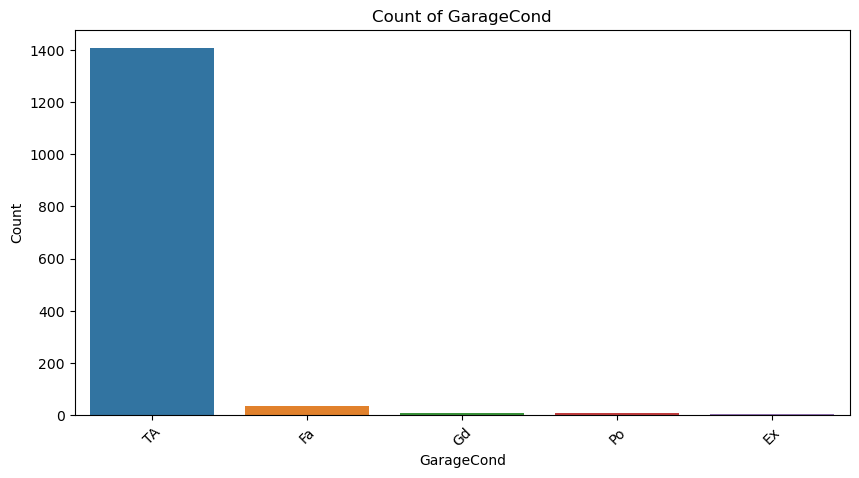

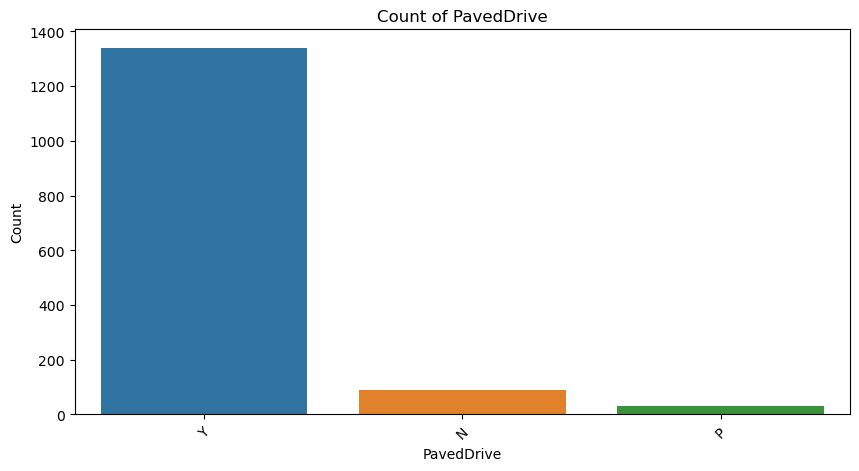

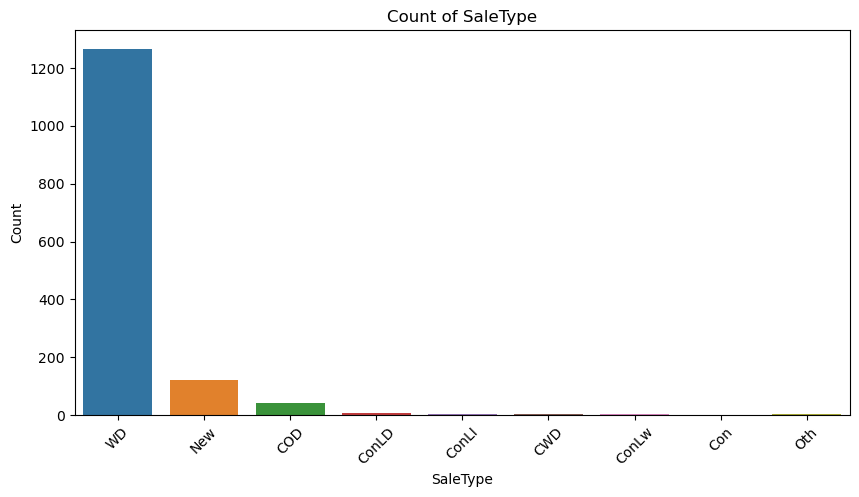

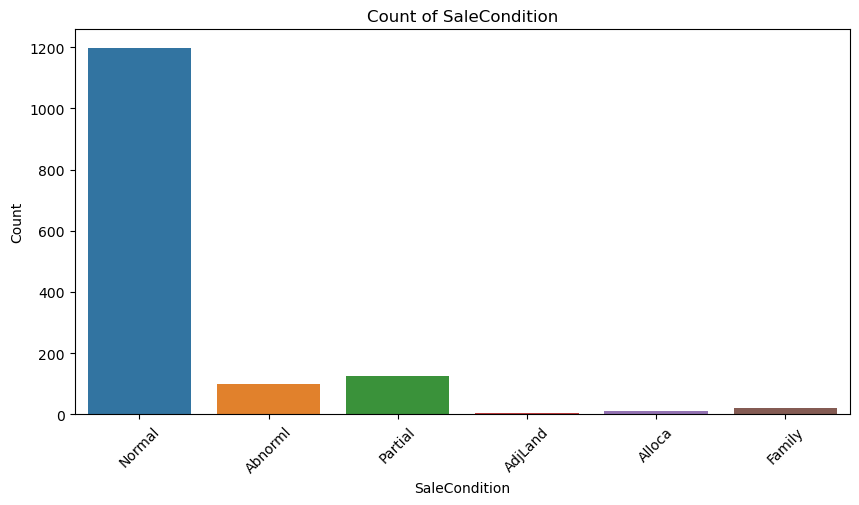

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each categorical feature and create a count plot
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=dataset)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.show()

### Observations:

1. **MSZoning**: Most properties are in the 'RL' zone, indicating residential lots.
2. **Street**: Nearly all homes are accessible via paved streets.
3. **LotShape**: The majority have a regular shape, suggesting standard lots.
4. **LandContour**: Most properties are flat, which is often preferred for building.
5. **Utilities**: Almost all homes have full utilities, showing good infrastructure.
6. **LotConfig**: Most lots are inside, with fewer corner or cul-de-sac lots.
7. **LandSlope**: Most properties are gently sloping.
8. **Neighborhood**: Significant diversity, with 'NAmes' being the most common.
9. **Condition**: Most properties are in normal condition.
10. **BldgType**: The majority are single-family homes.
11. **HouseStyle**: One-story homes are the most common.
12. **RoofStyle**: Gable roofs dominate the dataset.
13. **Exterior Quality**: Vinyl siding is prevalent, indicating modern construction.

### Conclusion:
The dataset shows a strong preference for residential zoning, paved roads, and regular lot shapes. Most properties are in good condition and well-equipped with utilities, reflecting a desirable living environment. The variety in neighborhoods suggests a mix of housing styles, indicating diverse market segments. This information can be vital for pricing, marketing, and investment strategies.

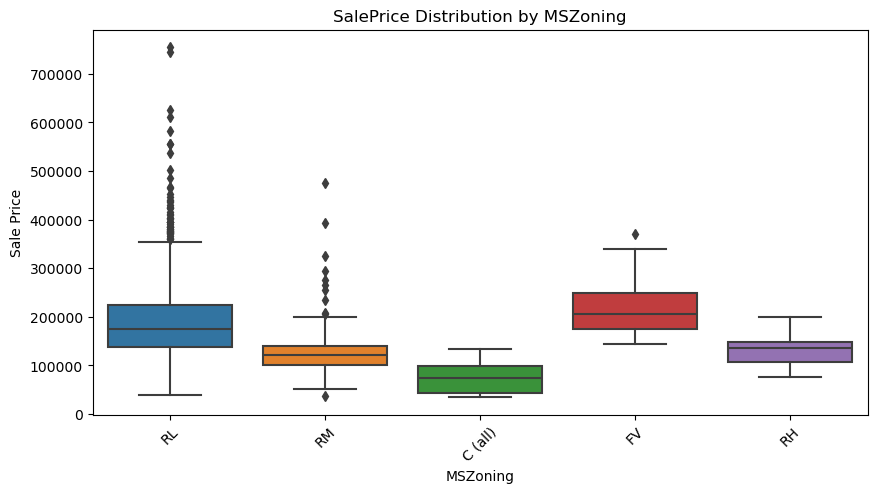

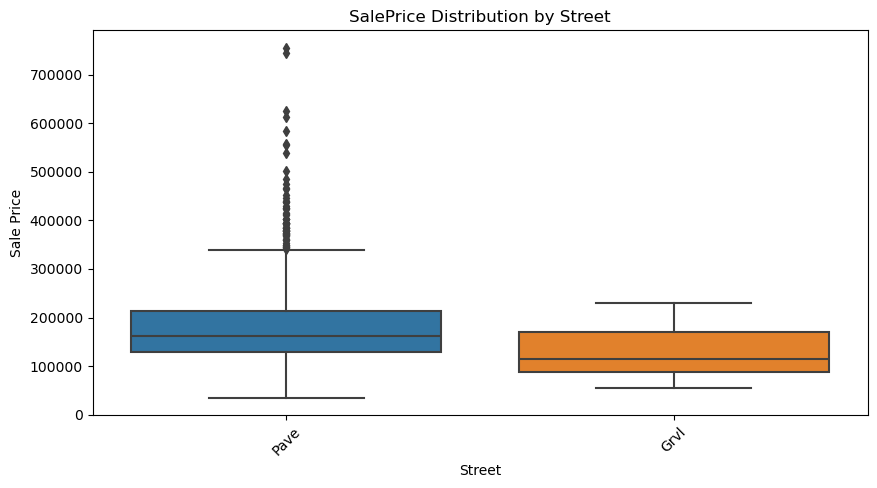

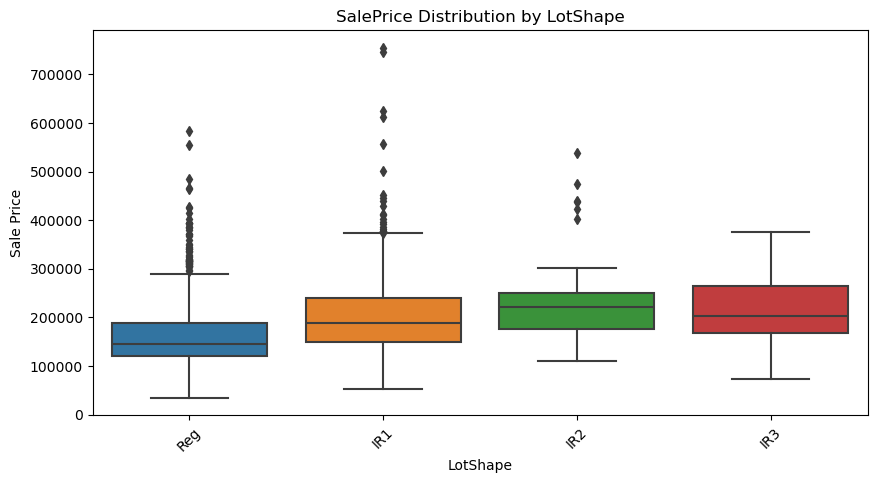

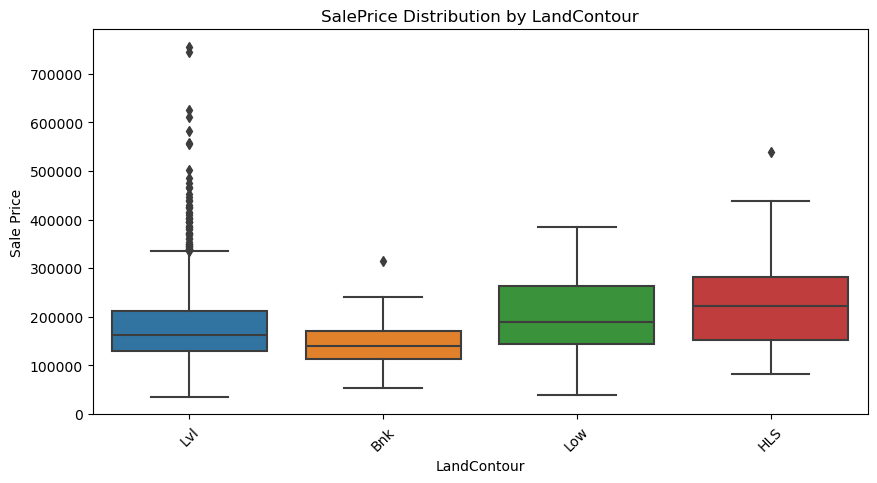

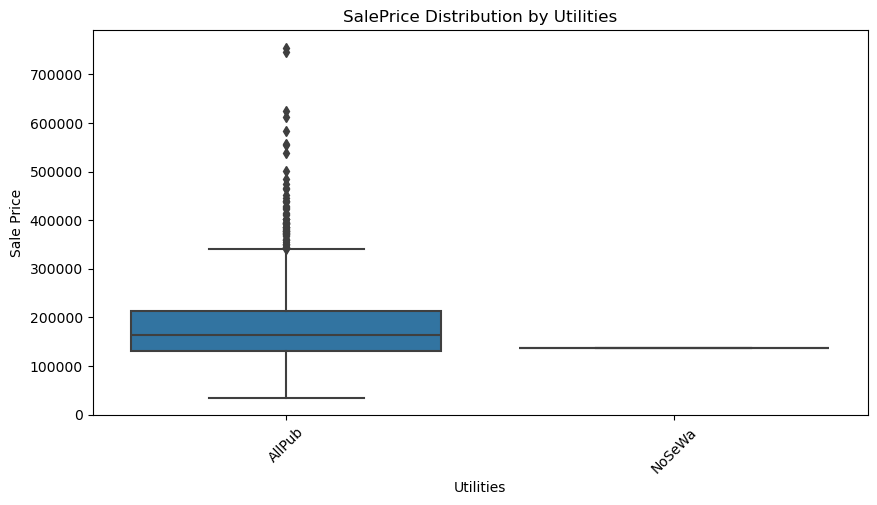

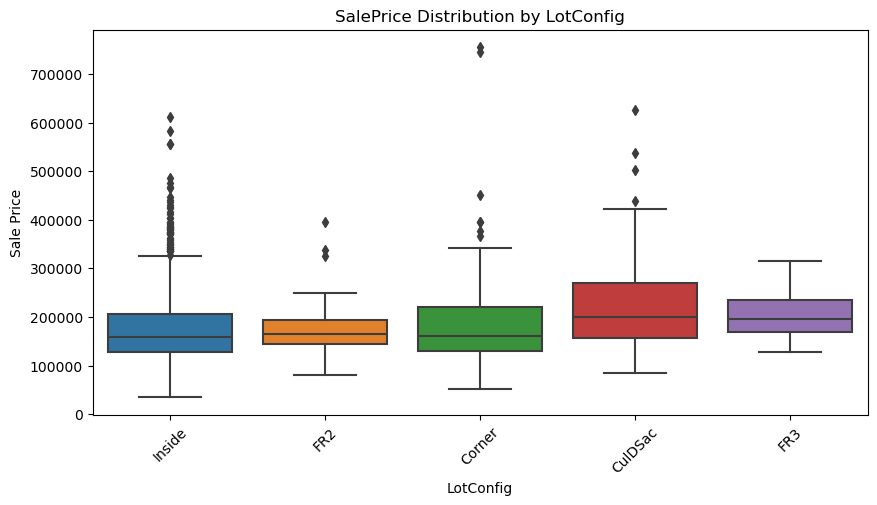

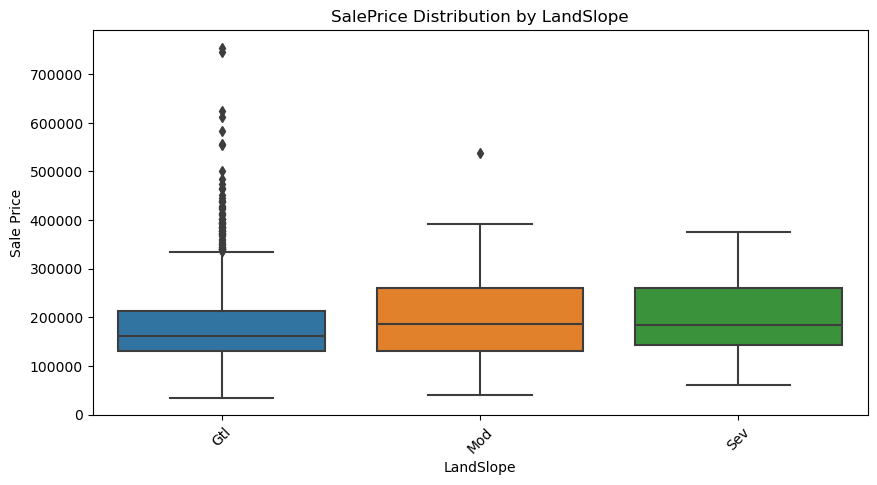

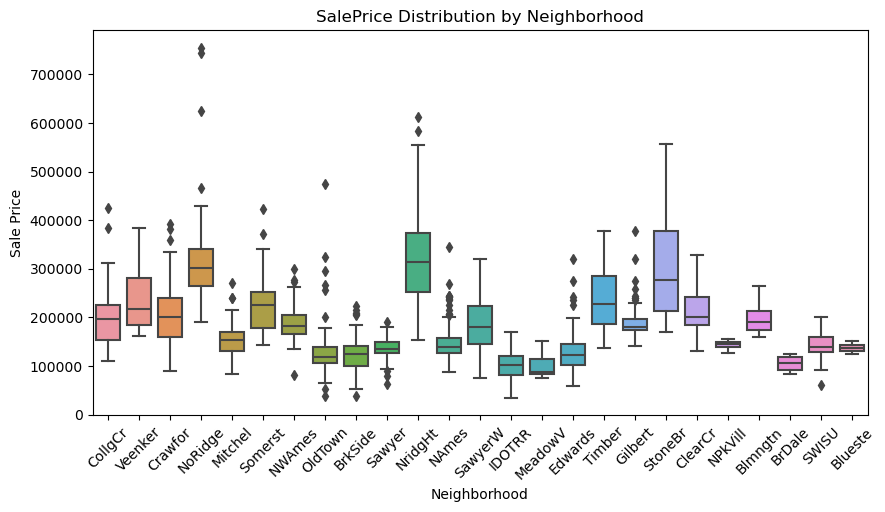

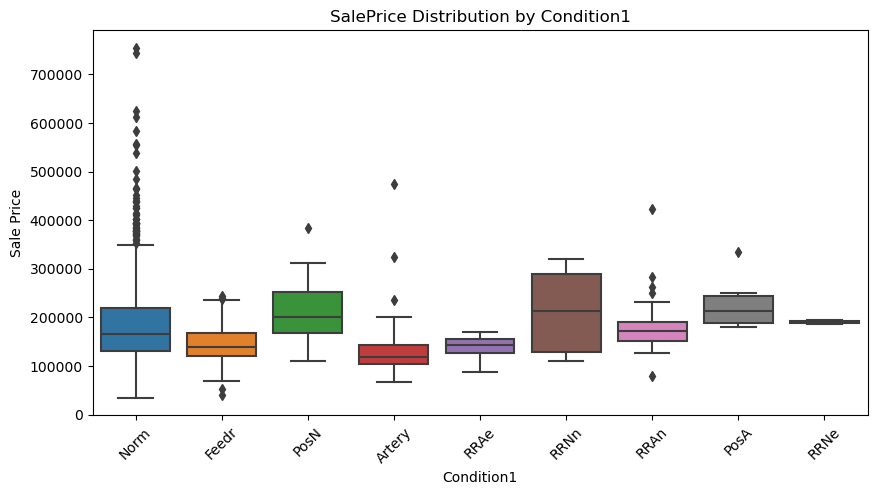

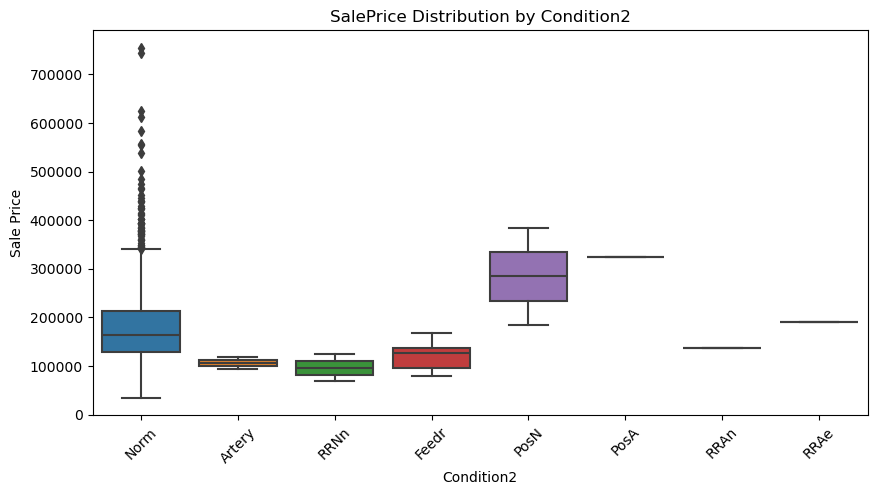

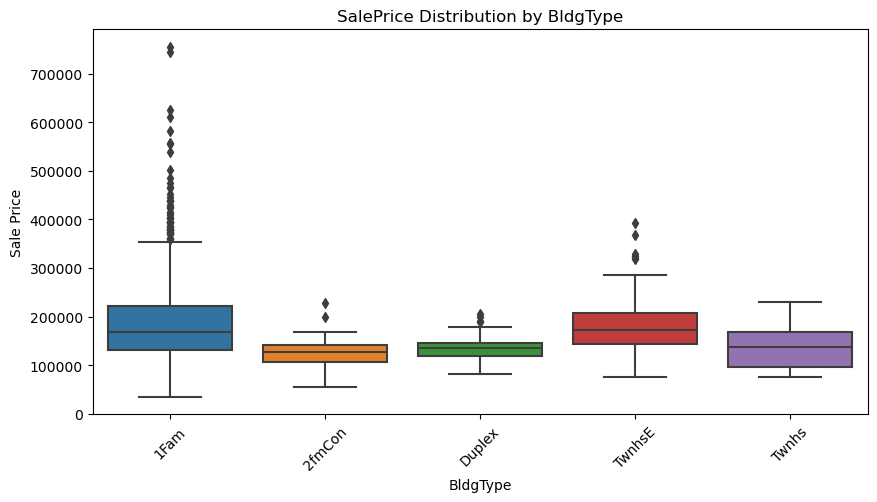

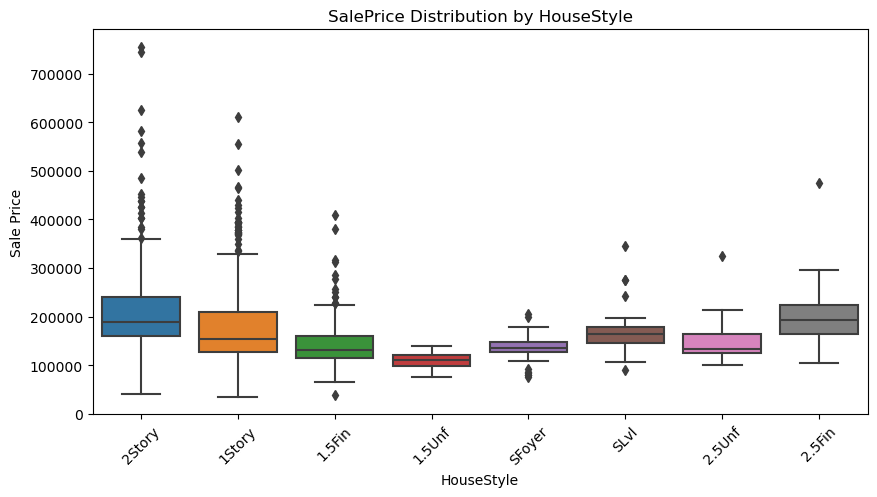

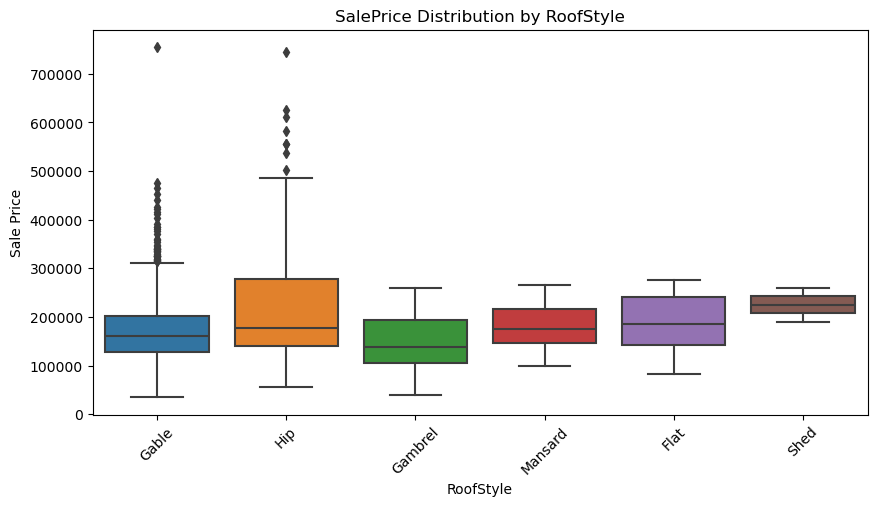

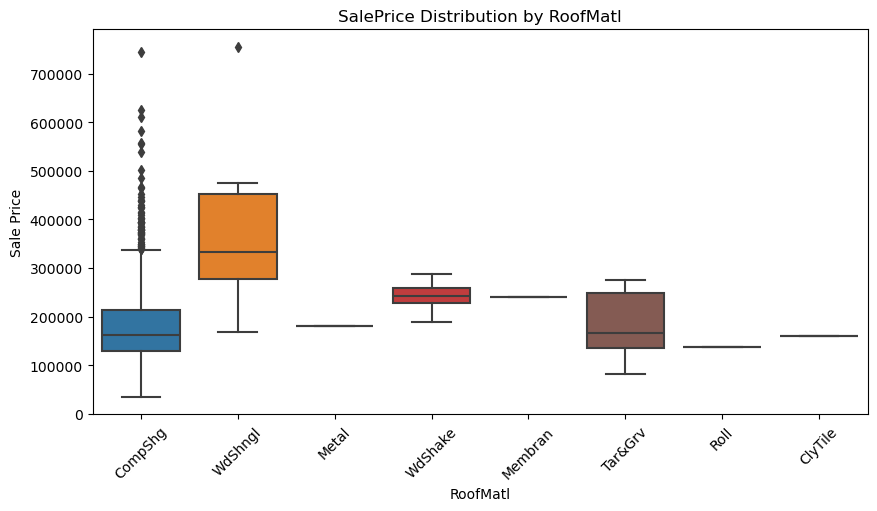

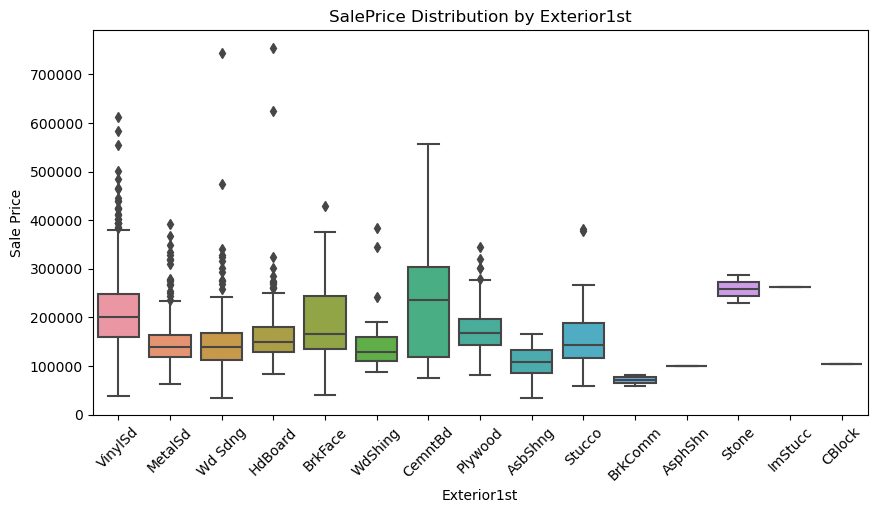

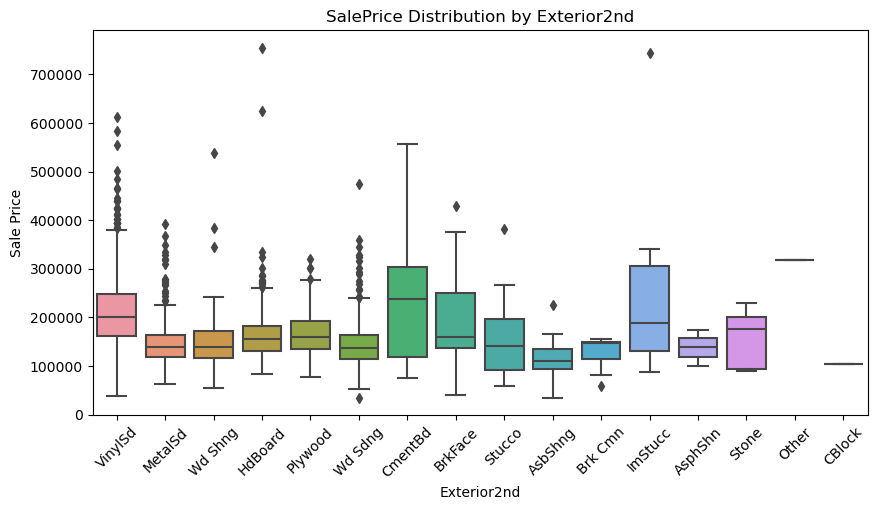

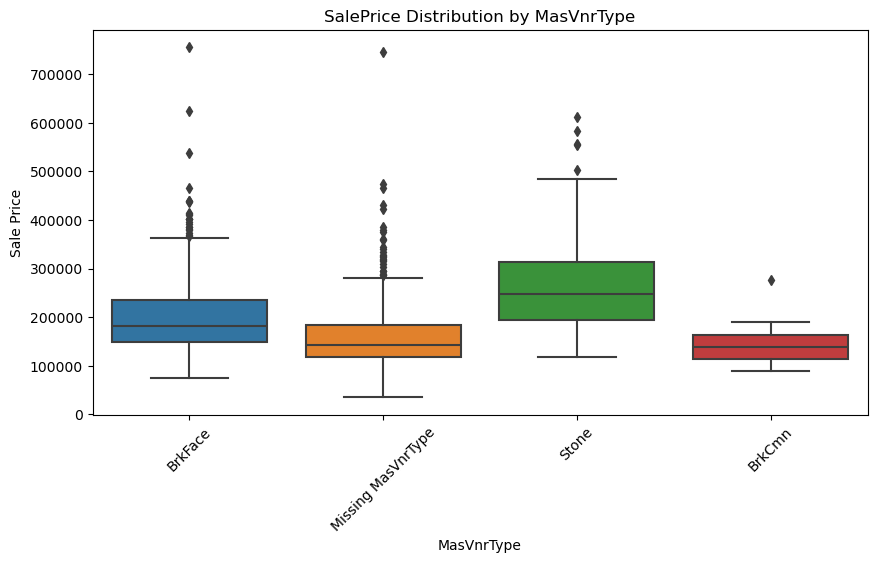

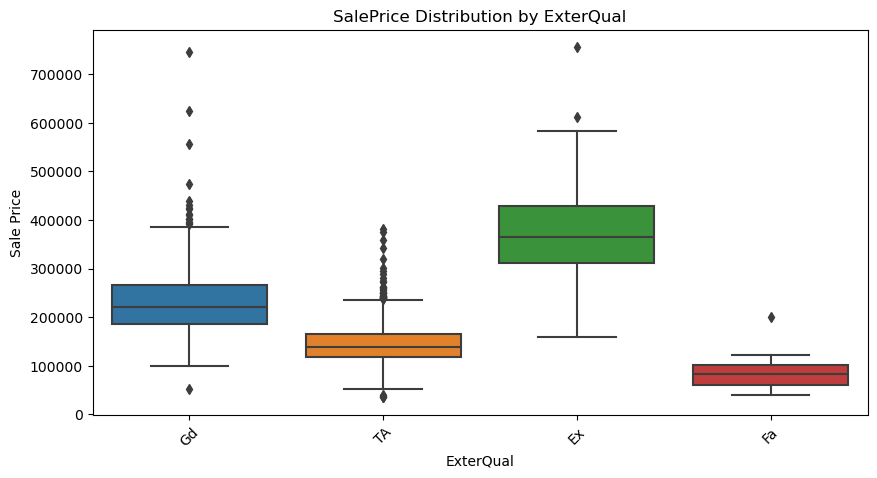

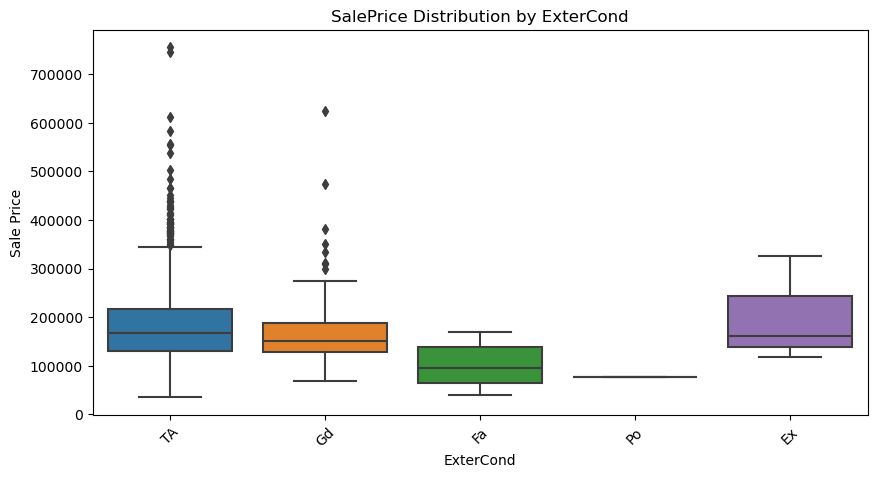

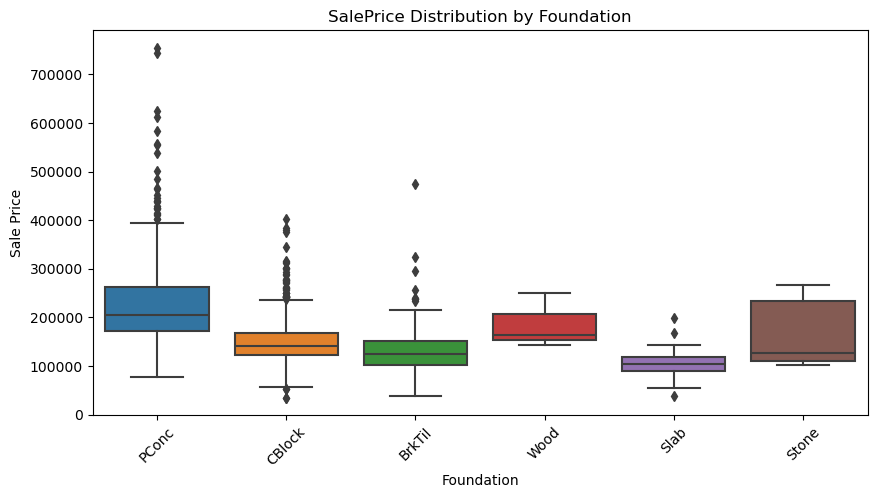

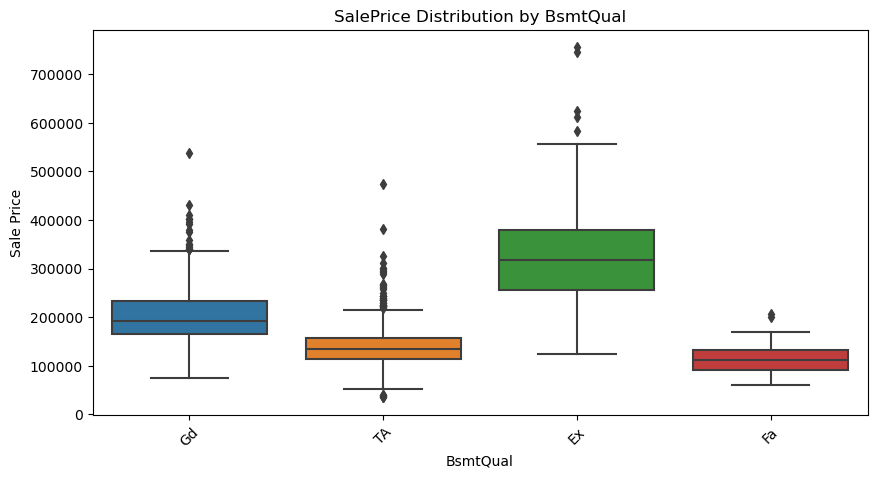

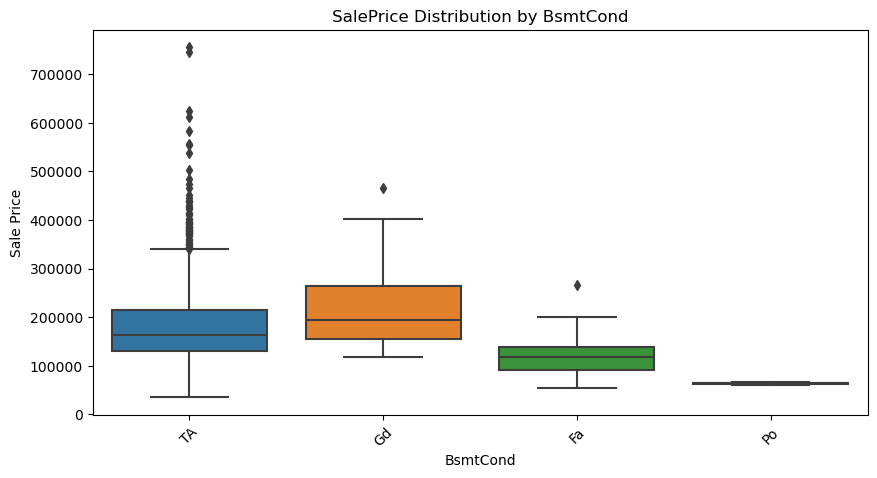

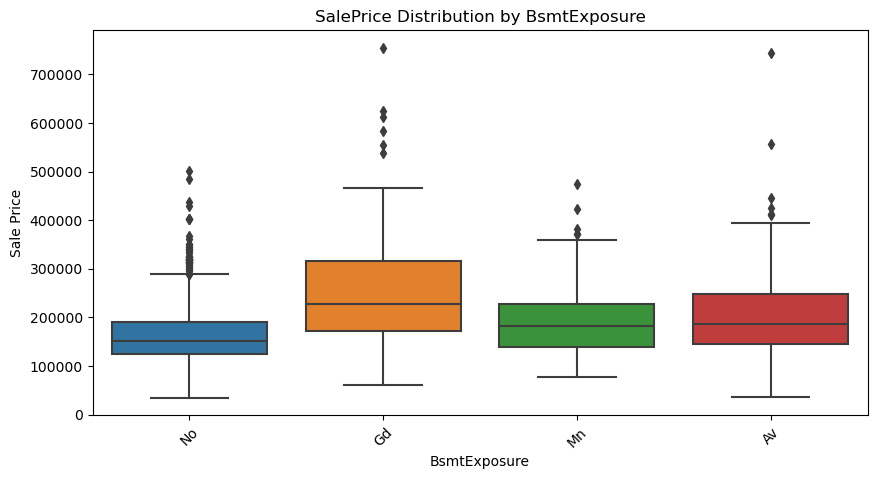

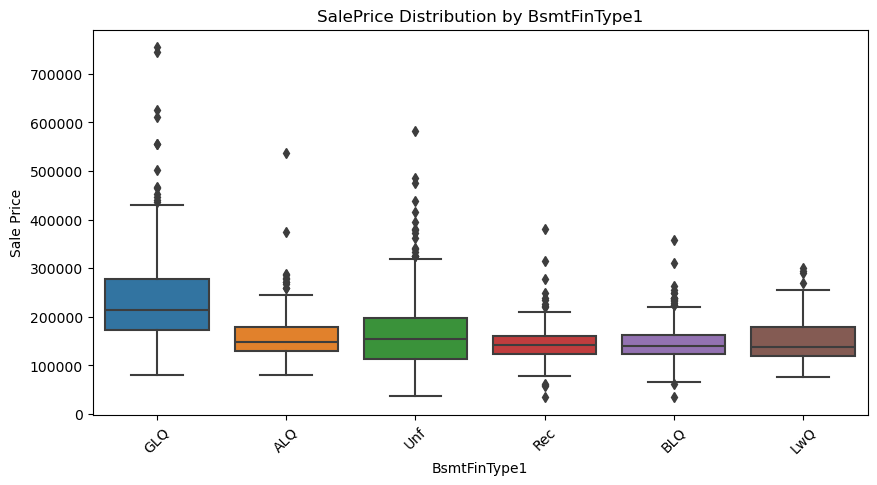

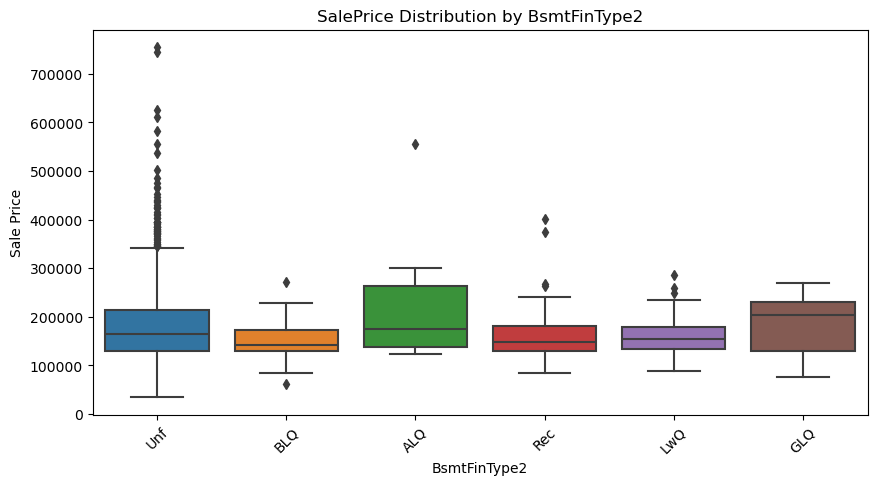

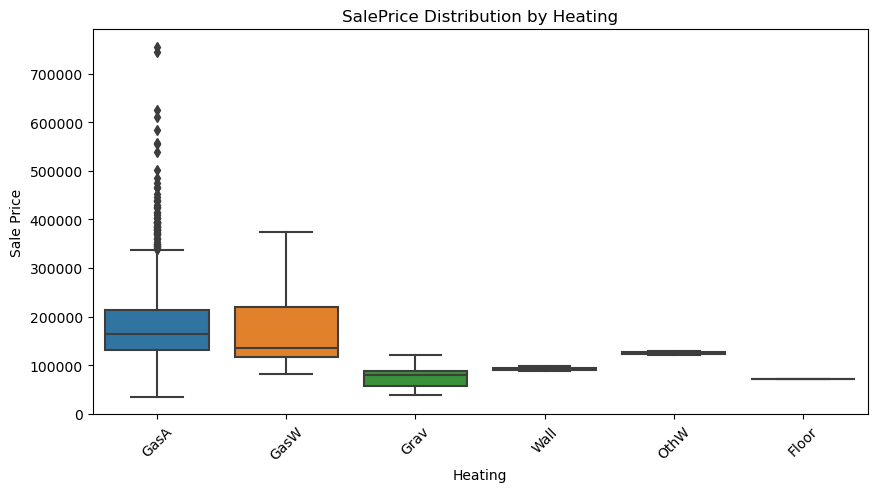

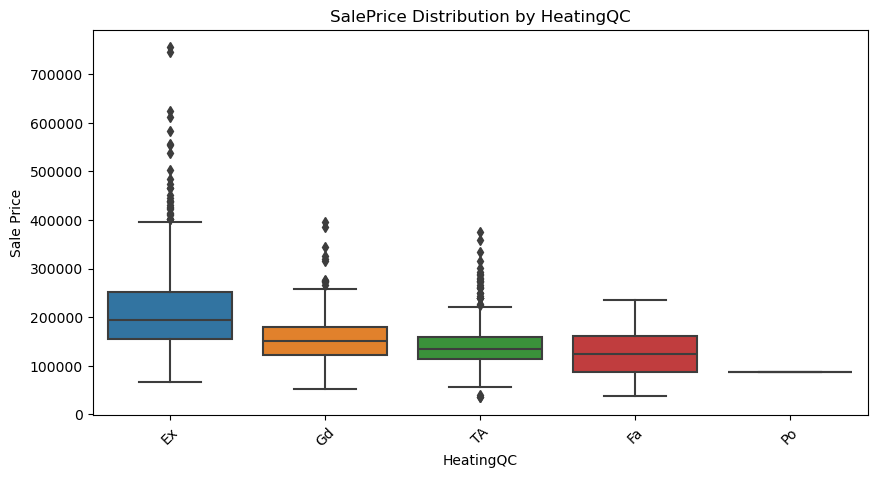

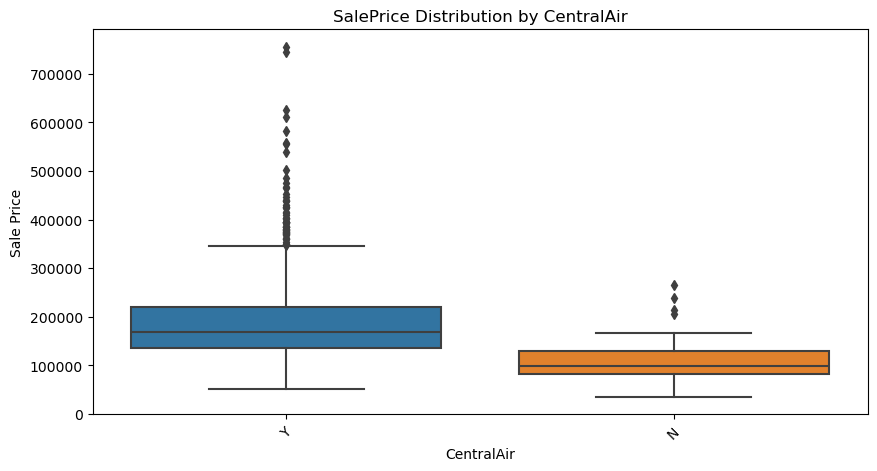

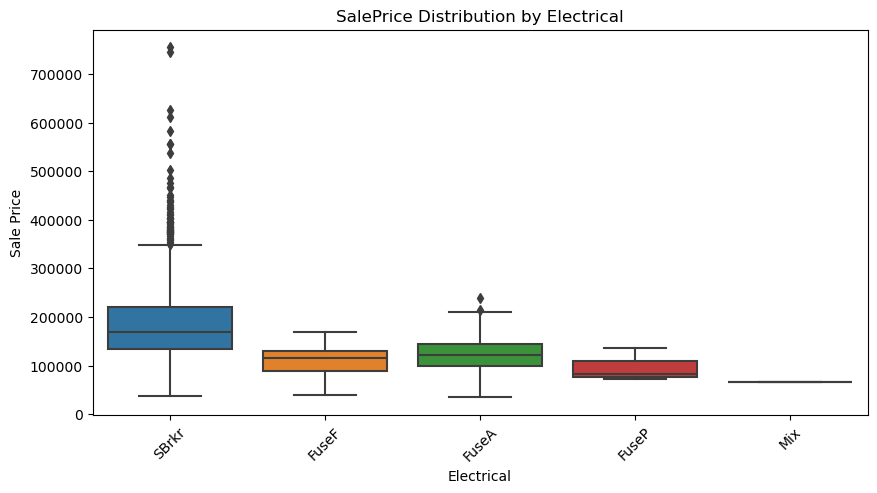

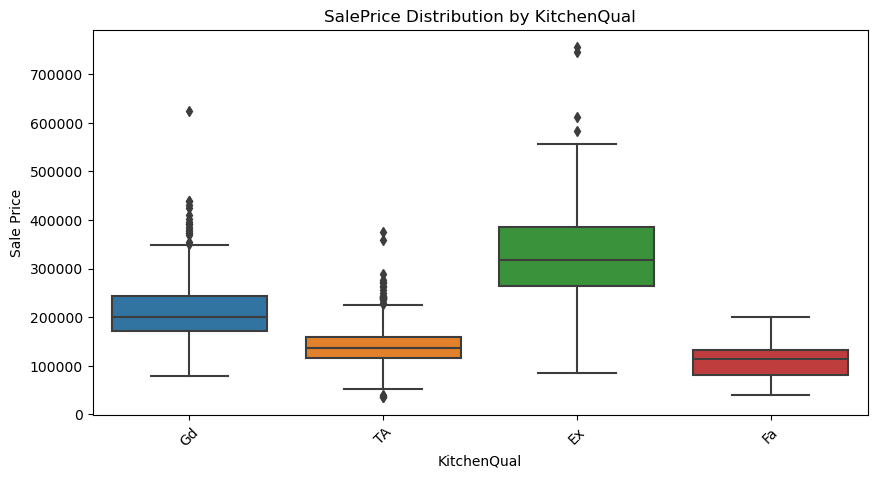

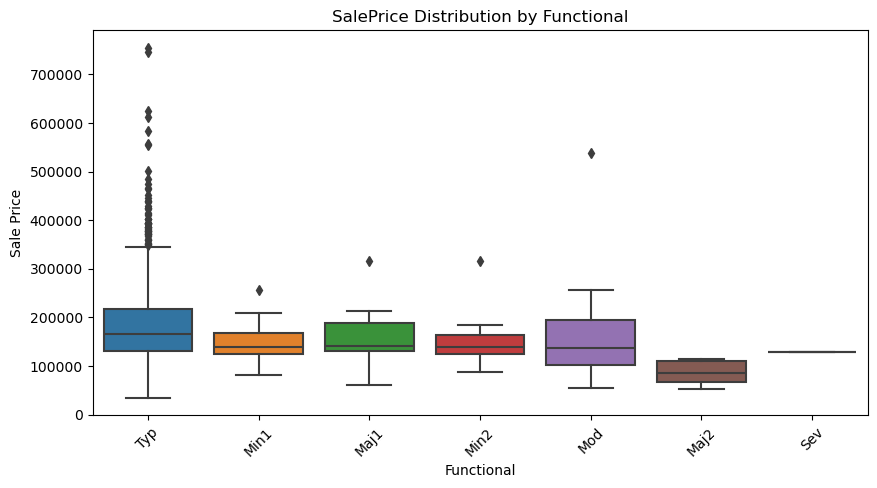

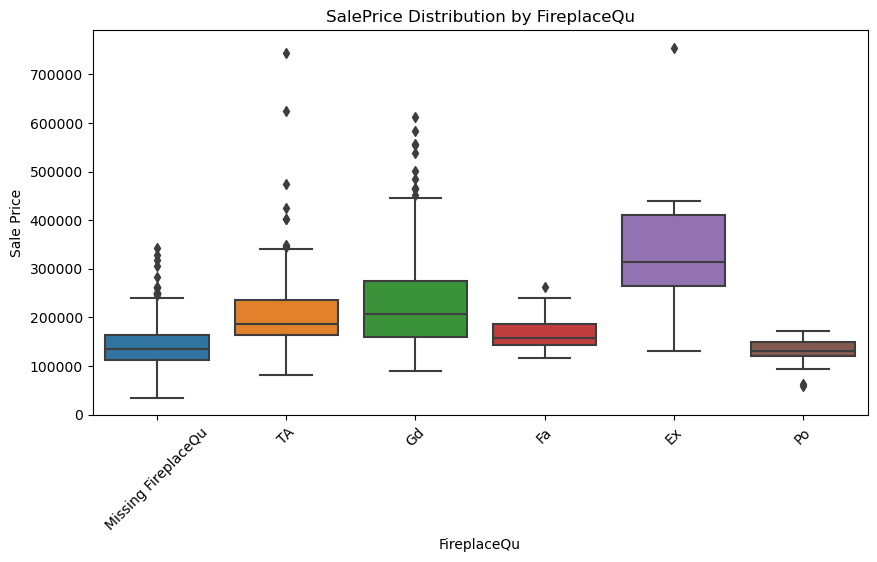

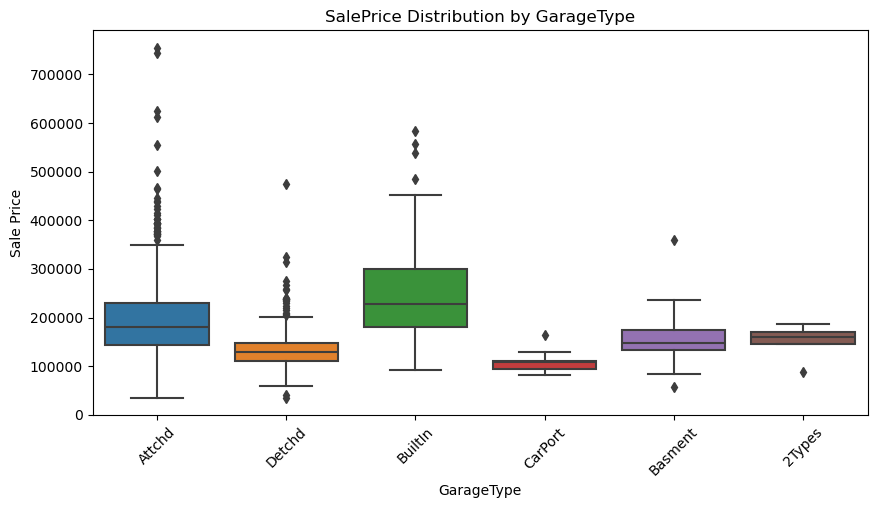

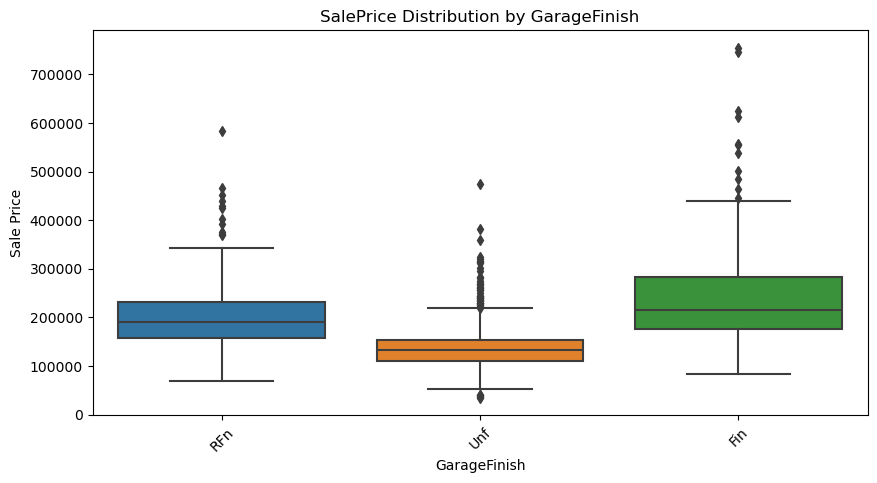

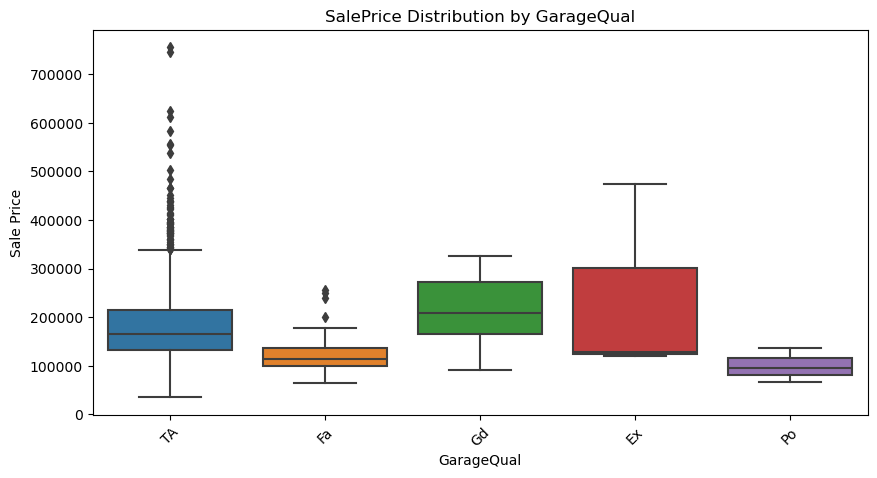

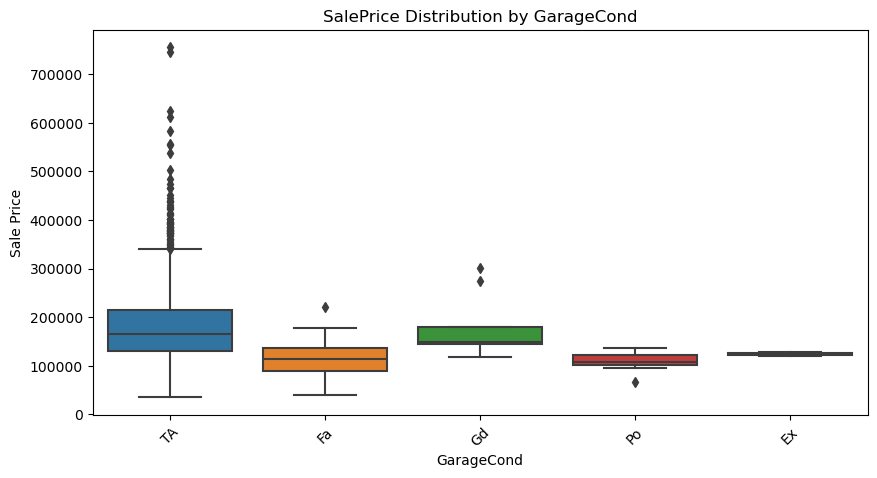

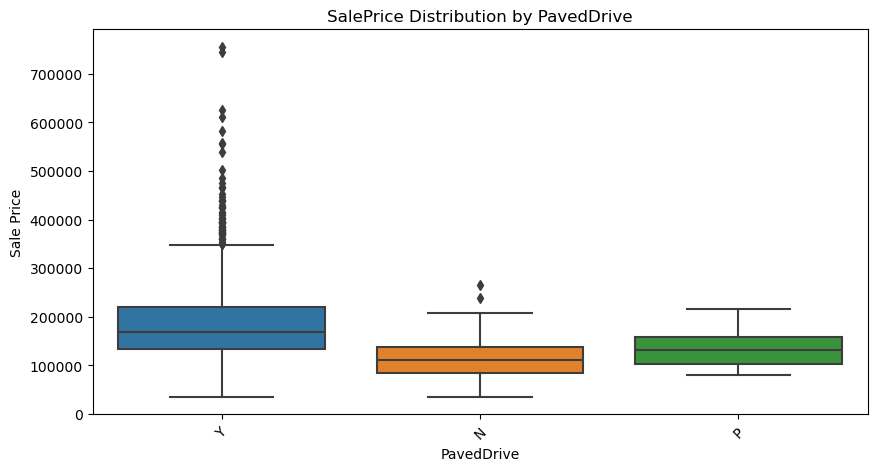

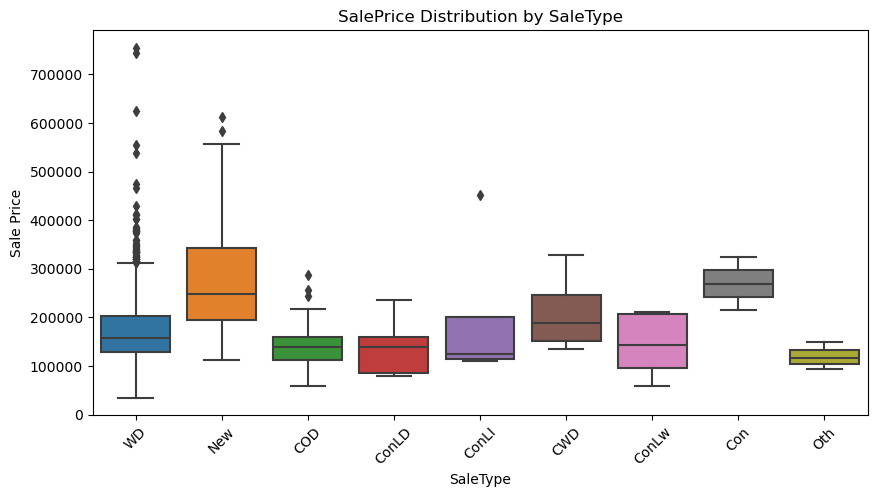

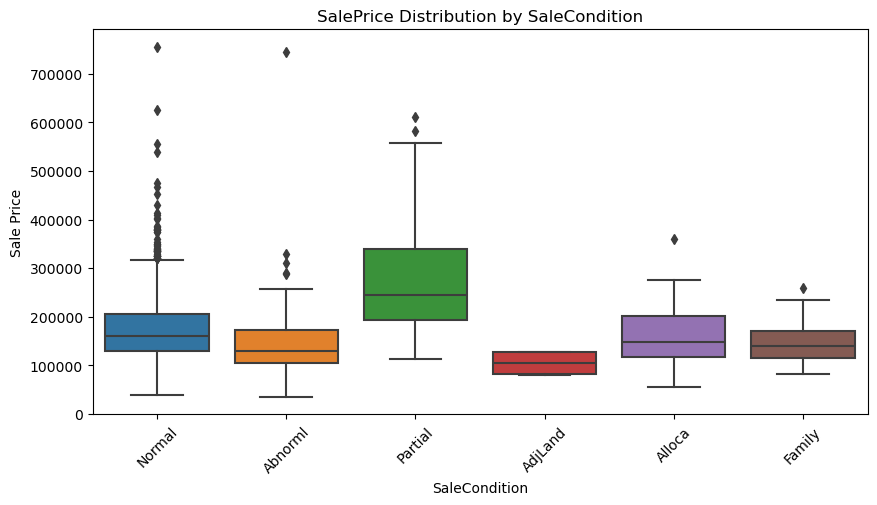

In [35]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=feature, y='SalePrice', data=dataset)
    plt.title(f'SalePrice Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.show()

## 4. Temporal Variables

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


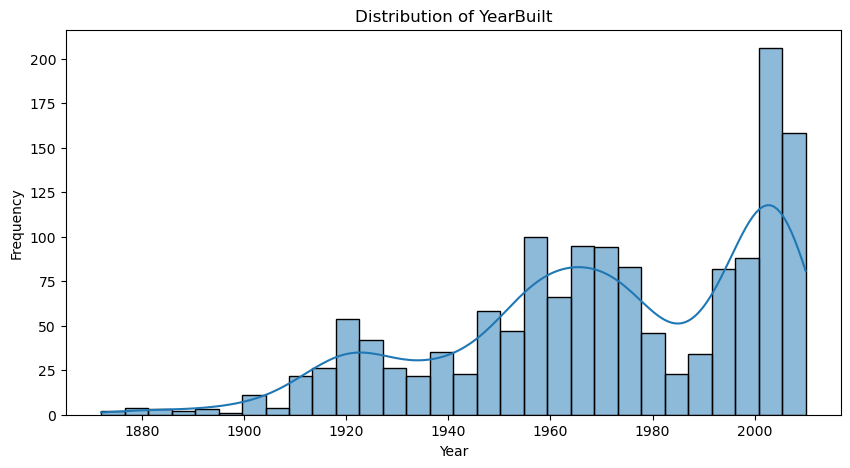

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


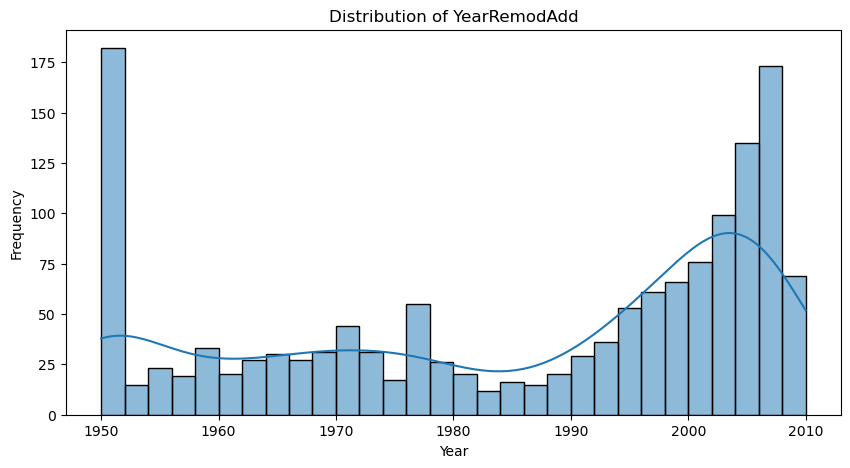

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


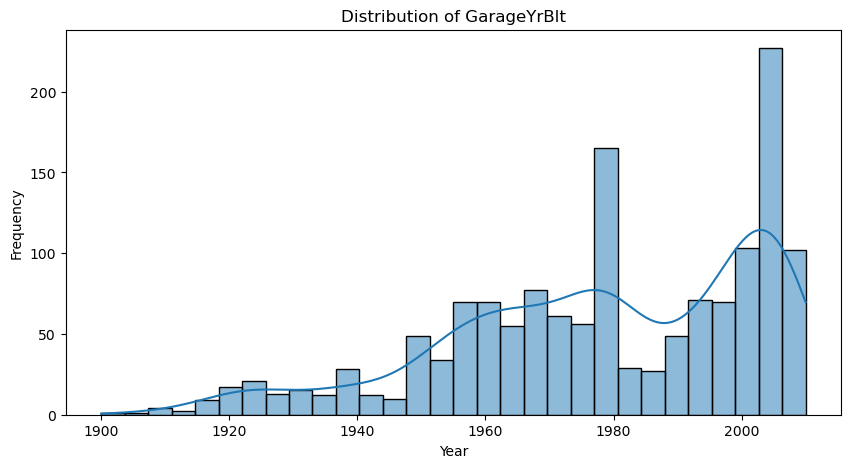

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


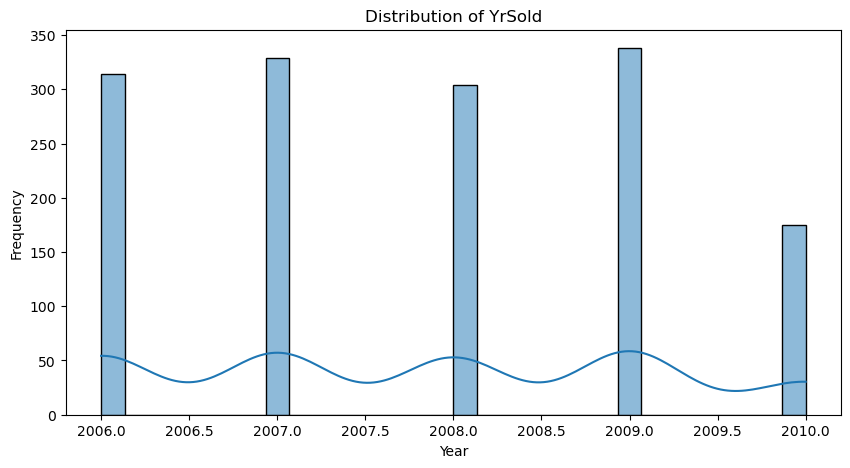

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for date-related features
date_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

for feature in date_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[feature].dt.year, bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()




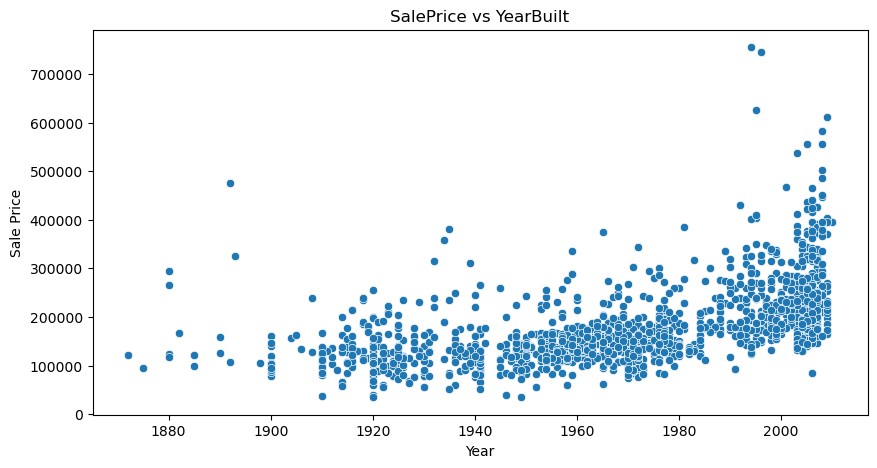

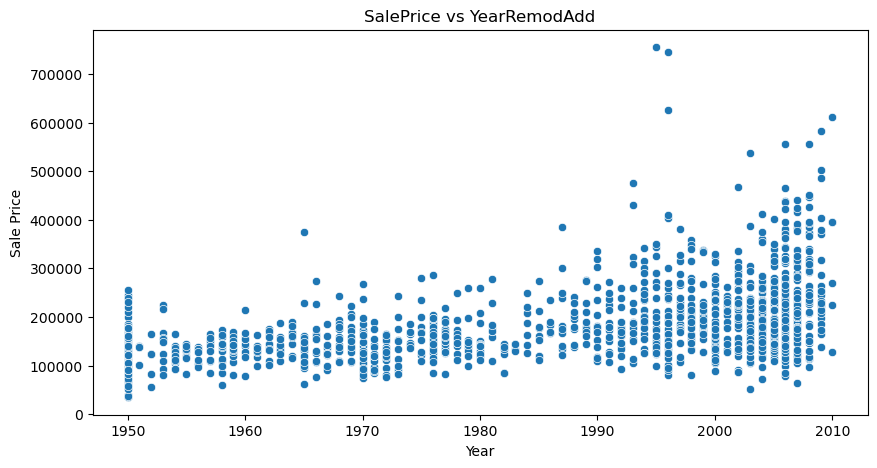

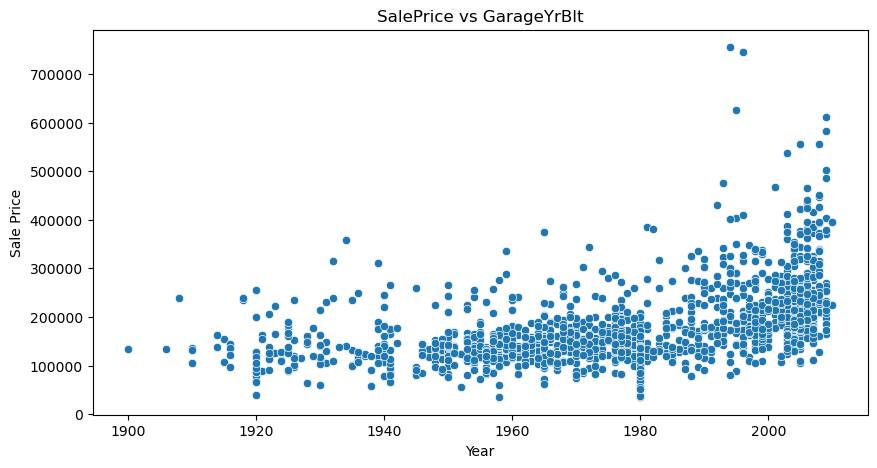

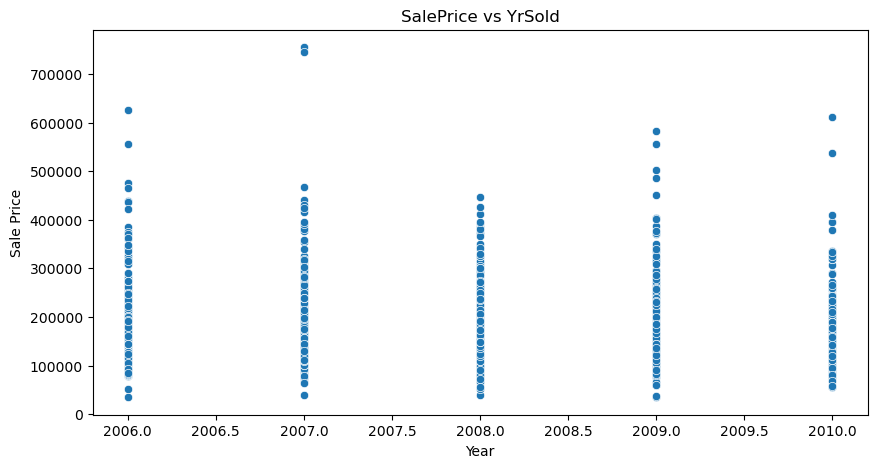

In [37]:
for feature in date_columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=dataset[feature].dt.year, y=dataset['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel('Year')
    plt.ylabel('Sale Price')
    plt.show()


In [38]:
# Create an empty DataFrame to store results
scatter_summary = pd.DataFrame()

# Loop through each date-related feature and calculate average SalePrice by year
for feature in date_columns:
    # Ensure the feature is in datetime format
    dataset[feature] = pd.to_datetime(dataset[feature], errors='coerce')
    
    # Group by year and calculate the mean SalePrice
    yearly_avg_price = dataset.groupby(dataset[feature].dt.year)['SalePrice'].mean().reset_index()
    yearly_avg_price.columns = ['Year', 'Average_SalePrice']
    yearly_avg_price['Feature'] = feature
    scatter_summary = pd.concat([scatter_summary, yearly_avg_price], ignore_index=True)

# Display the summary
print(scatter_summary)


     Year  Average_SalePrice    Feature
0    1872      122000.000000  YearBuilt
1    1875       94000.000000  YearBuilt
2    1880      200619.750000  YearBuilt
3    1882      168000.000000  YearBuilt
4    1885      111250.000000  YearBuilt
..    ...                ...        ...
270  2006      182549.458599     YrSold
271  2007      186063.151976     YrSold
272  2008      177360.838816     YrSold
273  2009      179432.103550     YrSold
274  2010      177393.674286     YrSold

[275 rows x 3 columns]


Average sale prices for houses built or remodeled in various years, alongside the year of sale. Each entry specifies the year and the corresponding average sale price for features like YearBuilt, YearRemodAdd, GarageYrBlt, and YrSold. This summary helps in understanding how house prices have changed over time based on different date-related features, providing insights into market trends and property value appreciation.

The analysis of the dataset reveals various categorical features and their distributions, highlighting key characteristics such as zoning types, street types, and building conditions. Visualizations indicate trends in sale prices based on different features, showing significant correlations between certain categorical and date-related attributes and sale prices over the years. The final summary underscores the importance of understanding how different factors influence housing prices, which can inform investment decisions and market predictions. Overall, these insights contribute to a comprehensive understanding of the housing market dynamics.

### Results Summary

1. **Categorical Features**: The analysis of categorical features like **MSZoning**, **Street**, and **LotShape** showed significant counts in certain categories, indicating predominant types within the dataset. 

2. **Sale Price Insights**: The boxplots and scatterplots revealed trends in sale prices across various features and years, highlighting how certain characteristics impact property values. For example, **HouseStyle** and **Neighborhood** exhibited strong correlations with sale prices.

3. **Temporal Analysis**: The histograms and scatter plots for date-related features illustrated changes in average sale prices over time, emphasizing market trends.

4. **Overall Trends**: The results suggest that features like location (neighborhood), building condition, and year built significantly influence sale prices, guiding potential buyers and investors in decision-making. 

These findings provide valuable insights into housing market dynamics, aiding in predictive analysis and investment strategies.